In [37]:
import os
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import skimage
from skimage.io import imread,imshow, imsave
from skimage.transform import resize
import matplotlib.pyplot as plt
import sys

In [47]:
DATA_DIR = '../data/'
REL_IMAGE_PATH = "../data/images-512/"
REL_MASK_PATH = "../data/masks-512/"
image_names = os.listdir(REL_IMAGE_PATH)
mask_names = os.listdir(REL_MASK_PATH)

In [48]:
import numpy as np
width = 256
height = 256
channel =3
# #to create X and Y arrays to be later filled with images of both images and masks
x_train = np.zeros((len(image_names),height,width,channel),dtype = np.uint8)
y_train = np.zeros((len(image_names),height,width,1),dtype = np.bool)

In [49]:
img_output_loc = os.path.join(DATA_DIR, "images-"+str(height))
mask_output_loc = os.path.join(DATA_DIR, "masks-"+str(height))

In [50]:
#train_size = 5000

#Uncomment this if you want to read all the data
train_size = sys.maxsize 

In [51]:
if os.path.isdir(img_output_loc):
    print("You might have already created images with this resolution. Reading images from "+img_output_loc+".")
    image_names = os.listdir(img_output_loc)
    mask_names = os.listdir(mask_output_loc)
    i = 0
    for image_name in image_names:
        if i == train_size:
            break
        img = imread(image_path)[:,:,:channel]
        x_train[i] = img
        
        mask_path = os.path.join(mask_output_loc, image_name[:-4]+"_mask.png")
        mask = imread(mask_path)
        y_train[i] = mask
        i += 1
else:
    os.mkdir(img_output_loc)
    os.mkdir(mask_output_loc)
    
    for n,id_ in tqdm(enumerate(image_names),total=len(image_names)):
        if n == train_size:
            break
        image_path = os.path.join(REL_IMAGE_PATH, id_)
        img = imread(image_path)[:,:,:channel]
        img = resize(img,(height,width),mode ='edge',preserve_range =True)
        x_train[n] = img
        mask_path = os.path.join(REL_MASK_PATH, id_[:-4]+"_mask.png")
        mask_ = imread(mask_path)
        mask_resized = resize(mask_,(height,width),mode ='edge',preserve_range =True)
        mask_ = np.expand_dims(mask_resized, axis=-1)
        y_train[n]=mask_
        
        # save the image and mask
        new_img_path = os.path.join(img_output_loc, id_)
        imsave(new_img_path, img.astype(np.uint8))
        
        new_mask_path = os.path.join(mask_output_loc, id_[:-4]+"_mask.png")
        imsave(new_mask_path, mask_resized.astype(np.uint8))
        




  0%|          | 0/23607 [00:00<?, ?it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_957_19_319457_270710_mask.png is a low contrast image



  0%|          | 1/23607 [00:00<1:04:03,  6.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1015_19_319429_270744_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_965_19_319371_270513_mask.png is a low contrast image



  0%|          | 3/23607 [00:00<54:13,  7.25it/s]  


  0%|          | 5/23607 [00:00<47:39,  8.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_452_19_319450_270811_mask.png is a low contrast image



  0%|          | 7/23607 [00:00<44:10,  8.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/




  0%|          | 53/23607 [00:04<30:09, 13.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1108_19_319452_270674_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_237_19_319465_270766_mask.png is a low contrast image



  0%|          | 55/23607 [00:04<28:45, 13.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_686_19_319428_270816_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_869_19_319444_270667_mask.png is a low contrast image



  0%|          | 57/23607 [00:04<27:51, 14.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1241_19_319454_270795_mask.pn

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_263_19_319440_270729_mask.png is a low contrast image



  0%|          | 113/23607 [00:08<29:10, 13.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_493701_5_19_246435_252901.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_493701_5_19_246435_252901_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1224_19_319433_270829_mask.png is a low contrast image



  0%|          | 115/23607 [00:09<29:45, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1025_19_319463_270825_mask.png is a low contrast image
/home/jeetendra/.local/lib/python

  1%|          | 161/23607 [00:12<27:03, 14.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1254_19_319422_270750_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_641_19_319439_270816_mask.png is a low contrast image



  1%|          | 163/23607 [00:12<27:01, 14.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1090_19_319443_270715_mask.png is a low contrast image



  1%|          | 165/23607 [00:12<26:36, 14.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_726_19_319466_270662_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_138_19_319445_270645_mask.pn

  1%|          | 217/23607 [00:16<28:01, 13.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1043_19_319453_270672_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1647_19_319405_270760_mask.png is a low contrast image



  1%|          | 219/23607 [00:16<25:28, 15.31it/s]


  1%|          | 221/23607 [00:16<27:09, 14.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_641_19_319489_270837_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1412_19_319450_270874_mask.png is a low contrast image



  1%|          | 223/23607 [00:16<26:48, 14.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..




  1%|          | 275/23607 [00:20<25:09, 15.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_183_19_319461_270685_mask.png is a low contrast image



  1%|          | 277/23607 [00:20<27:43, 14.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_697_19_319375_272092_mask.png is a low contrast image



  1%|          | 279/23607 [00:20<27:55, 13.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1195_19_319373_270519_mask.png is a low contrast image



  1%|          | 281/23607 [00:20<27:53, 13.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_57_19_319463_270681_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

  1%|▏         | 331/23607 [00:24<24:52, 15.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_816_19_319435_270819_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1033_19_319383_272100_mask.png is a low contrast image



  1%|▏         | 333/23607 [00:24<35:05, 11.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1382_19_319460_270873_mask.png is a low contrast image



  1%|▏         | 335/23607 [00:24<34:41, 11.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_543_19_319398_270501_mask.png is a low contrast image



  1%|▏         | 337/23607 [00:24<35:04, 11.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../

  2%|▏         | 383/23607 [00:28<32:37, 11.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_54_19_319480_270803_mask.png is a low contrast image



  2%|▏         | 385/23607 [00:29<31:39, 12.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1550_19_319431_270797_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_67_19_319241_272052_mask.png is a low contrast image



  2%|▏         | 387/23607 [00:29<28:57, 13.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_352_19_319422_270728_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1067_19_319444_270673_mask.png 

  2%|▏         | 436/23607 [00:32<24:44, 15.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_122_19_319438_270722_mask.png is a low contrast image



  2%|▏         | 438/23607 [00:32<24:02, 16.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1421_19_319459_270835_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_1_19_319332_272010_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1299_19_319442_270797_mask.png is a low contrast image



  2%|▏         | 441/23607 [00:32<22:49, 16.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_492_19_319493_270828_mask.png 

  2%|▏         | 494/23607 [00:36<25:14, 15.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1536_19_319417_270797_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_153_19_319460_270645_mask.png is a low contrast image



  2%|▏         | 496/23607 [00:36<24:28, 15.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_908_19_319466_270861_mask.png is a low contrast image



  2%|▏         | 498/23607 [00:36<24:58, 15.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_658_19_319456_270855_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_169_19_319320_272018_mask.png

  2%|▏         | 550/23607 [00:39<24:20, 15.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_459_19_319406_270691_mask.png is a low contrast image



  2%|▏         | 552/23607 [00:40<23:54, 16.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_329_19_261810_253931_mask.png is a low contrast image



  2%|▏         | 554/23607 [00:40<25:10, 15.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_497_19_319445_270774_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_540_19_319405_270813_mask.png is a low contrast image



  2%|▏         | 556/23607 [00:40<25:24, 15.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../da

  3%|▎         | 600/23607 [00:43<32:55, 11.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1509_19_319431_270796_mask.png is a low contrast image



  3%|▎         | 602/23607 [00:43<30:37, 12.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_99_19_319457_270841_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/kam_4e7c7f_234_19_309676_261779.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_234_19_309676_261779_mask.png is a low contrast image



  3%|▎         | 605/23607 [00:43<27:33, 13.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1543_19_319424_270837_mask.png is 




  3%|▎         | 651/23607 [00:47<25:42, 14.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1020_19_319434_270824_mask.png is a low contrast image



  3%|▎         | 653/23607 [00:47<25:49, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1541_19_319362_272114_mask.png is a low contrast image



  3%|▎         | 655/23607 [00:47<26:51, 14.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1405_19_319443_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1442_19_319405_270755_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_187_19_319465_270804_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_854_19_319432_270820_mask.png is a low contrast image



  3%|▎         | 705/23607 [00:50<24:00, 15.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1170_19_319448_270760_mask.png is a low contrast image



  3%|▎         | 707/23607 [00:50<23:25, 16.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_701_19_319439_270780_mask.png is a low contrast image



  3%|▎         | 709/23607 [00:50<24:10, 15.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_658_19_319400_270736_mask.png is a low contrast image



  3%|▎         | 711/23607 [00:50<24:01, 15.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_60_19_319463_270761_mask.png is a low contrast image



  3%|▎         | 758/23607 [00:54<26:20, 14.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_292_19_319368_270495_mask.png is a low contrast image



  3%|▎         | 760/23607 [00:54<28:36, 13.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_7_19_319445_270839_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1595_19_319435_270758_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_353_19_319423_270768_mask.png is a low contrast image



  3%|▎         | 763/23607

  3%|▎         | 809/23607 [00:57<24:24, 15.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_958_19_319413_270783_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_819_19_319452_270783_mask.png is a low contrast image



  3%|▎         | 811/23607 [00:57<23:47, 15.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_460_19_319450_270694_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_801_19_319469_270782_mask.png is a low contrast image



  3%|▎         | 813/23607 [00:57<23:19, 16.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_791_19_319446_270747_mask.png 

  4%|▎         | 855/23607 [01:00<23:10, 16.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1234_19_319402_270710_mask.png is a low contrast image



  4%|▎         | 857/23607 [01:00<23:30, 16.12it/s]


  4%|▎         | 859/23607 [01:01<24:15, 15.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1058_19_319452_270756_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_621_19_319365_270504_mask.png is a low contrast image



  4%|▎         | 861/23607 [01:01<33:18, 11.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_562_19_319427_270773_mask.png is a low contrast image



  4%|▎         | 863/23607 [01:01<30:21, 12.49it/s]/home/jeetendra/.local/lib/python3.6/si




  4%|▍         | 907/23607 [01:04<25:45, 14.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_83_19_319399_270802_mask.png is a low contrast image



  4%|▍         | 909/23607 [01:04<26:04, 14.51it/s]


  4%|▍         | 911/23607 [01:04<26:02, 14.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_565_19_319430_270773_mask.png is a low contrast image



  4%|▍         | 913/23607 [01:04<25:33, 14.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_134_19_319390_270490_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_284_19_319461_270729_mask.png is a low contrast image



  4%|▍         | 915/23607 [01:05<30:56, 12.22it/s]/home/jeetendra/.local/lib/python3.6/si

  4%|▍         | 961/23607 [01:08<24:09, 15.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1083_19_319441_270866_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_211_19_319404_270765_mask.png is a low contrast image



  4%|▍         | 963/23607 [01:08<25:09, 15.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1004_19_319372_270514_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_218_19_319366_270493_mask.png is a low contrast image



  4%|▍         | 965/23607 [01:08<25:47, 14.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_840_19_319438_270860_mask.pn

  4%|▍         | 1012/23607 [01:11<26:07, 14.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1143_19_319434_270787_mask.png is a low contrast image



  4%|▍         | 1014/23607 [01:11<28:33, 13.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1493_19_319415_270796_mask.png is a low contrast image



  4%|▍         | 1016/23607 [01:11<27:28, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_3_19_319401_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_708_19_319450_270744_mask.png is a low contrast image



  4%|▍         | 1018/23607 [01:12<25:05, 15.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

  5%|▍         | 1072/23607 [01:15<38:44,  9.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_435_19_319473_270849_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_97_19_319439_270683_mask.png is a low contrast image



  5%|▍         | 1074/23607 [01:15<33:27, 11.22it/s]


  5%|▍         | 1076/23607 [01:16<33:19, 11.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1271_19_319398_270791_mask.png is a low contrast image



  5%|▍         | 1078/23607 [01:16<30:22, 12.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1036_19_319474_270825_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

  5%|▍         | 1130/23607 [01:19<26:25, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_712_19_319413_270817_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1042_19_319465_270755_mask.png is a low contrast image



  5%|▍         | 1132/23607 [01:20<32:02, 11.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_313_19_319484_270818_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_601_19_319425_270694_mask.png is a low contrast image



  5%|▍         | 1134/23607 [01:20<30:24, 12.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_423_19_261810_253939_mask.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_249_19_319442_270767_mask.png is a low contrast image



  5%|▌         | 1184/23607 [01:23<22:43, 16.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_247_19_279461_269110_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_101_19_265058_242184_mask.png is a low contrast image



  5%|▌         | 1186/23607 [01:23<21:48, 17.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1288_19_319415_270791_mask.png is a low contrast image



  5%|▌         | 1188/23607 [01:23<22:24, 16.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_522_19_319470_270774.p

  5%|▌         | 1231/23607 [01:26<22:47, 16.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_110_19_319452_270683_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1045_19_319418_270705_mask.png is a low contrast image



  5%|▌         | 1233/23607 [01:26<22:52, 16.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_986_19_319438_270754_mask.png is a low contrast image



  5%|▌         | 1235/23607 [01:27<23:36, 15.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1055_19_319449_270756_mask.png is a low contrast image



  5%|▌         | 1237/23607 [01:27<23:38, 15.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1274_19_319356_272107_mask.png is a low contrast image



  5%|▌         | 1287/23607 [01:30<27:45, 13.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_619_19_319402_270775_mask.png is a low contrast image



  5%|▌         | 1289/23607 [01:30<26:59, 13.78it/s]


  5%|▌         | 1291/23607 [01:31<25:07, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1092_19_319364_272102_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_333_19_319403_270728_mask.png is a low contrast image



  5%|▌         | 1293/23607 [01:31<25:51, 14.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

  6%|▌         | 1345/23607 [01:34<25:31, 14.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1091_19_319383_270516_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1136_19_319459_270716_mask.png is a low contrast image



  6%|▌         | 1347/23607 [01:34<25:57, 14.29it/s]


  6%|▌         | 1349/23607 [01:34<27:41, 13.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_726_19_319396_270506_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_630_19_319468_270815_mask.png is a low contrast image



  6%|▌         | 1351/23607 [01:35<26:34, 13.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_866_19_319464_270860_mask.png is a low contrast image



  6%|▌         | 1403/23607 [01:38<23:08, 15.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_906_19_319448_270668_mask.png is a low contrast image



  6%|▌         | 1405/23607 [01:38<22:55, 16.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_804_19_319442_270859_mask.png is a low contrast image



  6%|▌         | 1407/23607 [01:39<24:19, 15.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_951_19_319461_270752_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_445_19_319443_270811_mas

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_645_19_319445_270742_mask.png is a low contrast image



  6%|▌         | 1463/23607 [01:42<23:20, 15.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_28_19_319426_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1033_19_319406_270825_mask.png is a low contrast image



  6%|▌         | 1465/23607 [01:43<24:18, 15.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_34_19_319362_272073_mask.png is a low contrast image



  6%|▌         | 1467/23607 [01:43<28:09, 13.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_953_19_319446_270787_mask

  6%|▋         | 1513/23607 [01:46<23:35, 15.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1604_19_319442_270879_mask.png is a low contrast image



  6%|▋         | 1515/23607 [01:46<23:23, 15.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1403_19_319371_272110_mask.png is a low contrast image



  6%|▋         | 1517/23607 [01:46<24:03, 15.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_91_19_319407_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_158_19_319468_270684_mask.png is a low contrast image



  6%|▋         | 1519/23607 [01:46<23:47, 15.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_210_19_319448_270805_mask.png is a low contrast image



  7%|▋         | 1565/23607 [01:49<26:03, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_138_19_319373_272077_mask.png is a low contrast image



  7%|▋         | 1567/23607 [01:49<26:28, 13.88it/s]


  7%|▋         | 1569/23607 [01:50<25:53, 14.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1042_19_319440_270865_mask.png is a low contrast image



  7%|▋         | 1571/23607 [01:50<28:44, 12.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1137_19_319428_270787_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

  7%|▋         | 1626/23607 [01:54<23:22, 15.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1129_19_319363_272103_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1615_19_319414_270839_mask.png is a low contrast image



  7%|▋         | 1628/23607 [01:54<27:55, 13.12it/s]


  7%|▋         | 1630/23607 [01:54<26:22, 13.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_862_19_319460_270860_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1374_19_319419_270793_mask.png is a low contrast image



  7%|▋         | 1632/23607 [01:54<25:02, 14.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning




  7%|▋         | 1680/23607 [01:57<23:10, 15.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1610_19_319409_270759_mask.png is a low contrast image



  7%|▋         | 1682/23607 [01:57<23:58, 15.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1367_19_319377_272109_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_479_19_319462_270773_mask.png is a low contrast image



  7%|▋         | 1684/23607 [01:57<24:28, 14.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_656_19_319363_270505_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_213_19_319397_270492_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1243_19_319411_270750_mask.png is a low contrast image



  7%|▋         | 1736/23607 [02:01<23:48, 15.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_1328_19_319471_270797.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1328_19_319471_270797_mask.png is a low contrast image



  7%|▋         | 1738/23607 [02:01<28:35, 12.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_775_19_319453_270858_mask.png is a low contrast image



  7%|▋         | 1740/23607 [02:02<27:04, 13.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_16_19_319493_270800.png 

  8%|▊         | 1789/23607 [02:05<33:19, 10.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_525_19_319492_270830_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1205_19_319438_270719_mask.png is a low contrast image



  8%|▊         | 1791/23607 [02:05<29:51, 12.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_675_19_319417_270776_mask.png is a low contrast image



  8%|▊         | 1793/23607 [02:05<28:10, 12.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_347_19_319417_270728_mask.png is a low contrast image



  8%|▊         | 1795/23607 [02:05<26:32, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

  8%|▊         | 1846/23607 [02:09<25:18, 14.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_561_19_319448_270739_mask.png is a low contrast image



  8%|▊         | 1848/23607 [02:09<23:23, 15.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1346_19_319464_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1193_19_319438_270677_mask.png is a low contrast image



  8%|▊         | 1850/23607 [02:09<22:42, 15.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_501_19_319407_270692_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_138_19_319456_270842_mask

  8%|▊         | 1900/23607 [02:12<25:22, 14.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1532_19_319413_270797_mask.png is a low contrast image



  8%|▊         | 1902/23607 [02:12<25:09, 14.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_487_19_319434_270691_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1070_19_319402_270786_mask.png is a low contrast image



  8%|▊         | 1904/23607 [02:13<24:22, 14.84it/s]


  8%|▊         | 1906/23607 [02:13<24:06, 15.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_188_19_319478_270811_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

  8%|▊         | 1950/23607 [02:16<23:25, 15.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_166_19_319371_272078_mask.png is a low contrast image



  8%|▊         | 1952/23607 [02:16<30:53, 11.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1365_19_319410_270713_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_61_19_319418_270801_mask.png is a low contrast image



  8%|▊         | 1954/23607 [02:16<28:26, 12.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1360_19_319405_270793_mask.png is a low contrast image



  8%|▊         | 1956/23607 [02:16<27:25, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

  8%|▊         | 1999/23607 [02:19<24:12, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_810_19_319465_270747_mask.png is a low contrast image



  8%|▊         | 2001/23607 [02:19<22:51, 15.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_971_19_319449_270863_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_272_19_319377_272081_mask.png is a low contrast image



  8%|▊         | 2003/23607 [02:19<22:55, 15.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1176_19_319392_270518_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_580_19_319438_270740_mask.

  9%|▊         | 2051/23607 [02:22<23:49, 15.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_86_19_319459_270643_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1333_19_319451_270833_mask.png is a low contrast image



  9%|▊         | 2053/23607 [02:23<23:12, 15.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_137_19_319412_270683_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_130_19_319405_270683_mask.png is a low contrast image



  9%|▊         | 2055/23607 [02:23<22:17, 16.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_679_19_319421_270816_mask.p

  9%|▉         | 2106/23607 [02:26<34:16, 10.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_843_19_319441_270821_mask.png is a low contrast image



  9%|▉         | 2108/23607 [02:26<30:51, 11.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_270_19_319492_270815_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1151_19_319401_270788_mask.png is a low contrast image



  9%|▉         | 2110/23607 [02:27<29:51, 12.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_6_19_319404_270680_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_121_19_319439_270803_mask.pn

  9%|▉         | 2159/23607 [02:30<26:03, 13.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/ptn_abe1a3_36_19_279449_269099.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_36_19_279449_269099_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1609_19_319408_270759_mask.png is a low contrast image



  9%|▉         | 2162/23607 [02:30<24:49, 14.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_146_19_265063_242189_mask.png is a low contrast image



  9%|▉         | 2164/23607 [02:30<26:16, 13.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_156_19_319361_272078_mask.png is

  9%|▉         | 2212/23607 [02:34<25:45, 13.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_251_19_319363_270494_mask.png is a low contrast image



  9%|▉         | 2214/23607 [02:34<31:14, 11.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_238_19_319431_270765_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_459_19_319406_270771_mask.png is a low contrast image



  9%|▉         | 2216/23607 [02:34<27:47, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_907_19_319470_270785_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1517_19_319398_270797_mask.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1314_19_319400_270792_mask.png is a low contrast image



 10%|▉         | 2267/23607 [02:38<26:53, 13.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1312_19_319398_270752_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_577_19_319401_270734_mask.png is a low contrast image



 10%|▉         | 2269/23607 [02:38<24:30, 14.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_871_19_319446_270667_mask.png is a low contrast image



 10%|▉         | 2271/23607 [02:38<25:17, 14.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_470_19_319417_270771_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_142_19_319398_270490_mask.png is a low contrast image



 10%|▉         | 2316/23607 [02:41<23:54, 14.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_99_19_319415_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1162_19_319440_270829_mask.png is a low contrast image



 10%|▉         | 2318/23607 [02:41<23:06, 15.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_761_19_319394_270507_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1026_19_319469_270671_mask.png is a low contrast image



 10%|▉         | 2320

 10%|█         | 2368/23607 [02:44<24:58, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1107_19_319398_270827_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_411_19_319480_270824_mask.png is a low contrast image



 10%|█         | 2370/23607 [02:45<28:03, 12.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1453_19_319451_270875_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1549_19_319467_270838_mask.png is a low contrast image



 10%|█         | 2372/23607 [02:45<26:09, 13.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_700_19_319458_270856_mas

 10%|█         | 2421/23607 [02:48<23:23, 15.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_737_19_319440_270781_mask.png is a low contrast image



 10%|█         | 2423/23607 [02:48<23:51, 14.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_256_19_319408_270766_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_636_19_319419_270735_mask.png is a low contrast image



 10%|█         | 2425/23607 [02:48<23:15, 15.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1268_19_319436_270710_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_667_19_319409_270776_mask.

 10%|█         | 2474/23607 [02:52<25:34, 13.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1337_19_319423_270832_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_658_19_319466_270778_mask.png is a low contrast image



 10%|█         | 2476/23607 [02:52<25:17, 13.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1110_19_319401_270707_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_297_19_319447_270689_mask.png is a low contrast image



 10%|█         | 2478/23607 [02:52<23:49, 14.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1099_19_319457_270866_mas

 11%|█         | 2524/23607 [02:55<22:18, 15.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_731_19_319449_270818_mask.png is a low contrast image



 11%|█         | 2526/23607 [02:55<24:08, 14.55it/s]


 11%|█         | 2528/23607 [02:55<24:33, 14.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_398_19_319484_270823_mask.png is a low contrast image



 11%|█         | 2530/23607 [02:56<25:02, 14.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_894_19_319469_270667_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_297_19_319408_270767_mask.png is a low contrast image



 11%|█         | 2532/23607 [02:56<24:52, 14.13it/s]/home/jeetendra/.local/lib/python3.6

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_747_19_319460_270745_mask.png is a low contrast image



 11%|█         | 2582/23607 [02:59<22:05, 15.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_250_19_319398_270493_mask.png is a low contrast image



 11%|█         | 2584/23607 [02:59<22:04, 15.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_848_19_319426_270820_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_139_19_319472_270763.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_139_19_319472_270763_mask.png is a low contrast image



 11%|█         | 2586/2360

 11%|█         | 2628/23607 [03:02<23:34, 14.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_483_19_319430_270731_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_196_19_319470_270646_mask.png is a low contrast image



 11%|█         | 2630/23607 [03:02<22:20, 15.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1242_19_319454_270678_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1119_19_319472_270791_mask.png is a low contrast image



 11%|█         | 2632/23607 [03:02<21:26, 16.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1431_19_319469_270835_mas

 11%|█▏        | 2672/23607 [03:05<25:19, 13.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_374_19_319403_270729_mask.png is a low contrast image



 11%|█▏        | 2674/23607 [03:05<23:16, 14.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1315_19_319401_270832_mask.png is a low contrast image



 11%|█▏        | 2676/23607 [03:05<26:23, 13.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_97_19_319244_272054_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_131_19_319406_270803_mask.png is a low contrast image



 11%|█▏        | 2678/23607 [03:05<25:47, 13.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 12%|█▏        | 2724/23607 [03:09<23:29, 14.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_95_19_319487_270805_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_581_19_319405_270734_mask.png is a low contrast image



 12%|█▏        | 2726/23607 [03:09<24:12, 14.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_35_19_319392_270487_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_749_19_319409_270698_mask.png is a low contrast image



 12%|█▏        | 2728/23607 [03:09<22:23, 15.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1424_19_319462_270800_mask.pn

 12%|█▏        | 2771/23607 [03:12<23:55, 14.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_721_19_319439_270857_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_443_19_319441_270850_mask.png is a low contrast image



 12%|█▏        | 2773/23607 [03:12<22:48, 15.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1016_19_319366_272100_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1145_19_319438_270717_mask.png is a low contrast image



 12%|█▏        | 2775/23607 [03:12<21:43, 15.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_898_19_319456_270861_mask

 12%|█▏        | 2818/23607 [03:15<24:39, 14.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_558_19_319445_270739_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_548_19_319466_270852_mask.png is a low contrast image



 12%|█▏        | 2820/23607 [03:15<23:30, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1564_19_319404_270758_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_600_19_319462_270698_mask.png is a low contrast image



 12%|█▏        | 2822/23607 [03:15<24:00, 14.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1612_19_319411_270759_mask




 12%|█▏        | 2874/23607 [03:19<21:31, 16.06it/s]


 12%|█▏        | 2876/23607 [03:19<21:06, 16.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_326_19_319437_270687_mask.png is a low contrast image



 12%|█▏        | 2878/23607 [03:19<22:01, 15.69it/s]


 12%|█▏        | 2880/23607 [03:19<22:38, 15.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_84_19_319400_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_183_19_319417_270684_mask.png is a low contrast image



 12%|█▏        | 2882/23607 [03:19<21:47, 15.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_98_19_309677_261769_mask.png is a low contrast image



 12%|█▏        | 2884/23607 [03:




 12%|█▏        | 2928/23607 [03:23<21:43, 15.86it/s]


 12%|█▏        | 2930/23607 [03:23<23:09, 14.88it/s]


 12%|█▏        | 2932/23607 [03:23<24:45, 13.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1114_19_319405_270787_mask.png is a low contrast image



 12%|█▏        | 2934/23607 [03:23<23:52, 14.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_207_19_319400_270685_mask.png is a low contrast image



 12%|█▏        | 2936/23607 [03:23<24:19, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1040_19_319438_270865_mask.png is a low contrast image



 12%|█▏        | 2938/23607 [03:23<23:22, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1368_19_319446_270873_mask.png

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1203_19_319412_270749_mask.png is a low contrast image



 13%|█▎        | 2990/23607 [03:27<21:35, 15.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_449_19_319437_270690_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_502_19_319408_270772_mask.png is a low contrast image



 13%|█▎        | 2992/23607 [03:27<21:25, 16.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_593_19_319471_270776.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_593_19_319471_270776_mask.png is a low contrast image



 13%|█▎        | 2994/236

 13%|█▎        | 3045/23607 [03:31<23:04, 14.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_885_19_319443_270822_mask.png is a low contrast image



 13%|█▎        | 3047/23607 [03:31<23:41, 14.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_701_19_319459_270856_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1366_19_319411_270793_mask.png is a low contrast image



 13%|█▎        | 3049/23607 [03:31<23:04, 14.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1003_19_319446_270671_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_449_19_319447_270811_mask

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_516_19_319422_270772_mask.png is a low contrast image



 13%|█▎        | 3094/23607 [03:35<23:22, 14.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_232_19_319440_270648_mask.png is a low contrast image



 13%|█▎        | 3096/23607 [03:35<23:29, 14.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_274_19_319449_270649_mask.png is a low contrast image



 13%|█▎        | 3098/23607 [03:35<23:18, 14.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_385_19_319446_270733_mask.png is a low contrast image



 13%|█▎        | 3100/23607 [03:35<22:02, 15.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning




 13%|█▎        | 3147/23607 [03:38<24:03, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1441_19_319404_270715_mask.png is a low contrast image



 13%|█▎        | 3149/23607 [03:39<23:33, 14.47it/s]


 13%|█▎        | 3151/23607 [03:39<23:58, 14.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_174_19_319438_270726_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1055_19_319428_270705_mask.png is a low contrast image



 13%|█▎        | 3153/23607 [03:39<23:00, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_780_19_319399_270819_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 14%|█▎        | 3195/23607 [03:42<24:06, 14.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_339_19_319409_270688_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_276_19_319428_270686_mask.png is a low contrast image



 14%|█▎        | 3197/23607 [03:42<24:12, 14.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_424_19_319412_270730_mask.png is a low contrast image



 14%|█▎        | 3199/23607 [03:42<23:54, 14.22it/s]


 14%|█▎        | 3201/23607 [03:42<24:51, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_619_19_319457_270815_mask.png is a low contrast image



 14%|█▎        | 3203/23607 [03:42<24:51, 13.68it/s]/home/jeetendra/.local/lib/python3.6

 14%|█▍        | 3249/23607 [03:46<24:09, 14.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1254_19_319458_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1510_19_319432_270716_mask.png is a low contrast image



 14%|█▍        | 3251/23607 [03:46<22:56, 14.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_807_19_319445_270859_mask.png is a low contrast image



 14%|█▍        | 3253/23607 [03:46<23:41, 14.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_950_19_319460_270752_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1061_19_319438_270673_mas

 14%|█▍        | 3301/23607 [03:49<21:50, 15.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_844_19_319442_270860_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_298_19_319409_270807_mask.png is a low contrast image



 14%|█▍        | 3303/23607 [03:50<24:27, 13.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1284_19_319411_270831_mask.png is a low contrast image



 14%|█▍        | 3305/23607 [03:50<24:21, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_964_19_319464_270710_mask.png is a low contrast image



 14%|█▍        | 3307/23607 [03:50<26:41, 12.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1490_19_319412_270756_mask.png is a low contrast image



 14%|█▍        | 3358/23607 [03:54<25:35, 13.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_886_19_319423_270741_mask.png is a low contrast image



 14%|█▍        | 3360/23607 [03:54<25:52, 13.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1255_19_319379_272106.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1255_19_319379_272106_mask.png is a low contrast image



 14%|█▍        | 3362/23607 [03:54<39:41,  8.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_747_19_319465_270818_mask

 14%|█▍        | 3406/23607 [03:58<24:10, 13.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_63_19_319420_270801_mask.png is a low contrast image



 14%|█▍        | 3408/23607 [03:58<24:47, 13.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_32_19_319430_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_733_19_319434_270777_mask.png is a low contrast image



 14%|█▍        | 3410/23607 [03:58<23:02, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_493701_111_19_246434_252911_mask.png is a low contrast image



 14%|█▍        | 3412/23607 [03:58<24:32, 13.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../

 15%|█▍        | 3457/23607 [04:01<27:08, 12.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_768_19_319442_270664_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_27_19_319384_270487_mask.png is a low contrast image



 15%|█▍        | 3459/23607 [04:02<31:09, 10.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_29_19_319467_270760.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_29_19_319467_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_450_19_319440_270694_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1359_19_319404_270753_mask.png is a low contrast image



 15%|█▍        | 3510/23607 [04:06<30:09, 11.11it/s]


 15%|█▍        | 3512/23607 [04:06<28:27, 11.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_312_19_319256_272063_mask.png is a low contrast image



 15%|█▍        | 3514/23607 [04:06<29:49, 11.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_926_19_319422_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_f15272_84_19_246418_252914_mask.png is a low contrast image



 15%|█▍        | 3516/23607 [04:06<27:09, 12.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning

 15%|█▌        | 3560/23607 [04:09<25:16, 13.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1276_19_319454_270796_mask.png is a low contrast image



 15%|█▌        | 3562/23607 [04:09<24:53, 13.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_880_19_319455_270667_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_500_19_319379_272087_mask.png is a low contrast image



 15%|█▌        | 3564/23607 [04:10<34:12,  9.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_c7415c_288_19_319465_270729.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_288_19_319465_270729_mask.png 

 15%|█▌        | 3605/23607 [04:13<28:20, 11.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_265_19_319417_270766_mask.png is a low contrast image



 15%|█▌        | 3607/23607 [04:13<29:00, 11.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_472_19_319445_270655_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_139_19_319414_270803_mask.png is a low contrast image



 15%|█▌        | 3609/23607 [04:14<28:58, 11.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_928_19_319470_270668_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1313_19_319399_270712_mask.

 15%|█▌        | 3659/23607 [04:17<21:22, 15.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_242_19_319435_270765_mask.png is a low contrast image



 16%|█▌        | 3661/23607 [04:17<20:56, 15.87it/s]


 16%|█▌        | 3663/23607 [04:17<21:30, 15.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_521_19_319439_270813_mask.png is a low contrast image



 16%|█▌        | 3665/23607 [04:18<22:00, 15.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1431_19_319357_272111_mask.png is a low contrast image



 16%|█▌        | 3667/23607 [04:18<23:53, 13.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1443_19_319441_270875_mask.png is a low contrast image



 16%|█▌        | 3669/23607 [04

 16%|█▌        | 3714/23607 [04:21<29:09, 11.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1216_19_319394_270519_mask.png is a low contrast image



 16%|█▌        | 3716/23607 [04:21<28:58, 11.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_340_19_319463_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_923_19_319419_270822_mask.png is a low contrast image



 16%|█▌        | 3718/23607 [04:22<35:12,  9.41it/s]


 16%|█▌        | 3720/23607 [04:22<37:21,  8.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_119_19_319477_270841_mask.png is a low contrast image



 16%|█▌        | 3721/23607 [04:22<37:24,  8.86it/s]/home/jeetendra/.local/lib/python3.

 16%|█▌        | 3767/23607 [04:27<40:55,  8.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_902_19_319398_270782_mask.png is a low contrast image



 16%|█▌        | 3769/23607 [04:27<35:49,  9.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1231_19_319399_270790_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_b15fce_1_19_319283_272050.png is a low contrast image



 16%|█▌        | 3771/23607 [04:27<33:17,  9.93it/s]


 16%|█▌        | 3773/23607 [04:27<35:02,  9.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_373_19_319402_270689_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../dat

 16%|█▌        | 3818/23607 [04:31<25:51, 12.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_918_19_319414_270742_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_388_19_319449_270733_mask.png is a low contrast image



 16%|█▌        | 3820/23607 [04:31<24:46, 13.31it/s]


 16%|█▌        | 3822/23607 [04:31<26:45, 12.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_385_19_319414_270729_mask.png is a low contrast image



 16%|█▌        | 3824/23607 [04:31<29:30, 11.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_675_19_319473_270855_mask.png is a low contrast image



 16%|█▌        | 3826/23607 [04:32<32:09, 10.25it/s]/home/jeetendra/.local/lib/python3.6

 16%|█▋        | 3873/23607 [04:36<38:11,  8.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_518_19_319476_270851_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_710_19_319411_270737_mask.png is a low contrast image



 16%|█▋        | 3875/23607 [04:36<34:00,  9.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1059_19_319457_270826_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1148_19_319398_270788_mask.png is a low contrast image



 16%|█▋        | 3877/23607 [04:36<30:50, 10.66it/s]


 16%|█▋        | 3879/23607 [04:36<31:09, 10.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

 17%|█▋        | 3927/23607 [04:41<28:01, 11.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_607_19_319438_270699_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_811_19_319430_270699_mask.png is a low contrast image



 17%|█▋        | 3929/23607 [04:41<26:40, 12.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1381_19_319426_270753_mask.png is a low contrast image



 17%|█▋        | 3931/23607 [04:41<28:56, 11.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_950_19_319384_272098_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1246_19_319414_270710_mask

 17%|█▋        | 3973/23607 [04:45<25:34, 12.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1253_19_319377_272106.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1253_19_319377_272106_mask.png is a low contrast image



 17%|█▋        | 3975/23607 [04:45<37:28,  8.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_318_19_319489_270818_mask.png is a low contrast image



 17%|█▋        | 3977/23607 [04:46<37:09,  8.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_170_19_261792_253922_mask.png is a low contrast image



 17%|█▋        | 3979/23607 [04:46<35:55,  9.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_157_19_319377_270491_mask.png is a low contrast image



 17%|█▋        | 4033/23607 [04:51<36:16,  8.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_220_19_319448_270766_mask.png is a low contrast image



 17%|█▋        | 4035/23607 [04:52<33:59,  9.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_718_19_319458_270662_mask.png is a low contrast image



 17%|█▋        | 4037/23607 [04:52<31:58, 10.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1051_19_319449_270826_mask.png is a low contrast image



 17%|█▋        | 4039/23607 [04:52<32:32, 10.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_306_19_319417_270687_mask.png is a low contrast image



 17%|█▋        | 4083/23607 [04:56<26:03, 12.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_849_19_319427_270700_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_189_19_319423_270804_mask.png is a low contrast image



 17%|█▋        | 4085/23607 [04:56<25:07, 12.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_114_19_319454_270644_mask.png is a low contrast image



 17%|█▋        | 4087/23607 [04:57<26:24, 12.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_119_19_319441_270724_mas

 18%|█▊        | 4133/23607 [05:01<26:40, 12.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_431_19_319449_270772_mask.png is a low contrast image



 18%|█▊        | 4135/23607 [05:01<26:28, 12.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_665_19_319407_270736_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1206_19_319451_270677_mask.png is a low contrast image



 18%|█▊        | 4137/23607 [05:01<25:14, 12.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_399_19_319477_270848_mask.png is a low contrast image



 18%|█▊        | 4139/23607 [05:01<25:38, 12.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 18%|█▊        | 4186/23607 [05:05<29:54, 10.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1468_19_319359_272112_mask.png is a low contrast image



 18%|█▊        | 4188/23607 [05:05<33:52,  9.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_612_19_319441_270741_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_142_19_319320_272017_mask.png is a low contrast image



 18%|█▊        | 4190/23607 [05:05<31:46, 10.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_914_19_319410_270822_mask.png is a low contrast image



 18%|█▊        | 4192/23607 [05:05<33:55,  9.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 18%|█▊        | 4237/23607 [05:09<31:35, 10.22it/s]


 18%|█▊        | 4239/23607 [05:10<33:58,  9.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_876_19_319463_270707_mask.png is a low contrast image



 18%|█▊        | 4241/23607 [05:10<44:22,  7.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_312_19_319470_270846_mask.png is a low contrast image



 18%|█▊        | 4243/23607 [05:10<43:22,  7.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_851_19_319429_270780_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_363_19_319453_270732_mask.png is a low contrast image



 18%|█▊        | 4245/23607 [05:11<39:46,  8.11it/s]/home/jeetendra/.local/lib/python3.6

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1252_19_319420_270750_mask.png is a low contrast image



 18%|█▊        | 4295/23607 [05:15<22:59, 14.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_578_19_319456_270814_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1092_19_319424_270746_mask.png is a low contrast image



 18%|█▊        | 4297/23607 [05:15<22:10, 14.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_455_19_319458_270735_mask.png is a low contrast image



 18%|█▊        | 4299/23607 [05:15<21:46, 14.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_712_19_319413_270737_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_510_19_319468_270812_mask.png is a low contrast image



 18%|█▊        | 4342/23607 [05:18<20:38, 15.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_261_19_319459_270845_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_630_19_319438_270778_mask.png is a low contrast image



 18%|█▊        | 4344/23607 [05:18<19:52, 16.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_649_19_319432_270815_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1340_19_319458_270872_mask.png is a low contrast image



 18%|█▊        | 4346

 19%|█▊        | 4393/23607 [05:21<20:25, 15.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_719_19_319420_270817_mask.png is a low contrast image



 19%|█▊        | 4395/23607 [05:22<21:02, 15.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_13_19_319451_270641_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_151_19_265063_242190_mask.png is a low contrast image



 19%|█▊        | 4397/23607 [05:22<24:05, 13.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_664_19_319464_270742_mask.png is a low contrast image



 19%|█▊        | 4399/23607 [05:22<23:04, 13.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_381_19_319456_270652_mask.png is a low contrast image



 19%|█▉        | 4445/23607 [05:25<19:18, 16.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1152_19_319402_270828_mask.png is a low contrast image



 19%|█▉        | 4447/23607 [05:25<20:58, 15.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1205_19_319453_270794_mask.png is a low contrast image



 19%|█▉        | 4449/23607 [05:25<24:49, 12.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_568_19_319455_270739_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1363_19_319373_272109_

 19%|█▉        | 4499/23607 [05:29<28:15, 11.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_690_19_319432_270696_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_552_19_319351_272089_mask.png is a low contrast image



 19%|█▉        | 4501/23607 [05:29<26:46, 11.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1102_19_319434_270786_mask.png is a low contrast image



 19%|█▉        | 4503/23607 [05:30<26:02, 12.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_37_19_319435_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_833_19_319459_270748_mask.p

 19%|█▉        | 4551/23607 [05:33<26:48, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_761_19_319468_270703_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_833_19_319411_270700_mask.png is a low contrast image



 19%|█▉        | 4553/23607 [05:33<25:31, 12.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1133_19_319451_270792_mask.png is a low contrast image



 19%|█▉        | 4555/23607 [05:33<24:41, 12.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_207cc7_25_19_246418_252905.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_207cc7_25_19_246418_252905_mask.png is

 19%|█▉        | 4601/23607 [05:37<25:46, 12.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_644_19_319442_270816_mask.png is a low contrast image



 19%|█▉        | 4603/23607 [05:37<23:33, 13.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1008_19_319460_270754_mask.png is a low contrast image



 20%|█▉        | 4605/23607 [05:37<24:43, 12.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_889_19_319447_270822_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_818_19_319437_270739_mask.png is a low contrast image



 20%|█▉        | 4607/23607 [05:38<23:28, 13.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 20%|█▉        | 4650/23607 [05:42<33:21,  9.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_184_19_319418_270684_mask.png is a low contrast image



 20%|█▉        | 4652/23607 [05:42<35:33,  8.88it/s]


 20%|█▉        | 4653/23607 [05:42<39:44,  7.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_399_19_319453_270692_mask.png is a low contrast image



 20%|█▉        | 4655/23607 [05:42<37:02,  8.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1166_19_319444_270676_mask.png is a low contrast image



 20%|█▉        | 4657/23607 [05:42<34:30,  9.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_951_19_319406_270743_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.

 20%|█▉        | 4703/23607 [05:47<30:47, 10.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_343_19_319461_270847_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1311_19_319438_270831_mask.png is a low contrast image



 20%|█▉        | 4705/23607 [05:47<28:06, 11.21it/s]


 20%|█▉        | 4707/23607 [05:47<30:33, 10.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_425_19_319463_270849_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1145_19_319463_270792_mask.png is a low contrast image



 20%|█▉        | 4709/23607 [05:47<29:18, 10.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

 20%|██        | 4751/23607 [05:52<32:07,  9.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_349_19_319419_270728_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_661_19_319492_270838_mask.png is a low contrast image



 20%|██        | 4753/23607 [05:52<33:13,  9.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_686_19_319459_270661_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_881_19_319418_270821_mask.png is a low contrast image



 20%|██        | 4755/23607 [05:52<34:10,  9.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_996_19_319474_270863_mask.p

 20%|██        | 4806/23607 [05:57<26:06, 12.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_192_19_319426_270684_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_303_19_319461_270768_mask.png is a low contrast image



 20%|██        | 4808/23607 [05:57<27:09, 11.53it/s]


 20%|██        | 4810/23607 [05:57<27:32, 11.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_809_19_319464_270747_mask.png is a low contrast image



 20%|██        | 4812/23607 [05:58<28:33, 10.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_446_19_319364_272086_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 21%|██        | 4858/23607 [06:02<34:24,  9.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_159_19_319477_270803_mask.png is a low contrast image



 21%|██        | 4860/23607 [06:03<33:22,  9.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_397_19_319426_270729_mask.png is a low contrast image



 21%|██        | 4861/23607 [06:03<33:08,  9.43it/s]


 21%|██        | 4862/23607 [06:03<35:54,  8.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_447_19_319454_270654_mask.png is a low contrast image



 21%|██        | 4863/23607 [06:03<34:46,  8.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_447_19_319450_270735_mask.png is a low contrast image



 21%|██        | 4865/23607 [06:0

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_40_19_319368_270488_mask.png is a low contrast image



 21%|██        | 4907/23607 [06:08<40:20,  7.73it/s]


 21%|██        | 4908/23607 [06:08<40:08,  7.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1032_19_319442_270672_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_58_19_319246_272051_mask.png is a low contrast image



 21%|██        | 4910/23607 [06:08<38:15,  8.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1631_19_319430_270719_mask.png is a low contrast image



 21%|██        | 4911/23607 [06:08<38:04,  8.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning




 21%|██        | 4947/23607 [06:13<38:22,  8.11it/s]


 21%|██        | 4948/23607 [06:13<39:15,  7.92it/s]


 21%|██        | 4949/23607 [06:13<39:33,  7.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1200_19_319448_270794_mask.png is a low contrast image



 21%|██        | 4950/23607 [06:14<38:22,  8.10it/s]


 21%|██        | 4951/23607 [06:14<41:41,  7.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_795_19_319414_270699_mask.png is a low contrast image



 21%|██        | 4953/23607 [06:14<39:50,  7.80it/s]


 21%|██        | 4954/23607 [06:14<37:56,  8.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1032_19_319445_270713_mask.png is a low contrast image



 21%|██        | 4955/23607 [06:14<36:09,  8.60it/s]/home/jeetendra/.local/lib/python3.6/si

 21%|██        | 5000/23607 [06:20<36:47,  8.43it/s]


 21%|██        | 5001/23607 [06:20<37:36,  8.25it/s]


 21%|██        | 5002/23607 [06:20<38:33,  8.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1127_19_319418_270787_mask.png is a low contrast image



 21%|██        | 5003/23607 [06:20<37:20,  8.31it/s]


 21%|██        | 5004/23607 [06:20<37:46,  8.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1087_19_319419_270786_mask.png is a low contrast image



 21%|██        | 5005/23607 [06:20<36:27,  8.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_170_19_319404_270724_mask.png is a low contrast image



 21%|██        | 5006/23607 [06:20<35:08,  8.82it/s]


 21%|██        | 5007/23607 [06:20<39:15,  7.90it/s]/home/jeetendra/.local/lib/python3.6/site-

 21%|██▏       | 5049/23607 [06:26<41:02,  7.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_a42435_255_19_261802_253960_mask.png is a low contrast image



 21%|██▏       | 5051/23607 [06:26<39:35,  7.81it/s]


 21%|██▏       | 5052/23607 [06:26<38:37,  8.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_433_19_319362_270499_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_524_19_319430_270732_mask.png is a low contrast image



 21%|██▏       | 5054/23607 [06:27<37:06,  8.33it/s]


 21%|██▏       | 5055/23607 [06:27<38:25,  8.05it/s]


 21%|██▏       | 5056/23607 [06:27<41:53,  7.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_937_19_319455_270823_mask.png is a 

 22%|██▏       | 5100/23607 [06:32<35:59,  8.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1471_19_319434_270835_mask.png is a low contrast image



 22%|██▏       | 5101/23607 [06:32<36:25,  8.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1320_19_319406_270832_mask.png is a low contrast image



 22%|██▏       | 5102/23607 [06:33<51:13,  6.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1576_19_319416_270758_mask.png is a low contrast image



 22%|██▏       | 5103/23607 [06:33<46:07,  6.69it/s]


 22%|██▏       | 5104/23607 [06:33<43:31,  7.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_537_19_319453_270738_mask.png is a low contrast image



 22%|██▏       | 5105/23607 [0

 22%|██▏       | 5152/23607 [06:39<35:56,  8.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1336_19_319454_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1470_19_319468_270875_mask.png is a low contrast image



 22%|██▏       | 5154/23607 [06:39<34:11,  8.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1226_19_319435_270709_mask.png is a low contrast image



 22%|██▏       | 5155/23607 [06:39<34:00,  9.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_93_19_319451_270802_mask.png is a low contrast image



 22%|██▏       | 5156/23607 [06:39<33:23,  9.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

 22%|██▏       | 5203/23607 [06:44<35:08,  8.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_680_19_319438_270817_mask.png is a low contrast image



 22%|██▏       | 5205/23607 [06:44<33:30,  9.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_677_19_319450_270779_mask.png is a low contrast image



 22%|██▏       | 5207/23607 [06:44<34:55,  8.78it/s]


 22%|██▏       | 5208/23607 [06:44<34:44,  8.83it/s]


 22%|██▏       | 5209/23607 [06:45<34:20,  8.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_453_19_319371_272086_mask.png is a low contrast image



 22%|██▏       | 5210/23607 [06:45<38:18,  8.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_285_19_319443_270807_mask.png is a 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1399_19_319403_270714_mask.png is a low contrast image



 22%|██▏       | 5249/23607 [06:49<35:21,  8.65it/s]


 22%|██▏       | 5250/23607 [06:50<35:41,  8.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_65_19_319422_270721_mask.png is a low contrast image



 22%|██▏       | 5251/23607 [06:50<35:27,  8.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_323_19_319434_270687_mask.png is a low contrast image



 22%|██▏       | 5252/23607 [06:50<35:00,  8.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1203_19_319412_270709_mask.png is a low contrast image



 22%|██▏       | 5253/23607 [06:50<33:41,  9.08it/s]


 22%|██▏       | 5254/23607 [

 22%|██▏       | 5294/23607 [06:55<32:36,  9.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1384_19_319462_270873_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_642_19_319448_270660_mask.png is a low contrast image



 22%|██▏       | 5296/23607 [06:55<30:04, 10.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_63_19_319420_270721_mask.png is a low contrast image



 22%|██▏       | 5298/23607 [06:55<28:40, 10.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1068_19_319445_270673_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_174_19_319481_270810_mask.

 23%|██▎       | 5348/23607 [06:59<23:09, 13.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_121_19_319454_270763_mask.png is a low contrast image



 23%|██▎       | 5350/23607 [06:59<23:27, 12.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1378_19_319423_270753_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1637_19_319436_270799_mask.png is a low contrast image



 23%|██▎       | 5352/23607 [07:00<23:58, 12.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_367_19_319487_270821_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_257_19_319369_270494_mask

 23%|██▎       | 5405/23607 [07:04<23:23, 12.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_157_19_319432_270763_mask.png is a low contrast image



 23%|██▎       | 5407/23607 [07:04<23:27, 12.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_187_19_319371_270492_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_719_19_319477_270817_mask.png is a low contrast image



 23%|██▎       | 5409/23607 [07:04<26:04, 11.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_296_19_319454_270846_mask.png is a low contrast image



 23%|██▎       | 5411/23607 [07:04<24:48, 12.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1095_19_319367_272102_mask.png is a low contrast image



 23%|██▎       | 5463/23607 [07:08<23:14, 13.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_723_19_319441_270818_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_12_19_319450_270800_mask.png is a low contrast image



 23%|██▎       | 5465/23607 [07:09<23:22, 12.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1053_19_319441_270790_mask.png is a low contrast image



 23%|██▎       | 5467/23607 [07:09<25:34, 11.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_910_19_319452_270668_ma

 23%|██▎       | 5509/23607 [07:12<20:56, 14.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1114_19_319458_270674_mask.png is a low contrast image



 23%|██▎       | 5511/23607 [07:12<21:10, 14.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_691_19_319460_270701_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_195_19_319473_270804_mask.png is a low contrast image



 23%|██▎       | 5513/23607 [07:12<20:38, 14.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_291_19_319367_270495_mask.png is a low contrast image



 23%|██▎       | 5515/23607 [07:12<25:56, 11.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 24%|██▎       | 5563/23607 [07:17<26:02, 11.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1153_19_319464_270675_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_937_19_319433_270702_mask.png is a low contrast image



 24%|██▎       | 5565/23607 [07:17<23:58, 12.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1569_19_319409_270758_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_513_19_319419_270692_mask.png is a low contrast image



 24%|██▎       | 5567/23607 [07:17<24:03, 12.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_877_19_319464_270707_mask

 24%|██▍       | 5621/23607 [07:21<18:48, 15.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_681_19_319423_270696_mask.png is a low contrast image



 24%|██▍       | 5623/23607 [07:21<19:43, 15.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_256_19_319368_270494_mask.png is a low contrast image



 24%|██▍       | 5625/23607 [07:21<26:59, 11.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1147_19_319363_270518_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1228_19_319466_270830_mask.png is a low contrast image



 24%|██▍       | 5627/23607 [07:21<24:34, 12.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1365_19_319410_270833_mask.png is a low contrast image



 24%|██▍       | 5680/23607 [07:25<27:25, 10.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1116_19_319407_270707_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_1049_19_319472_270789.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1049_19_319472_270789_mask.png is a low contrast image



 24%|██▍       | 5682/23607 [07:25<24:47, 12.05it/s]


 24%|██▍       | 5684/23607 [07:26<24:24, 12.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_248_19_319400_270806_mas

 24%|██▍       | 5724/23607 [07:29<20:13, 14.73it/s]


 24%|██▍       | 5726/23607 [07:29<21:29, 13.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1566_19_319406_270758_mask.png is a low contrast image



 24%|██▍       | 5728/23607 [07:29<21:36, 13.79it/s]


 24%|██▍       | 5730/23607 [07:29<22:49, 13.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1357_19_319475_270872_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_610_19_319439_270741_mask.png is a low contrast image



 24%|██▍       | 5732/23607 [07:30<23:54, 12.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_418_19_319375_272085_mask.png is a low contrast image



 24%|██▍       | 5734/23607 [07

 24%|██▍       | 5780/23607 [07:33<21:47, 13.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_542_19_319381_272088_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1295_19_319453_270832_mask.png is a low contrast image



 24%|██▍       | 5782/23607 [07:33<28:36, 10.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_964_19_319419_270743_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_760_19_319420_270698_mask.png is a low contrast image



 25%|██▍       | 5784/23607 [07:34<25:49, 11.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_481_19_319464_270773_mask.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1302_19_319448_270680_mask.png is a low contrast image



 25%|██▍       | 5836/23607 [07:38<20:47, 14.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_183_19_309677_261774_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1046_19_319419_270745_mask.png is a low contrast image



 25%|██▍       | 5838/23607 [07:38<23:21, 12.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_ca041a_47_19_261838_253967_mask.png is a low contrast image



 25%|██▍       | 5840/23607 [07:38<21:56, 13.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_476_19_319423_270731_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_715_19_319416_270737_mask.png is a low contrast image



 25%|██▍       | 5882/23607 [07:41<20:09, 14.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1167_19_319445_270868_mask.png is a low contrast image



 25%|██▍       | 5884/23607 [07:41<21:00, 14.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_984_19_319442_270788_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_468_19_319466_270850_mask.png is a low contrast image



 25%|██▍       | 5886/23607 [07:41<20:31, 14.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1290_19_319448_270832_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_875_19_319412_270781_mask.png is a low contrast image



 25%|██▌       | 5934/23607 [07:45<20:46, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_78_19_319458_270722_mask.png is a low contrast image



 25%|██▌       | 5936/23607 [07:45<20:53, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1337_19_319455_270872_mask.png is a low contrast image



 25%|██▌       | 5938/23607 [07:45<19:56, 14.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_25_19_319339_272011_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_186_19_319464_270843_mask

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_91_19_319465_270682_mask.png is a low contrast image



 25%|██▌       | 5984/23607 [07:48<20:24, 14.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1114_19_319467_270791_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_407_19_261803_253938_mask.png is a low contrast image



 25%|██▌       | 5986/23607 [07:49<21:27, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_103_19_319478_270806_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_654_19_319398_270504_mask.png is a low contrast image



 25%|██▌       | 5988/

 26%|██▌       | 6043/23607 [07:53<20:28, 14.30it/s]


 26%|██▌       | 6045/23607 [07:53<28:20, 10.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_349_19_319419_270808_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_827_19_319465_270820_mask.png is a low contrast image



 26%|██▌       | 6047/23607 [07:53<25:28, 11.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_292_19_319480_270817_mask.png is a low contrast image



 26%|██▌       | 6049/23607 [07:53<25:44, 11.37it/s]


 26%|██▌       | 6051/23607 [07:53<24:53, 11.76it/s]


 26%|██▌       | 6053/23607 [07:53<23:52, 12.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_766_19_319444_270819_mask.png is a 

 26%|██▌       | 6099/23607 [07:57<20:00, 14.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_909_19_319438_270709_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_221_19_319369_270493_mask.png is a low contrast image



 26%|██▌       | 6101/23607 [07:57<24:36, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1155_19_319371_270518_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_47_19_319404_270801_mask.png is a low contrast image



 26%|██▌       | 6103/23607 [07:57<22:39, 12.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_994_19_319446_270754_mask.p

 26%|██▌       | 6149/23607 [08:01<21:32, 13.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_305_19_319463_270846_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1669_19_319427_270760_mask.png is a low contrast image



 26%|██▌       | 6151/23607 [08:01<19:50, 14.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_965_19_319420_270823_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1353_19_319398_270753_mask.png is a low contrast image



 26%|██▌       | 6153/23607 [08:01<20:21, 14.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_169_19_319389_270491_mask

 26%|██▌       | 6195/23607 [08:05<23:22, 12.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_172_19_319406_270724_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1086_19_319444_270866_mask.png is a low contrast image



 26%|██▋       | 6197/23607 [08:05<22:09, 13.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_680_19_319451_270743_mask.png is a low contrast image



 26%|██▋       | 6199/23607 [08:05<22:30, 12.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_580_19_319404_270694_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_895_19_319453_270861_mask.

 26%|██▋       | 6242/23607 [08:08<21:33, 13.43it/s]


 26%|██▋       | 6244/23607 [08:08<21:11, 13.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_30_19_319428_270680_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_181_19_319415_270684_mask.png is a low contrast image



 26%|██▋       | 6247/23607 [08:08<19:10, 15.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_107_19_319363_270490_mask.png is a low contrast image



 26%|██▋       | 6249/23607 [08:08<20:24, 14.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1398_19_319402_270834_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 27%|██▋       | 6295/23607 [08:12<23:26, 12.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1023_19_319466_270671_mask.png is a low contrast image



 27%|██▋       | 6297/23607 [08:12<21:46, 13.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1206_19_319415_270829_mask.png is a low contrast image



 27%|██▋       | 6299/23607 [08:12<21:23, 13.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_46_19_319449_270761_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_467_19_319450_270773_mask.png is a low contrast image



 27%|██▋       | 6301/23607 [08:12<21:17, 13.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 27%|██▋       | 6345/23607 [08:15<19:41, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1596_19_319436_270838_mask.png is a low contrast image



 27%|██▋       | 6347/23607 [08:16<19:35, 14.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_28_19_319426_270760_mask.png is a low contrast image



 27%|██▋       | 6349/23607 [08:16<19:17, 14.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_401175_0_19_246428_252893.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1448_19_319411_270755_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_729_19_319447_270818_mask.png is




 27%|██▋       | 6400/23607 [08:19<20:22, 14.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_427_19_319415_270690_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_709_19_319449_270662_mask.png is a low contrast image



 27%|██▋       | 6402/23607 [08:20<20:34, 13.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_721_19_319422_270697_mask.png is a low contrast image



 27%|██▋       | 6404/23607 [08:20<20:39, 13.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_899_19_319457_270861_mask.png is a low contrast image



 27%|██▋       | 6406/23607 [08:20<20:06, 14.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 27%|██▋       | 6454/23607 [08:23<21:17, 13.42it/s]


 27%|██▋       | 6456/23607 [08:24<20:54, 13.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1142_19_319433_270787_mask.png is a low contrast image



 27%|██▋       | 6458/23607 [08:24<20:43, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_165_19_319443_270685_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_831_19_319409_270820_mask.png is a low contrast image



 27%|██▋       | 6460/23607 [08:24<23:29, 12.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_388_19_319463_270652_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_587_19_319411_270694_mask.png is a low contrast image



 28%|██▊       | 6506/23607 [08:28<20:44, 13.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_28_19_319426_270800_mask.png is a low contrast image



 28%|██▊       | 6508/23607 [08:28<20:12, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1328_19_319446_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1084_19_319449_270757_mask.png is a low contrast image



 28%|██▊       | 6510/23607 [08:28<19:38, 14.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_453_19_319460_270654_ma

 28%|██▊       | 6558/23607 [08:32<19:33, 14.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_80_19_319363_272075_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_540_19_319458_270852_mask.png is a low contrast image



 28%|██▊       | 6560/23607 [08:32<21:29, 13.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_618_19_319401_270815_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1176_19_319439_270718_mask.png is a low contrast image



 28%|██▊       | 6562/23607 [08:32<20:45, 13.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_c7415c_607_19_319465_270740.png i

 28%|██▊       | 6604/23607 [08:35<22:05, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_320_19_319439_270731_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_106_19_319398_270489_mask.png is a low contrast image



 28%|██▊       | 6606/23607 [08:35<21:31, 13.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_783_19_319451_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1016_19_319458_270712_mask.png is a low contrast image



 28%|██▊       | 6608/23607 [08:35<20:35, 13.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_87_19_265067_242182_mask.p

 28%|██▊       | 6650/23607 [08:38<17:57, 15.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_487_19_319460_270655_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_866_19_319464_270784_mask.png is a low contrast image



 28%|██▊       | 6652/23607 [08:38<18:22, 15.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_760_19_319463_270781_mask.png is a low contrast image



 28%|██▊       | 6654/23607 [08:38<18:58, 14.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1094_19_319426_270706_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1407_19_319445_270800_mask

 28%|██▊       | 6705/23607 [08:42<19:08, 14.72it/s]


 28%|██▊       | 6707/23607 [08:42<19:09, 14.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1480_19_319402_270756_mask.png is a low contrast image



 28%|██▊       | 6709/23607 [08:42<22:43, 12.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_523_19_319429_270692_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_505_19_319463_270695_mask.png is a low contrast image



 28%|██▊       | 6711/23607 [08:43<21:45, 12.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_865_19_319402_270701_mask.png is a low contrast image



 28%|██▊       | 6713/23607 [08:43<20:23, 13.80it/s]/home/jeetendra/.local/lib/python3.

 29%|██▊       | 6764/23607 [08:47<24:48, 11.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1177_19_319379_272104_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_258_19_319480_270815_mask.png is a low contrast image



 29%|██▊       | 6766/23607 [08:47<33:00,  8.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1171_19_319421_270828_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1018_19_319386_270514_mask.png is a low contrast image



 29%|██▊       | 6768/23607 [08:47<28:54,  9.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_840_19_319398_270509_mas

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1539_19_319457_270877_mask.png is a low contrast image



 29%|██▉       | 6820/23607 [08:51<20:24, 13.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1125_19_319469_270674_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1347_19_319433_270752_mask.png is a low contrast image



 29%|██▉       | 6822/23607 [08:51<20:00, 13.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1109_19_319385_272102.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1109_19_319385_272102_mask.png is a low contrast image
/home/jeetendra/.local/l

 29%|██▉       | 6869/23607 [08:54<20:55, 13.33it/s]


 29%|██▉       | 6871/23607 [08:55<20:28, 13.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_236_19_319474_270805_mask.png is a low contrast image



 29%|██▉       | 6873/23607 [08:55<20:29, 13.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_490_19_319448_270695_mask.png is a low contrast image



 29%|██▉       | 6875/23607 [08:55<20:22, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_27_19_319425_270680_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_946_19_319401_270823_mask.png is a low contrast image



 29%|██▉       | 6878/23607 [08:55<18:56, 14.72it/s]/home/jeetendra/.local/lib/python3.6/

 29%|██▉       | 6927/23607 [08:59<19:26, 14.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_989_19_319403_270744_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_35_19_265069_242177_mask.png is a low contrast image



 29%|██▉       | 6929/23607 [08:59<18:26, 15.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1661_19_319419_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_948_19_319403_270703_mask.png is a low contrast image



 29%|██▉       | 6932/23607 [08:59<17:30, 15.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1_19_319439_270760_mask.png

 30%|██▉       | 6982/23607 [09:03<18:36, 14.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_780_19_319458_270858_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_504_19_319488_270829_mask.png is a low contrast image



 30%|██▉       | 6984/23607 [09:03<18:42, 14.80it/s]


 30%|██▉       | 6986/23607 [09:03<20:00, 13.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_946_19_319380_272098.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_946_19_319380_272098_mask.png is a low contrast image



 30%|██▉       | 6988/23607 [09:03<30:39,  9.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../da

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_515_19_319482_270830_mask.png is a low contrast image



 30%|██▉       | 7040/23607 [09:07<22:24, 12.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_128_19_319486_270807_mask.png is a low contrast image



 30%|██▉       | 7042/23607 [09:07<23:05, 11.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_998_19_319476_270824_mask.png is a low contrast image



 30%|██▉       | 7044/23607 [09:07<23:16, 11.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_58_19_319415_270721_mask.png is a low contrast image



 30%|██▉       | 7046/23607 [09:07<21:17, 12.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:




 30%|███       | 7100/23607 [09:12<20:08, 13.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_129_19_319364_272077_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1562_19_319402_270798_mask.png is a low contrast image



 30%|███       | 7102/23607 [09:12<21:41, 12.68it/s]


 30%|███       | 7104/23607 [09:12<21:23, 12.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_47_19_319404_270721_mask.png is a low contrast image



 30%|███       | 7106/23607 [09:13<20:56, 13.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1172_19_319450_270676_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_281_19_319393_270494_mask.png is a low contrast image



 30%|███       | 7149/23607 [09:16<25:39, 10.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1198_19_319443_270677_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_569_19_319485_270833_mask.png is a low contrast image



 30%|███       | 7151/23607 [09:16<23:03, 11.89it/s]


 30%|███       | 7153/23607 [09:16<21:21, 12.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_763_19_319396_270507_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1622_19_319421_270839_m

 30%|███       | 7195/23607 [09:19<18:57, 14.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_30_19_319468_270641_mask.png is a low contrast image



 30%|███       | 7197/23607 [09:19<19:42, 13.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_973_19_319444_270711_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_948_19_319466_270862_mask.png is a low contrast image



 30%|███       | 7199/23607 [09:19<18:50, 14.52it/s]


 31%|███       | 7201/23607 [09:19<18:38, 14.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_569_19_319463_270697_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 31%|███       | 7250/23607 [09:23<21:59, 12.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_128_19_319403_270683_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_174_19_319394_270491_mask.png is a low contrast image



 31%|███       | 7252/23607 [09:23<23:30, 11.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_279_19_319431_270766_mask.png is a low contrast image



 31%|███       | 7254/23607 [09:23<21:12, 12.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1331_19_319417_270752_mask.png is a low contrast image



 31%|███       | 7256/23607 [09:23<19:45, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_250_19_319456_270728_mask.png is a low contrast image



 31%|███       | 7308/23607 [09:27<20:37, 13.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1624_19_319423_270719_mask.png is a low contrast image



 31%|███       | 7310/23607 [09:27<19:49, 13.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_ca041a_379_19_261823_253986_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_326_19_319444_270847_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_893_19_319468_270667_mask.png is a low contrast image



 31%|███       | 7313

 31%|███       | 7359/23607 [09:30<17:59, 15.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_866_19_319441_270667_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_521_19_319427_270812_mask.png is a low contrast image



 31%|███       | 7361/23607 [09:30<17:41, 15.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_603_19_319442_270659_mask.png is a low contrast image



 31%|███       | 7363/23607 [09:31<18:23, 14.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_150_19_319425_270803_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_8_19_319406_270680_mask.png

 31%|███▏      | 7410/23607 [09:34<21:38, 12.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_771_19_319431_270818_mask.png is a low contrast image



 31%|███▏      | 7412/23607 [09:34<21:24, 12.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1063_19_319446_270714_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1060_19_319373_272101_mask.png is a low contrast image



 31%|███▏      | 7414/23607 [09:34<24:21, 11.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1083_19_319415_270826_mask.png is a low contrast image



 31%|███▏      | 7416/23607 [09:35<24:32, 10.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 32%|███▏      | 7470/23607 [09:39<22:26, 11.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_182_19_319446_270726_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1520_19_319401_270837_mask.png is a low contrast image



 32%|███▏      | 7472/23607 [09:39<23:55, 11.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1542_19_319460_270877_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1371_19_319416_270793_mask.png is a low contrast image



 32%|███▏      | 7474/23607 [09:39<22:47, 11.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_236_19_309673_261780_mas

 32%|███▏      | 7520/23607 [09:43<25:24, 10.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_160_19_319438_270843_mask.png is a low contrast image



 32%|███▏      | 7522/23607 [09:43<23:08, 11.59it/s]


 32%|███▏      | 7524/23607 [09:44<21:37, 12.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_303_19_319414_270767_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_f49f31_48_19_279466_269143_mask.png is a low contrast image



 32%|███▏      | 7526/23607 [09:44<19:50, 13.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_205_19_319398_270765_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 32%|███▏      | 7572/23607 [09:47<18:27, 14.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_843_19_319441_270784_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_423_19_319411_270810_mask.png is a low contrast image



 32%|███▏      | 7574/23607 [09:47<18:35, 14.37it/s]


 32%|███▏      | 7576/23607 [09:47<18:48, 14.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1431_19_319435_270754_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_85_19_319401_270682_mask.png is a low contrast image



 32%|███▏      | 7578/23607 [09:47<18:05, 14.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 32%|███▏      | 7623/23607 [09:50<18:04, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1156_19_319474_270867_mask.png is a low contrast image



 32%|███▏      | 7625/23607 [09:51<18:21, 14.52it/s]


 32%|███▏      | 7627/23607 [09:51<19:28, 13.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_889_19_319426_270701_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_441_19_319463_270693_mask.png is a low contrast image



 32%|███▏      | 7629/23607 [09:51<18:54, 14.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_646_19_319446_270742_mask.png is a low contrast image



 32%|███▏      | 7631/23607 [09:51<18:46, 14.18it/s]/home/jeetendra/.local/lib/python3.

 33%|███▎      | 7677/23607 [09:55<20:31, 12.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_535_19_319448_270775_mask.png is a low contrast image



 33%|███▎      | 7679/23607 [09:55<19:10, 13.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1071_19_319403_270786_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_466_19_319413_270811_mask.png is a low contrast image



 33%|███▎      | 7681/23607 [09:55<18:49, 14.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_510_19_319477_270830_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1110_19_319401_270827_mask

 33%|███▎      | 7735/23607 [09:59<20:17, 13.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1204_19_319442_270830_mask.png is a low contrast image



 33%|███▎      | 7737/23607 [09:59<19:34, 13.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_756_19_319416_270778_mask.png is a low contrast image



 33%|███▎      | 7739/23607 [09:59<18:38, 14.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1349_19_319467_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1118_19_319372_270517_mask.png is a low contrast image



 33%|███▎      | 7741/23607 [09:59<18:05, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 33%|███▎      | 7787/23607 [10:03<22:29, 11.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_680_19_319422_270816_mask.png is a low contrast image



 33%|███▎      | 7789/23607 [10:03<22:37, 11.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1323_19_319409_270832_mask.png is a low contrast image



 33%|███▎      | 7791/23607 [10:03<25:16, 10.43it/s]


 33%|███▎      | 7793/23607 [10:03<25:01, 10.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1181_19_319459_270868_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_356_19_319474_270808_mask.png is a low contrast image



 33%|███▎      | 7795/23607 [10:03<24:02, 10.96it/s]/home/jeetendra/.local/lib/python3

 33%|███▎      | 7842/23607 [10:07<20:38, 12.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_42_19_319448_270681_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_35_19_319433_270800_mask.png is a low contrast image



 33%|███▎      | 7844/23607 [10:08<20:15, 12.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_733_19_319451_270857_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_143_19_319363_270491_mask.png is a low contrast image



 33%|███▎      | 7846/23607 [10:08<20:35, 12.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_162_19_319455_270725_mask.png

 33%|███▎      | 7896/23607 [10:11<18:34, 14.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1627_19_319465_270879_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_224_19_319417_270805_mask.png is a low contrast image



 33%|███▎      | 7898/23607 [10:11<17:05, 15.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_753_19_319413_270738_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1080_19_319445_270757_mask.png is a low contrast image



 33%|███▎      | 7900/23607 [10:11<17:32, 14.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1239_19_319452_270795_mas

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_530_19_319448_270852_mask.png is a low contrast image



 34%|███▎      | 7956/23607 [10:16<19:28, 13.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_162_19_319440_270843_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_425_19_319457_270734_mask.png is a low contrast image



 34%|███▎      | 7958/23607 [10:16<18:45, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1600_19_319399_270799_mask.png is a low contrast image



 34%|███▎      | 7960/23607 [10:16<19:23, 13.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_710_19_319468_270817_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1225_19_319438_270795_mask.png is a low contrast image



 34%|███▍      | 8009/23607 [10:20<20:53, 12.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_819_19_319464_270705_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_555_19_319473_270813_mask.png is a low contrast image



 34%|███▍      | 8011/23607 [10:20<25:17, 10.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_201_19_319435_270684_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_45_19_309661_261767_mask.png is a low contrast image



 34%|███▍      | 8013/

 34%|███▍      | 8063/23607 [10:24<18:33, 13.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_583_19_319407_270814_mask.png is a low contrast image



 34%|███▍      | 8065/23607 [10:24<17:37, 14.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_915_19_319411_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_92_19_319408_270762_mask.png is a low contrast image



 34%|███▍      | 8067/23607 [10:24<17:09, 15.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1041_19_319371_270515_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_283_19_319435_270686_mask.p

 34%|███▍      | 8110/23607 [10:27<18:11, 14.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_795_19_319450_270747_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_194_19_319458_270726_mask.png is a low contrast image



 34%|███▍      | 8112/23607 [10:27<17:48, 14.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1676_19_319434_270760_mask.png is a low contrast image



 34%|███▍      | 8114/23607 [10:27<16:57, 15.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_800_19_319445_270705_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_825_19_319441_270706_mask.




 35%|███▍      | 8162/23607 [10:31<19:32, 13.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_55_19_319362_272074_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1655_19_319366_272117_mask.png is a low contrast image



 35%|███▍      | 8164/23607 [10:31<19:06, 13.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_737_19_319444_270663_mask.png is a low contrast image



 35%|███▍      | 8166/23607 [10:31<18:37, 13.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_172_19_319470_270764.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_172_19_319470_270764_mask.pn

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_896_19_319464_270750_mask.png is a low contrast image



 35%|███▍      | 8215/23607 [10:35<19:06, 13.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_557_19_319462_270657_mask.png is a low contrast image



 35%|███▍      | 8217/23607 [10:35<18:41, 13.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_289_19_319400_270767_mask.png is a low contrast image



 35%|███▍      | 8219/23607 [10:35<18:27, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_567_19_319432_270693_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_193_19_319427_270804_mas

 35%|███▌      | 8270/23607 [10:39<19:48, 12.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_837_19_319475_270859_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1178_19_319456_270868_mask.png is a low contrast image



 35%|███▌      | 8272/23607 [10:39<18:42, 13.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_543_19_319469_270696_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_932_19_319441_270669_mask.png is a low contrast image



 35%|███▌      | 8274/23607 [10:39<16:59, 15.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_399_19_319460_270733_mask.

 35%|███▌      | 8325/23607 [10:43<17:55, 14.21it/s]


 35%|███▌      | 8327/23607 [10:43<19:00, 13.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_830_19_319408_270780_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_436_19_319488_270825_mask.png is a low contrast image



 35%|███▌      | 8329/23607 [10:43<19:04, 13.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1294_19_319472_270796_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_800_19_319419_270739_mask.png is a low contrast image



 35%|███▌      | 8331/23607 [10:43<21:06, 12.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 35%|███▌      | 8379/23607 [10:47<18:01, 14.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_642_19_319442_270742_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_566_19_319460_270697_mask.png is a low contrast image



 36%|███▌      | 8381/23607 [10:47<17:21, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_512_19_319418_270732_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_494_19_319478_270829_mask.png is a low contrast image



 36%|███▌      | 8383/23607 [10:47<17:04, 14.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_106_19_319336_272015_mask.p

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_671_19_319485_270839_mask.png is a low contrast image



 36%|███▌      | 8429/23607 [10:51<15:53, 15.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_698_19_319471_270779.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_698_19_319471_270779_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1233_19_319471_270869_mask.png is a low contrast image



 36%|███▌      | 8432/23607 [10:51<15:09, 16.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_289_19_319365_270495_mask.png is a low contrast image
/home/jeetendra/.local/lib/p

 36%|███▌      | 8480/23607 [10:54<17:08, 14.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_62_19_319468_270681_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1134_19_319388_270517_mask.png is a low contrast image



 36%|███▌      | 8482/23607 [10:54<17:44, 14.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_a42435_269_19_261798_253961_mask.png is a low contrast image



 36%|███▌      | 8484/23607 [10:55<17:38, 14.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_772_19_319450_270819_mask.png is a low contrast image



 36%|███▌      | 8486/23607 [10:55<17:56, 14.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 36%|███▌      | 8532/23607 [10:58<16:43, 15.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_327_19_319438_270807_mask.png is a low contrast image



 36%|███▌      | 8534/23607 [10:58<16:00, 15.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_452_19_319459_270654_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_158_19_319378_270491_mask.png is a low contrast image



 36%|███▌      | 8536/23607 [10:58<16:38, 15.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_83_19_261790_253917_mask.png is a low contrast image



 36%|███▌      | 8538/23607 [10:59<15:41, 16.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_853_19_319431_270780_mask.png is a low contrast image



 36%|███▋      | 8583/23607 [11:02<17:16, 14.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_678_19_319420_270816_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_33cae6_13_19_319369_270487.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_13_19_319369_270487_mask.png is a low contrast image



 36%|███▋      | 8585/23607 [11:02<26:38,  9.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_39_19_319445_270642_mask.png is a low contrast image
/home/jeetendra/.local/lib/pytho




 37%|███▋      | 8633/23607 [11:05<16:34, 15.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_315_19_319486_270818_mask.png is a low contrast image



 37%|███▋      | 8635/23607 [11:06<16:52, 14.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_29_19_319427_270680_mask.png is a low contrast image



 37%|███▋      | 8637/23607 [11:06<15:40, 15.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1486_19_319408_270836_mask.png is a low contrast image



 37%|███▋      | 8639/23607 [11:06<20:05, 12.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_583_19_319407_270734_mask.png is a low contrast image



 37%|███▋      | 8641/23607 [11:06<20:35, 12.12it/s]/home/jeetendra/.local/lib/python

 37%|███▋      | 8688/23607 [11:09<17:37, 14.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_105_19_319463_270841_mask.png is a low contrast image



 37%|███▋      | 8690/23607 [11:09<17:23, 14.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_f15272_2_19_246414_252905.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_f15272_2_19_246414_252905_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_501_19_319407_270772_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_424_19_319493_270824_mask.png is a low contrast image



 37%|███▋      | 8693/23607 [11:1

 37%|███▋      | 8745/23607 [11:13<15:47, 15.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1027_19_319400_270705_mask.png is a low contrast image



 37%|███▋      | 8747/23607 [11:13<15:35, 15.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_906_19_319402_270742_mask.png is a low contrast image



 37%|███▋      | 8749/23607 [11:13<15:52, 15.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1259_19_319427_270750_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/nia_825a50_10_19_265067_242174.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_10_19_265067_242174_mask.png i

 37%|███▋      | 8801/23607 [11:17<18:25, 13.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1666_19_319424_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1525_19_319406_270757_mask.png is a low contrast image



 37%|███▋      | 8803/23607 [11:17<16:53, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_306_19_319417_270727_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_767_19_319445_270858_mask.png is a low contrast image



 37%|███▋      | 8805/23607 [11:18<16:28, 14.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_178_19_319441_270765_mask

 38%|███▊      | 8854/23607 [11:22<20:26, 12.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1504_19_319462_270837_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1615_19_319414_270799_mask.png is a low contrast image



 38%|███▊      | 8856/23607 [11:22<19:47, 12.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_999_19_319442_270671_mask.png is a low contrast image



 38%|███▊      | 8858/23607 [11:22<19:48, 12.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_732_19_319433_270777_mask.png is a low contrast image



 38%|███▊      | 8860/23607 [11:22<19:19, 12.72it/s]


 38%|███▊      | 8862/23607 [11:22<22:47, 10.78it/s]/home/jeetendra/.local/lib/python3

 38%|███▊      | 8907/23607 [11:26<14:54, 16.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1092_19_319384_270516_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_327_19_319438_270727_mask.png is a low contrast image



 38%|███▊      | 8909/23607 [11:26<15:33, 15.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_496_19_319480_270829_mask.png is a low contrast image



 38%|███▊      | 8911/23607 [11:26<17:13, 14.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1529_19_319410_270837_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_411_19_319399_270810_mask

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_199_19_319489_270811_mask.png is a low contrast image



 38%|███▊      | 8958/23607 [11:30<22:51, 10.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_824_19_319402_270740_mask.png is a low contrast image



 38%|███▊      | 8960/23607 [11:31<22:07, 11.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_961_19_319416_270703_mask.png is a low contrast image



 38%|███▊      | 8962/23607 [11:31<21:48, 11.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_13_19_319411_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_253_19_261811_253926_mask

 38%|███▊      | 9007/23607 [11:35<17:42, 13.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_360_19_319450_270732_mask.png is a low contrast image



 38%|███▊      | 9009/23607 [11:35<17:53, 13.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_817_19_319458_270665_mask.png is a low contrast image



 38%|███▊      | 9011/23607 [11:35<17:49, 13.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1209_19_319442_270719_mask.png is a low contrast image



 38%|███▊      | 9013/23607 [11:35<19:55, 12.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_91_19_319407_270722_mask.png is a low contrast image



 38%|███▊      | 9015/23607 [11:35<19:12, 12.66it/s]/home/jeetendra/.local/lib/python3.6

 38%|███▊      | 9059/23607 [11:40<25:36,  9.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_629_19_319412_270735_mask.png is a low contrast image



 38%|███▊      | 9061/23607 [11:40<25:57,  9.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_723_19_319441_270857_mask.png is a low contrast image



 38%|███▊      | 9062/23607 [11:40<28:07,  8.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_789_19_319467_270819_mask.png is a low contrast image



 38%|███▊      | 9063/23607 [11:40<27:42,  8.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_475_19_319422_270771_mask.png is a low contrast image



 38%|███▊      | 9065/23607 [11:40<25:55,  9.35it/s]/home/jeetendra/.local/lib/python3.6

 39%|███▊      | 9115/23607 [11:44<18:33, 13.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1031_19_319404_270825_mask.png is a low contrast image



 39%|███▊      | 9117/23607 [11:44<21:22, 11.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_129_19_319404_270803_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_173_19_319451_270804_mask.png is a low contrast image



 39%|███▊      | 9119/23607 [11:45<22:45, 10.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_404_19_319445_270653_mask.png is a low contrast image



 39%|███▊      | 9121/23607 [11:45<20:36, 11.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1642_19_319400_270760_mask.png is a low contrast image



 39%|███▉      | 9168/23607 [11:48<17:35, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_489_19_319259_272069_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_831_19_319447_270706_mask.png is a low contrast image



 39%|███▉      | 9170/23607 [11:48<18:33, 12.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1187_19_319465_270676_mask.png is a low contrast image



 39%|███▉      | 9172/23607 [11:49<17:53, 13.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_585_19_319409_270734_m

 39%|███▉      | 9222/23607 [11:52<19:05, 12.56it/s]


 39%|███▉      | 9224/23607 [11:53<18:47, 12.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_641_19_319441_270700_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_88_19_319446_270802_mask.png is a low contrast image



 39%|███▉      | 9226/23607 [11:53<17:25, 13.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1192_19_319401_270829_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_21_19_319481_270801_mask.png is a low contrast image



 39%|███▉      | 9228/23607 [11:53<18:28, 12.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_765_19_319425_270778_mask.png is a low contrast image



 39%|███▉      | 9282/23607 [11:57<15:22, 15.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1350_19_319468_270872_mask.png is a low contrast image



 39%|███▉      | 9284/23607 [11:57<15:46, 15.13it/s]


 39%|███▉      | 9286/23607 [11:57<16:23, 14.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_40_19_319438_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_567_19_319445_270776_mask.png is a low contrast image



 39%|███▉      | 9288/23607 [11:57<15:15, 15.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_342_19_319412_270808_mask.png is a low contrast image



 40%|███▉      | 9329/23607 [12:00<19:50, 12.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_197_19_319438_270647_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_721_19_319422_270737_mask.png is a low contrast image



 40%|███▉      | 9331/23607 [12:00<18:18, 13.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/ptn_f49f31_121_19_279468_269150.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_f49f31_121_19_279468_269150_mask.png is a low contrast image
/home/jeetendra/.local/lib/py

 40%|███▉      | 9381/23607 [12:04<16:45, 14.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_46_19_319403_270721_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_200_19_319490_270811_mask.png is a low contrast image



 40%|███▉      | 9383/23607 [12:04<20:20, 11.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_896_19_319433_270701_mask.png is a low contrast image



 40%|███▉      | 9385/23607 [12:04<18:20, 12.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_455_19_319402_270771_mask.png is a low contrast image



 40%|███▉      | 9387/23607 [12:04<18:29, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 40%|███▉      | 9439/23607 [12:09<23:12, 10.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_792_19_319447_270747_mask.png is a low contrast image



 40%|███▉      | 9441/23607 [12:09<21:28, 11.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_42_19_319399_270721_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_937_19_319433_270782_mask.png is a low contrast image



 40%|████      | 9443/23607 [12:09<20:03, 11.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_458_19_319376_272086_mask.png is a low contrast image



 40%|████      | 9445/23607 [12:09<24:51,  9.49it/s]


 40%|████      | 9447/23607 [12:09<23:52,  9.88it/s]/home/jeetendra/.local/lib/python3.6/

 40%|████      | 9495/23607 [12:14<24:53,  9.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_657_19_319488_270838_mask.png is a low contrast image



 40%|████      | 9496/23607 [12:14<26:43,  8.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1066_19_319396_270515_mask.png is a low contrast image



 40%|████      | 9498/23607 [12:15<24:49,  9.47it/s]


 40%|████      | 9500/23607 [12:15<23:35,  9.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_249_19_279451_269111_mask.png is a low contrast image



 40%|████      | 9502/23607 [12:15<23:37,  9.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_389_19_319442_270771_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1177_19_319455_270829_mask.png is a low contrast image



 40%|████      | 9548/23607 [12:19<19:46, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1573_19_319413_270758_mask.png is a low contrast image



 40%|████      | 9550/23607 [12:19<20:14, 11.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1153_19_319471_270867_mask.png is a low contrast image



 40%|████      | 9552/23607 [12:20<20:18, 11.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_931_19_319460_270709_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_592_19_319416_270774_

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1621_19_319459_270879_mask.png is a low contrast image



 41%|████      | 9603/23607 [12:25<27:43,  8.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_353093_646_19_319255_272081.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_646_19_319255_272081_mask.png is a low contrast image



 41%|████      | 9605/23607 [12:25<26:03,  8.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1482_19_319404_270836_mask.png is a low contrast image



 41%|████      | 9606/23607 [12:25<31:39,  7.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_458_19_319405_270771_mask.

 41%|████      | 9652/23607 [12:30<23:28,  9.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_158_19_319456_270764_mask.png is a low contrast image



 41%|████      | 9654/23607 [12:30<23:06, 10.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_819_19_319438_270739_mask.png is a low contrast image



 41%|████      | 9656/23607 [12:31<21:56, 10.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_538_19_319454_270738_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1129_19_319465_270758_mask.png is a low contrast image



 41%|████      | 9658/23607 [12:31<22:00, 10.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 41%|████      | 9702/23607 [12:35<22:17, 10.39it/s]


 41%|████      | 9704/23607 [12:35<21:15, 10.90it/s]


 41%|████      | 9706/23607 [12:36<22:00, 10.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_467_19_319414_270771_mask.png is a low contrast image



 41%|████      | 9708/23607 [12:36<21:27, 10.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1081_19_319413_270826_mask.png is a low contrast image



 41%|████      | 9710/23607 [12:36<26:38,  8.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_977_19_319455_270863_mask.png is a low contrast image



 41%|████      | 9712/23607 [12:36<24:28,  9.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_795_19_319414_270819_mask.png is a

 41%|████▏     | 9758/23607 [12:41<20:32, 11.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_203_19_319466_270765_mask.png is a low contrast image



 41%|████▏     | 9760/23607 [12:41<22:14, 10.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1316_19_319402_270712_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_128_19_319403_270723_mask.png is a low contrast image



 41%|████▏     | 9762/23607 [12:41<22:19, 10.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_928_19_319424_270702_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_350_19_319420_270768_mask.

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_220_19_319466_270686_mask.png is a low contrast image



 42%|████▏     | 9814/23607 [12:46<22:38, 10.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_162_19_319437_270683_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_52_19_319450_270840_mask.png is a low contrast image



 42%|████▏     | 9816/23607 [12:46<21:20, 10.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1175_19_319453_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_567_19_319333_272037_mask.png is a low contrast image



 42%|████▏     | 9818/

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_131_19_319406_270763_mask.png is a low contrast image



 42%|████▏     | 9862/23607 [12:51<22:52, 10.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_126_19_319401_270803_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_105_19_319438_270763_mask.png is a low contrast image



 42%|████▏     | 9864/23607 [12:51<25:19,  9.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1435_19_319398_270835_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_150_19_319425_270683_mask.png is a low contrast image



 42%|████▏     | 9866




 42%|████▏     | 9916/23607 [12:57<28:03,  8.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_214_19_319452_270844_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1256_19_319468_270678_mask.png is a low contrast image



 42%|████▏     | 9918/23607 [12:57<25:37,  8.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_212_19_319447_270727_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_867_19_319465_270821_mask.png is a low contrast image



 42%|████▏     | 9920/23607 [12:57<23:38,  9.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_454_19_319401_270731_ma

 42%|████▏     | 9969/23607 [13:01<16:48, 13.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_754_19_319472_270818_mask.png is a low contrast image



 42%|████▏     | 9971/23607 [13:02<17:55, 12.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1142_19_319460_270828_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_115_19_319473_270841_mask.png is a low contrast image



 42%|████▏     | 9973/23607 [13:02<16:58, 13.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1191_19_319439_270794_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_632_19_319470_270854_mask

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_196_19_319430_270684_mask.png is a low contrast image



 42%|████▏     | 10023/23607 [13:06<14:28, 15.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_4_19_309669_261763_mask.png is a low contrast image



 42%|████▏     | 10025/23607 [13:06<14:23, 15.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_80_19_319437_270681_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_433_19_319471_270849_mask.png is a low contrast image



 42%|████▏     | 10027/23607 [13:06<14:07, 16.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_905_19_319401_270782_mas

 43%|████▎     | 10073/23607 [13:09<14:10, 15.92it/s]


 43%|████▎     | 10075/23607 [13:09<15:09, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1273_19_319400_270751_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1303_19_319430_270751_mask.png is a low contrast image



 43%|████▎     | 10077/23607 [13:09<14:59, 15.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_989_19_319403_270824_mask.png is a low contrast image



 43%|████▎     | 10079/23607 [13:09<16:07, 13.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1341_19_319427_270792_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 43%|████▎     | 10122/23607 [13:12<14:02, 16.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1214_19_319447_270719_mask.png is a low contrast image



 43%|████▎     | 10124/23607 [13:12<15:01, 14.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_482_19_319440_270812_mask.png is a low contrast image



 43%|████▎     | 10126/23607 [13:13<16:15, 13.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_d41d81_402_19_261857_254009_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_826_19_319404_270740_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_74_19_319472_270801_mas

 43%|████▎     | 10178/23607 [13:16<14:22, 15.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_109_19_319425_270802_mask.png is a low contrast image



 43%|████▎     | 10180/23607 [13:16<14:12, 15.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_109_19_319365_270490_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_188_19_319451_270765_mask.png is a low contrast image



 43%|████▎     | 10182/23607 [13:17<17:37, 12.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_64_19_319421_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_135_19_319410_270763_mask

 43%|████▎     | 10238/23607 [13:21<15:37, 14.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_565_19_319443_270814_mask.png is a low contrast image



 43%|████▎     | 10240/23607 [13:21<15:05, 14.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_156_19_319431_270723_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_553_19_319486_270832_mask.png is a low contrast image



 43%|████▎     | 10242/23607 [13:21<15:22, 14.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_373_19_319402_270809_mask.png is a low contrast image



 43%|████▎     | 10244/23607 [13:21<17:11, 12.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 44%|████▎     | 10287/23607 [13:24<15:32, 14.29it/s]


 44%|████▎     | 10289/23607 [13:24<16:20, 13.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_259_19_319411_270766_mask.png is a low contrast image



 44%|████▎     | 10291/23607 [13:25<17:00, 13.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1115_19_319438_270716_mask.png is a low contrast image



 44%|████▎     | 10293/23607 [13:25<16:11, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1111_19_319464_270715_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_971_19_319447_270670_mask.png is a low contrast image



 44%|████▎     | 10295/23607 [13:25<18:10, 12.20it/s]/home/jeetendra/.local/lib/py

 44%|████▍     | 10343/23607 [13:28<20:08, 10.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1534_19_319452_270838_mask.png is a low contrast image



 44%|████▍     | 10345/23607 [13:29<18:57, 11.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_0_19_319477_270800_mask.png is a low contrast image



 44%|████▍     | 10348/23607 [13:29<17:17, 12.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1269_19_319369_270521_mask.png is a low contrast image



 44%|████▍     | 10350/23607 [13:29<16:47, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_588_19_319412_270814_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 44%|████▍     | 10399/23607 [13:32<14:25, 15.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_204_19_261794_253924_mask.png is a low contrast image



 44%|████▍     | 10401/23607 [13:32<14:32, 15.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_635_19_319464_270741_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_625_19_319408_270735_mask.png is a low contrast image



 44%|████▍     | 10403/23607 [13:33<14:03, 15.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_224_19_319438_270687_mask.png is a low contrast image



 44%|████▍     | 10405/23607 [13:33<14:22, 15.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin




 44%|████▍     | 10455/23607 [13:36<15:59, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_189_19_319361_272079_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_979_19_319434_270823_mask.png is a low contrast image



 44%|████▍     | 10457/23607 [13:36<16:29, 13.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1085_19_319417_270746_mask.png is a low contrast image



 44%|████▍     | 10459/23607 [13:37<16:04, 13.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_859_19_319457_270860_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1143_19_319397_27051

 45%|████▍     | 10511/23607 [13:40<16:06, 13.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1144_19_319455_270675_mask.png is a low contrast image



 45%|████▍     | 10513/23607 [13:41<15:35, 13.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_465_19_319463_270811_mask.png is a low contrast image



 45%|████▍     | 10515/23607 [13:41<15:09, 14.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_341_19_319411_270728_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1025_19_319448_270789_mask.png is a low contrast image



 45%|████▍     | 10517/23607 [13:41<14:36, 14.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 45%|████▍     | 10563/23607 [13:44<14:03, 15.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_443_19_319431_270690_mask.png is a low contrast image



 45%|████▍     | 10565/23607 [13:44<14:28, 15.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_c7415c_345_19_319464_270731.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_345_19_319464_270731_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1481_19_319439_270876_mask.png is a low contrast image



 45%|████▍     | 10567/23607 [13:44<14:01, 15.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_99_19_319415_270722_mask.pn

 45%|████▍     | 10616/23607 [13:48<15:26, 14.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_699_19_319472_270779.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_699_19_319472_270779_mask.png is a low contrast image



 45%|████▍     | 10618/23607 [13:48<15:04, 14.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_997_19_319411_270704_mask.png is a low contrast image



 45%|████▍     | 10620/23607 [13:48<14:58, 14.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_815_19_319460_270705_mask.png is a low contrast image



 45%|████▍     | 10622/23607 [13:48<14:58, 14.45it/s]


 45%|████▌     | 10624/23607 [13:48<15:25, 14.03it/s]/home/jeetendra/.local/lib/python3.




 45%|████▌     | 10674/23607 [13:52<16:04, 13.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_176_19_319454_270804_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_560_19_319438_270853_mask.png is a low contrast image



 45%|████▌     | 10676/23607 [13:53<15:18, 14.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_813_19_319432_270779_mask.png is a low contrast image



 45%|████▌     | 10678/23607 [13:53<14:53, 14.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_305_19_319463_270768_mask.png is a low contrast image



 45%|████▌     | 10680/23607 [13:53<15:20, 14.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 45%|████▌     | 10726/23607 [13:56<15:22, 13.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_415_19_319453_270849_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_927_19_319445_270862_mask.png is a low contrast image



 45%|████▌     | 10728/23607 [13:56<14:41, 14.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_372_19_319492_270821_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_415_19_319469_270692_mask.png is a low contrast image



 45%|████▌     | 10730/23607 [13:57<14:37, 14.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_657_19_319399_270816_mas

 46%|████▌     | 10775/23607 [14:00<14:56, 14.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1481_19_319403_270836_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_35_19_319438_270761_mask.png is a low contrast image



 46%|████▌     | 10777/23607 [14:00<16:04, 13.31it/s]


 46%|████▌     | 10779/23607 [14:00<15:48, 13.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1033_19_319443_270672_mask.png is a low contrast image



 46%|████▌     | 10781/23607 [14:00<15:14, 14.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_350_19_319468_270690_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni




 46%|████▌     | 10827/23607 [14:03<14:40, 14.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_910_19_319449_270751_mask.png is a low contrast image



 46%|████▌     | 10829/23607 [14:03<14:55, 14.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1245_19_319384_270520_mask.png is a low contrast image



 46%|████▌     | 10831/23607 [14:04<15:05, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1337_19_319385_272108_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_218_19_319456_270844_mask.png is a low contrast image



 46%|████▌     | 10833/23607 [14:04<13:56, 15.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserW




 46%|████▌     | 10887/23607 [14:08<15:59, 13.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1248_19_319416_270830_mask.png is a low contrast image



 46%|████▌     | 10889/23607 [14:08<16:10, 13.10it/s]


 46%|████▌     | 10891/23607 [14:08<18:08, 11.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_995_19_319409_270784_mask.png is a low contrast image



 46%|████▌     | 10893/23607 [14:08<16:56, 12.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1278_19_319378_270521_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1239_19_319407_270790_mask.png is a low contrast image



 46%|████▌     | 10895/23607 [14:08<15:53, 13.34it/s]/home/jeetendra/.local/li

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_157_19_319432_270723_mask.png is a low contrast image



 46%|████▋     | 10943/23607 [14:12<16:53, 12.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/acc_d41d81_424_19_261855_254013.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_d41d81_424_19_261855_254013_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_358_19_319428_270688_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_197_19_319431_270684_mask.png is a low contrast image



 46%|████▋     | 10946/23607 [14:12<14:56, 14.12it/s]/home/jeetendra/.local/lib/

 47%|████▋     | 10993/23607 [14:15<14:06, 14.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1031_19_319381_272100.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1031_19_319381_272100_mask.png is a low contrast image



 47%|████▋     | 10995/23607 [14:16<18:28, 11.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_207_19_319453_270686_mask.png is a low contrast image



 47%|████▋     | 10997/23607 [14:16<17:26, 12.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_634_19_319440_270660_mask.png is a low contrast image



 47%|████▋     | 10999/23607 [14:16<16:08, 13.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1450_19_319380_272111_mask.png is a low contrast image



 47%|████▋     | 11054/23607 [14:20<13:02, 16.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_6_19_319444_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1337_19_319423_270792_mask.png is a low contrast image



 47%|████▋     | 11056/23607 [14:20<13:18, 15.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_758_19_319465_270703_mask.png is a low contrast image



 47%|████▋     | 11058/23607 [14:20<13:05, 15.98it/s]


 47%|████▋     | 11060/23607 [14:20<13:38, 15.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 47%|████▋     | 11104/23607 [14:24<27:30,  7.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_83_19_279446_269102_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_400_19_319429_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_353_19_319471_270847_mask.png is a low contrast image



 47%|████▋     | 11107/23607 [14:24<22:24,  9.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_8_19_319485_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_667_19_319465_270816_mask.png is a low contrast image



 47%|████▋     | 11109/236

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_360_19_319480_270821_mask.png is a low contrast image



 47%|████▋     | 11155/23607 [14:28<27:58,  7.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_517_19_319423_270812_mask.png is a low contrast image



 47%|████▋     | 11156/23607 [14:28<25:52,  8.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_94_19_319410_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_26_19_319464_270680_mask.png is a low contrast image



 47%|████▋     | 11158/23607 [14:28<22:47,  9.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_746_19_319464_270857_ma

 47%|████▋     | 11201/23607 [14:32<22:40,  9.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1211_19_319449_270830_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_915_19_319457_270668_mask.png is a low contrast image



 47%|████▋     | 11203/23607 [14:32<19:43, 10.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_805_19_319443_270859_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_683_19_319425_270696_mask.png is a low contrast image



 47%|████▋     | 11205/23607 [14:32<18:48, 10.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_351_19_319488_270820_ma

 48%|████▊     | 11263/23607 [14:37<16:25, 12.53it/s]


 48%|████▊     | 11265/23607 [14:37<16:19, 12.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_151_19_319469_270803_mask.png is a low contrast image



 48%|████▊     | 11267/23607 [14:37<19:36, 10.49it/s]


 48%|████▊     | 11269/23607 [14:38<19:49, 10.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_924_19_319420_270742_mask.png is a low contrast image



 48%|████▊     | 11271/23607 [14:38<19:25, 10.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_446_19_319464_270772_mask.png is a low contrast image



 48%|████▊     | 11273/23607 [14:38<18:24, 11.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_468_19_319415_270691_mask.png

 48%|████▊     | 11318/23607 [14:41<14:58, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_401175_140_19_246433_252904.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_401175_140_19_246433_252904_mask.png is a low contrast image



 48%|████▊     | 11320/23607 [14:41<13:39, 14.99it/s]


 48%|████▊     | 11322/23607 [14:42<13:34, 15.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_414_19_319446_270734_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1167_19_319363_272104_mask.png is a low contrast image



 48%|████▊     | 11324/23607 [14:42<18:24, 11.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 48%|████▊     | 11368/23607 [14:45<17:06, 11.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_627_19_319458_270699_mask.png is a low contrast image



 48%|████▊     | 11370/23607 [14:46<17:35, 11.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_725_19_319426_270817_mask.png is a low contrast image



 48%|████▊     | 11372/23607 [14:46<17:30, 11.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_487_19_319461_270736_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_139_19_319457_270842_mask.png is a low contrast image



 48%|████▊     | 11374/23607 [14:46<17:25, 11.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_58_19_319415_270761_mask.png is a low contrast image



 48%|████▊     | 11419/23607 [14:49<13:06, 15.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_383_19_319412_270729_mask.png is a low contrast image



 48%|████▊     | 11421/23607 [14:49<14:24, 14.09it/s]


 48%|████▊     | 11423/23607 [14:49<15:25, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_134_19_319452_270842_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_107_19_319241_272055_mask.png is a low contrast image



 48%|████▊     | 11425/23607 [14:50<14:36, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 49%|████▊     | 11464/23607 [14:52<13:35, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_258_19_319410_270686_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1328_19_319414_270712_mask.png is a low contrast image



 49%|████▊     | 11466/23607 [14:53<14:01, 14.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_48_19_319405_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_238_19_319476_270805_mask.png is a low contrast image



 49%|████▊     | 11468/23607 [14:53<13:45, 14.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_427_19_319465_270849_mas

 49%|████▉     | 11513/23607 [14:56<17:40, 11.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_114_19_319430_270682_mask.png is a low contrast image



 49%|████▉     | 11515/23607 [14:56<16:26, 12.26it/s]


 49%|████▉     | 11517/23607 [14:56<16:18, 12.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1373_19_319446_270799_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_967_19_319443_270670_mask.png is a low contrast image



 49%|████▉     | 11519/23607 [14:57<14:58, 13.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_675_19_319489_270839_mask.png is a low contrast image



 49%|████▉     | 11521/23607 [14:57<14:56, 13.49it/s]/home/jeetendra/.local/lib/pyt

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1118_19_319441_270716_mask.png is a low contrast image



 49%|████▉     | 11567/23607 [15:00<16:44, 11.98it/s]


 49%|████▉     | 11569/23607 [15:01<16:20, 12.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_634_19_319463_270741_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_269_19_319421_270806_mask.png is a low contrast image



 49%|████▉     | 11571/23607 [15:01<15:39, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1377_19_319455_270873_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1073_19_319405_2707

 49%|████▉     | 11614/23607 [15:04<18:51, 10.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_127_19_319460_270763_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1526_19_319444_270838_mask.png is a low contrast image



 49%|████▉     | 11616/23607 [15:05<18:59, 10.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1020_19_319443_270789_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1569_19_319447_270878_mask.png is a low contrast image



 49%|████▉     | 11618/23607 [15:05<17:17, 11.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1190_19_319399_270749

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1422_19_319426_270754_mask.png is a low contrast image



 49%|████▉     | 11670/23607 [15:10<19:18, 10.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_506_19_319464_270695_mask.png is a low contrast image



 49%|████▉     | 11672/23607 [15:10<17:31, 11.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_261_19_319454_270767_mask.png is a low contrast image



 49%|████▉     | 11674/23607 [15:10<16:24, 12.12it/s]


 49%|████▉     | 11676/23607 [15:10<15:47, 12.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_781_19_319400_270739_mask.png is a low contrast image



 49%|████▉     | 11678/23607 [15:10<15:15, 13.03it/s]/home/jeetendra/.local/lib/

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_313_19_319463_270689_mask.png is a low contrast image



 50%|████▉     | 11722/23607 [15:14<15:38, 12.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_349_19_319458_270651_mask.png is a low contrast image



 50%|████▉     | 11724/23607 [15:14<15:00, 13.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_547_19_319465_270813_mask.png is a low contrast image



 50%|████▉     | 11726/23607 [15:14<14:40, 13.49it/s]


 50%|████▉     | 11728/23607 [15:14<15:24, 12.85it/s]


 50%|████▉     | 11730/23607 [15:14<15:36, 12.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1027_19_319377_272100_mask.png is a low contrast image
/home/jeetendra/.local/lib/

 50%|████▉     | 11776/23607 [15:18<19:24, 10.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1112_19_319403_270827_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_922_19_319440_270823_mask.png is a low contrast image



 50%|████▉     | 11778/23607 [15:18<19:59,  9.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_713_19_319471_270856_mask.png is a low contrast image



 50%|████▉     | 11780/23607 [15:18<20:01,  9.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_88_19_319461_270643_mask.png is a low contrast image



 50%|████▉     | 11782/23607 [15:19<18:59, 10.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 50%|█████     | 11834/23607 [15:23<19:34, 10.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_991_19_319405_270704_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_183_19_319446_270765_mask.png is a low contrast image



 50%|█████     | 11836/23607 [15:24<18:17, 10.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_799_19_319418_270819_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1212_19_319450_270830_mask.png is a low contrast image



 50%|█████     | 11838/23607 [15:24<19:24, 10.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/kam_4e7c7f_237_19_309674_261780_ma

 50%|█████     | 11889/23607 [15:29<17:48, 10.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_901_19_319438_270821_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_564_19_319429_270693_mask.png is a low contrast image



 50%|█████     | 11891/23607 [15:29<17:12, 11.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_0_19_319438_270641_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_629_19_319467_270854_mask.png is a low contrast image



 50%|█████     | 11893/23607 [15:29<16:45, 11.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_952_19_319407_270783_mask.

 51%|█████     | 11943/23607 [15:34<21:43,  8.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1124_19_319442_270828_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1368_19_319413_270793_mask.png is a low contrast image



 51%|█████     | 11945/23607 [15:34<20:01,  9.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_637_19_319420_270695_mask.png is a low contrast image



 51%|█████     | 11947/23607 [15:34<20:27,  9.50it/s]


 51%|█████     | 11948/23607 [15:34<20:50,  9.33it/s]


 51%|█████     | 11949/23607 [15:34<20:34,  9.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_622_19_319381_272090.png is a low contrast image
/home/jeetendra/.local/lib/python

 51%|█████     | 11998/23607 [15:40<18:22, 10.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_88_19_319480_270805_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_544_19_319409_270733_mask.png is a low contrast image



 51%|█████     | 12000/23607 [15:40<18:09, 10.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_180_19_319414_270724_mask.png is a low contrast image



 51%|█████     | 12002/23607 [15:40<17:51, 10.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1215_19_319463_270794_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_975_19_319453_270824_mas

 51%|█████     | 12051/23607 [15:45<16:10, 11.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1282_19_319440_270832_mask.png is a low contrast image



 51%|█████     | 12053/23607 [15:45<16:15, 11.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_92_19_319408_270722_mask.png is a low contrast image



 51%|█████     | 12055/23607 [15:45<16:08, 11.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_459_19_319442_270773_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_259_19_319457_270806_mask.png is a low contrast image



 51%|█████     | 12057/23607 [15:45<15:49, 12.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 51%|█████▏    | 12105/23607 [15:50<18:15, 10.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1217_19_319455_270830_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1029_19_319402_270825_mask.png is a low contrast image



 51%|█████▏    | 12107/23607 [15:50<20:01,  9.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1376_19_319449_270799_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_685_19_319443_270856_mask.png is a low contrast image



 51%|█████▏    | 12109/23607 [15:50<18:40, 10.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_201_19_319435_270804_

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_124_19_319442_270842_mask.png is a low contrast image



 51%|█████▏    | 12151/23607 [15:54<16:48, 11.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1506_19_319428_270836_mask.png is a low contrast image



 51%|█████▏    | 12153/23607 [15:54<17:08, 11.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1323_19_319409_270792_mask.png is a low contrast image



 51%|█████▏    | 12155/23607 [15:54<17:08, 11.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_894_19_319431_270701_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_34_19_319477_270802

 52%|█████▏    | 12205/23607 [15:59<17:02, 11.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_359_19_319445_270691_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_427_19_319468_270653_mask.png is a low contrast image



 52%|█████▏    | 12207/23607 [15:59<16:29, 11.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_634_19_319417_270735_mask.png is a low contrast image



 52%|█████▏    | 12209/23607 [15:59<16:15, 11.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_563_19_319428_270773_mask.png is a low contrast image



 52%|█████▏    | 12211/23607 [15:59<15:47, 12.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 52%|█████▏    | 12251/23607 [16:03<15:38, 12.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_2_19_319440_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_715_19_319416_270817_mask.png is a low contrast image



 52%|█████▏    | 12253/23607 [16:03<15:47, 11.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_745_19_319463_270857_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_79_19_319453_270682_mask.png is a low contrast image



 52%|█████▏    | 12255/23607 [16:03<14:38, 12.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1320_19_319438_270872_mask.

 52%|█████▏    | 12302/23607 [16:07<17:00, 11.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_743_19_319403_270818_mask.png is a low contrast image



 52%|█████▏    | 12304/23607 [16:07<15:59, 11.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_692_19_319450_270817_mask.png is a low contrast image



 52%|█████▏    | 12306/23607 [16:07<15:04, 12.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_292_19_319440_270730_mask.png is a low contrast image



 52%|█████▏    | 12308/23607 [16:07<14:14, 13.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1033_19_319471_270864_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 52%|█████▏    | 12355/23607 [16:11<13:12, 14.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_531_19_319449_270813_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_778_19_319452_270664_mask.png is a low contrast image



 52%|█████▏    | 12357/23607 [16:11<12:43, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1502_19_319424_270836_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1286_19_319386_270521_mask.png is a low contrast image



 52%|█████▏    | 12359/23607 [16:11<12:33, 14.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_23_19_319421_270720_ma

 53%|█████▎    | 12409/23607 [16:14<14:33, 12.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_357_19_319397_270496_mask.png is a low contrast image



 53%|█████▎    | 12411/23607 [16:15<15:01, 12.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_759_19_319466_270703_mask.png is a low contrast image



 53%|█████▎    | 12413/23607 [16:15<14:43, 12.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_930_19_319459_270709_mask.png is a low contrast image



 53%|█████▎    | 12415/23607 [16:15<14:13, 13.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1418_19_319422_270834_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 53%|█████▎    | 12469/23607 [16:19<14:09, 13.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1353_19_319461_270798_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_597_19_319421_270774_mask.png is a low contrast image



 53%|█████▎    | 12471/23607 [16:19<13:59, 13.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1004_19_319418_270824_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_98_19_319456_270841_mask.png is a low contrast image



 53%|█████▎    | 12473/23607 [16:19<13:31, 13.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_224_19_319462_270805_ma

 53%|█████▎    | 12526/23607 [16:24<12:22, 14.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_849_19_319465_270706_mask.png is a low contrast image



 53%|█████▎    | 12528/23607 [16:24<13:02, 14.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_127_19_319449_270724_mask.png is a low contrast image



 53%|█████▎    | 12530/23607 [16:24<12:38, 14.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_65_19_319422_270801_mask.png is a low contrast image



 53%|█████▎    | 12532/23607 [16:24<12:17, 15.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_ca041a_416_19_261829_253990_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 53%|█████▎    | 12581/23607 [16:28<12:20, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_594_19_319493_270834_mask.png is a low contrast image



 53%|█████▎    | 12583/23607 [16:28<12:36, 14.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1424_19_319428_270754_mask.png is a low contrast image



 53%|█████▎    | 12585/23607 [16:28<13:16, 13.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_380_19_319409_270809_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_663_19_319405_270816_mask.png is a low contrast image



 53%|█████▎    | 12587/23607 [16:28<14:07, 13.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 54%|█████▎    | 12630/23607 [16:31<12:18, 14.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1478_19_319400_270756_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_886_19_319444_270822_mask.png is a low contrast image



 54%|█████▎    | 12632/23607 [16:31<11:49, 15.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1194_19_319403_270709_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_586_19_319458_270658_mask.png is a low contrast image



 54%|█████▎    | 12634/23607 [16:31<11:49, 15.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1237_19_319405_270830_

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_332_19_319450_270808_mask.png is a low contrast image



 54%|█████▍    | 12690/23607 [16:36<12:09, 14.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_677_19_319419_270736_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1108_19_319444_270758_mask.png is a low contrast image



 54%|█████▍    | 12692/23607 [16:36<11:49, 15.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_937_19_319455_270862_mask.png is a low contrast image



 54%|█████▍    | 12694/23607 [16:36<12:26, 14.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1490_19_319412_27079

 54%|█████▍    | 12744/23607 [16:39<11:31, 15.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1138_19_319445_270759_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1063_19_319436_270785_mask.png is a low contrast image



 54%|█████▍    | 12746/23607 [16:39<11:11, 16.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_691_19_319449_270856_mask.png is a low contrast image



 54%|█████▍    | 12748/23607 [16:39<11:58, 15.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_116_19_319372_270490_mask.png is a low contrast image



 54%|█████▍    | 12750/23607 [16:40<16:20, 11.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 54%|█████▍    | 12794/23607 [16:43<11:39, 15.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_24_19_319462_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1227_19_319465_270869_mask.png is a low contrast image



 54%|█████▍    | 12796/23607 [16:43<12:21, 14.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_1_19_319246_272046_mask.png is a low contrast image



 54%|█████▍    | 12798/23607 [16:43<11:49, 15.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1051_19_319449_270865_mask.png is a low contrast image



 54%|█████▍    | 12800/23607 [16:43<13:37, 13.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_501_19_319459_270695_mask.png is a low contrast image



 54%|█████▍    | 12852/23607 [16:47<13:36, 13.17it/s]


 54%|█████▍    | 12854/23607 [16:47<13:13, 13.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1197_19_319406_270749_mask.png is a low contrast image



 54%|█████▍    | 12856/23607 [16:47<13:58, 12.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_841_19_319439_270784_mask.png is a low contrast image



 54%|█████▍    | 12858/23607 [16:47<13:30, 13.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_977_19_319432_270823_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWa

 55%|█████▍    | 12901/23607 [16:50<10:20, 17.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1505_19_319427_270836_mask.png is a low contrast image



 55%|█████▍    | 12903/23607 [16:50<09:54, 18.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1029_19_319439_270672_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_656_19_319464_270778_mask.png is a low contrast image



 55%|█████▍    | 12905/23607 [16:50<10:09, 17.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_101_19_319417_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1161_19_319411_270748_

 55%|█████▍    | 12950/23607 [16:53<11:50, 15.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_253_19_319405_270806_mask.png is a low contrast image



 55%|█████▍    | 12952/23607 [16:53<12:34, 14.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_974_19_319455_270753_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_561_19_319426_270733_mask.png is a low contrast image



 55%|█████▍    | 12954/23607 [16:54<12:05, 14.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_665_19_319438_270661_mask.png is a low contrast image



 55%|█████▍    | 12956/23607 [16:54<12:21, 14.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 55%|█████▌    | 13005/23607 [16:57<13:28, 13.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_93_19_319409_270722_mask.png is a low contrast image



 55%|█████▌    | 13007/23607 [16:58<12:31, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_661_19_319403_270736_mask.png is a low contrast image



 55%|█████▌    | 13009/23607 [16:58<12:04, 14.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1111_19_319469_270866_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1222_19_319460_270830_mask.png is a low contrast image



 55%|█████▌    | 13011/23607 [16:58<11:37, 15.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 55%|█████▌    | 13063/23607 [17:02<14:24, 12.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_169_19_319403_270724_mask.png is a low contrast image



 55%|█████▌    | 13065/23607 [17:02<13:55, 12.62it/s]


 55%|█████▌    | 13067/23607 [17:02<14:51, 11.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_66_19_265058_242181_mask.png is a low contrast image



 55%|█████▌    | 13069/23607 [17:02<14:41, 11.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_86_19_319478_270805_mask.png is a low contrast image



 55%|█████▌    | 13071/23607 [17:02<14:48, 11.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_308_19_319419_270687_mask.png is a low contrast image



 55%|█████▌    | 13073/23607 [

 56%|█████▌    | 13121/23607 [17:07<16:18, 10.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_975_19_319456_270753_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_582_19_319406_270694_mask.png is a low contrast image



 56%|█████▌    | 13123/23607 [17:07<16:04, 10.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1631_19_319430_270839_mask.png is a low contrast image



 56%|█████▌    | 13125/23607 [17:07<16:45, 10.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_57_19_319364_272074_mask.png is a low contrast image



 56%|█████▌    | 13127/23607 [17:08<20:12,  8.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_942_19_319460_270823_mask.png is a low contrast image



 56%|█████▌    | 13171/23607 [17:12<17:46,  9.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1386_19_319464_270834_mask.png is a low contrast image



 56%|█████▌    | 13173/23607 [17:13<16:55, 10.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_798_19_319466_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_897_19_319373_272097_mask.png is a low contrast image



 56%|█████▌    | 13175/23607 [17:13<20:53,  8.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_664_19_319472_27077

 56%|█████▌    | 13220/23607 [17:18<19:01,  9.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_949_19_319467_270823_mask.png is a low contrast image



 56%|█████▌    | 13221/23607 [17:18<19:09,  9.03it/s]


 56%|█████▌    | 13222/23607 [17:18<20:34,  8.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1441_19_319404_270835_mask.png is a low contrast image



 56%|█████▌    | 13223/23607 [17:18<21:55,  7.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1128_19_319419_270787_mask.png is a low contrast image



 56%|█████▌    | 13225/23607 [17:18<19:44,  8.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_271_19_319446_270649_mask.png is a low contrast image
/home/jeetendra/.local/lib/py

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_926_19_319444_270823_mask.png is a low contrast image



 56%|█████▌    | 13269/23607 [17:23<16:09, 10.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1060_19_319443_270714_mask.png is a low contrast image



 56%|█████▌    | 13271/23607 [17:23<18:41,  9.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_170_19_319477_270810_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_69_19_319443_270682_mask.png is a low contrast image



 56%|█████▌    | 13273/23607 [17:23<17:51,  9.64it/s]


 56%|█████▌    | 13275/23607 [17:24<20:35,  8.36it/s]


 56%|█████▌    | 13276/23607 [17:24<19:35,  8.79it/s]/home/jeetendra/.local/lib/p

 56%|█████▋    | 13323/23607 [17:28<14:08, 12.12it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_68_19_319425_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_29_19_319427_270720_mask.png is a low contrast image



 56%|█████▋    | 13325/23607 [17:28<13:20, 12.85it/s]


 56%|█████▋    | 13327/23607 [17:29<14:44, 11.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_123_19_319239_272056_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_623_19_319406_270695_mask.png is a low contrast image



 56%|█████▋    | 13329/23607 [17:29<14:43, 11.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning:

 57%|█████▋    | 13383/23607 [17:34<14:52, 11.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1126_19_319417_270707_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1670_19_319428_270760_mask.png is a low contrast image



 57%|█████▋    | 13385/23607 [17:34<13:55, 12.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_760_19_319467_270663_mask.png is a low contrast image



 57%|█████▋    | 13387/23607 [17:34<14:36, 11.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_995_19_319409_270744_mask.png is a low contrast image



 57%|█████▋    | 13389/23607 [17:34<13:25, 12.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 57%|█████▋    | 13443/23607 [17:40<16:43, 10.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_480_19_319463_270773_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1361_19_319371_272109_mask.png is a low contrast image



 57%|█████▋    | 13445/23607 [17:41<16:42, 10.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1090_19_319467_270673_mask.png is a low contrast image



 57%|█████▋    | 13447/23607 [17:41<17:20,  9.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1338_19_319456_270833_mask.png is a low contrast image



 57%|█████▋    | 13448/23607 [17:41<17:22,  9.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_a017f9_445_19_319311_272028.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_445_19_319311_272028_mask.png is a low contrast image



 57%|█████▋    | 13494/23607 [17:46<15:19, 11.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_681_19_319423_270736_mask.png is a low contrast image



 57%|█████▋    | 13496/23607 [17:46<15:01, 11.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1198_19_319461_270718_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_865_19_319385_270510_mask.png is a low contrast image



 57%|█████▋    | 13498/

 57%|█████▋    | 13542/23607 [17:50<14:20, 11.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_900_19_319437_270781_mask.png is a low contrast image



 57%|█████▋    | 13544/23607 [17:50<14:39, 11.44it/s]


 57%|█████▋    | 13546/23607 [17:50<14:37, 11.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_223_19_319371_270493_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_317_19_319428_270767_mask.png is a low contrast image



 57%|█████▋    | 13548/23607 [17:51<15:30, 10.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_430_19_319418_270770_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 58%|█████▊    | 13591/23607 [17:55<16:38, 10.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_279_19_319391_270494_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_362_19_319365_270497_mask.png is a low contrast image



 58%|█████▊    | 13593/23607 [17:55<20:45,  8.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_760_19_319420_270818_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_306_19_319464_270846_mask.png is a low contrast image



 58%|█████▊    | 13595/23607 [17:55<18:08,  9.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1218_19_319396_270519_ma

 58%|█████▊    | 13645/23607 [18:00<19:24,  8.55it/s]


 58%|█████▊    | 13647/23607 [18:00<19:04,  8.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_979_19_319460_270753_mask.png is a low contrast image



 58%|█████▊    | 13649/23607 [18:00<17:14,  9.62it/s]


 58%|█████▊    | 13651/23607 [18:00<16:29, 10.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1589_19_319429_270838_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1036_19_319459_270755_mask.png is a low contrast image



 58%|█████▊    | 13653/23607 [18:01<18:02,  9.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_50_19_319459_270721_mask.png is a low contrast image
/home/jeetendra/.local/lib/pyt




 58%|█████▊    | 13697/23607 [18:04<13:22, 12.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1255_19_319453_270831_mask.png is a low contrast image



 58%|█████▊    | 13699/23607 [18:04<13:32, 12.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1351_19_319469_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_86_19_319402_270722_mask.png is a low contrast image



 58%|█████▊    | 13701/23607 [18:04<12:38, 13.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1023_19_319437_270824_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_565_19_319459_27069

 58%|█████▊    | 13752/23607 [18:08<11:28, 14.31it/s]


 58%|█████▊    | 13754/23607 [18:08<12:16, 13.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1465_19_319356_272112_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_546_19_319411_270733_mask.png is a low contrast image



 58%|█████▊    | 13756/23607 [18:08<12:46, 12.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_533_19_319398_270693_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1255_19_319459_270720_mask.png is a low contrast image



 58%|█████▊    | 13758/23607 [18:08<11:45, 13.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 58%|█████▊    | 13804/23607 [18:13<14:03, 11.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1350_19_319468_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/nia_825a50_4_19_265065_242173.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_4_19_265065_242173_mask.png is a low contrast image



 58%|█████▊    | 13806/23607 [18:13<12:57, 12.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_986_19_319400_270704_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_401_19_319430_270809_mask.png is a low contrast image



 58%|█████▊    | 13808/23607 [

 59%|█████▊    | 13852/23607 [18:17<16:58,  9.58it/s]


 59%|█████▊    | 13854/23607 [18:17<15:55, 10.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1051_19_319461_270672_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_48_19_319446_270801_mask.png is a low contrast image



 59%|█████▊    | 13856/23607 [18:18<14:45, 11.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_453_19_319400_270731_mask.png is a low contrast image



 59%|█████▊    | 13858/23607 [18:18<14:27, 11.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_208_19_319446_270844_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 59%|█████▉    | 13906/23607 [18:21<11:25, 14.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1300_19_319458_270832_mask.png is a low contrast image



 59%|█████▉    | 13908/23607 [18:22<11:17, 14.32it/s]


 59%|█████▉    | 13910/23607 [18:22<11:59, 13.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_885_19_319443_270708_mask.png is a low contrast image



 59%|█████▉    | 13912/23607 [18:22<11:42, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_390_19_319468_270848_mask.png is a low contrast image



 59%|█████▉    | 13914/23607 [18:22<11:25, 14.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1441_19_319404_270795_mask.png is a low contrast image
/home/jeetendra/.local/lib/py




 59%|█████▉    | 13962/23607 [18:26<11:45, 13.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_614_19_319457_270777_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1205_19_319414_270829_mask.png is a low contrast image



 59%|█████▉    | 13964/23607 [18:26<12:00, 13.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1225_19_319463_270830_mask.png is a low contrast image



 59%|█████▉    | 13966/23607 [18:26<11:52, 13.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1204_19_319449_270677_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_488_19_319489_2708




 59%|█████▉    | 14015/23607 [18:30<15:20, 10.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1289_19_319467_270796_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_440_19_319428_270730_mask.png is a low contrast image



 59%|█████▉    | 14017/23607 [18:31<20:15,  7.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_213_19_319441_270766_mask.png is a low contrast image



 59%|█████▉    | 14018/23607 [18:31<19:37,  8.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_555_19_319420_270813_mask.png is a low contrast image



 59%|█████▉    | 14019/23607 [18:31<19:01,  8.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWa

 60%|█████▉    | 14059/23607 [18:36<16:22,  9.72it/s]


 60%|█████▉    | 14061/23607 [18:36<18:13,  8.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1298_19_319425_270791_mask.png is a low contrast image



 60%|█████▉    | 14062/23607 [18:36<17:56,  8.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_11_19_319409_270680_mask.png is a low contrast image



 60%|█████▉    | 14064/23607 [18:37<15:39, 10.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_219_19_319412_270805_mask.png is a low contrast image



 60%|█████▉    | 14066/23607 [18:37<17:42,  8.98it/s]


 60%|█████▉    | 14067/23607 [18:37<17:52,  8.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1627_19_319426_270719_mask.pn

 60%|█████▉    | 14109/23607 [18:42<18:58,  8.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_659_19_319459_270742_mask.png is a low contrast image



 60%|█████▉    | 14110/23607 [18:42<18:46,  8.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_5_19_319403_270680_mask.png is a low contrast image



 60%|█████▉    | 14112/23607 [18:42<17:44,  8.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1169_19_319385_270518_mask.png is a low contrast image



 60%|█████▉    | 14113/23607 [18:43<18:20,  8.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_51_19_319408_270681_mask.png is a low contrast image



 60%|█████▉    | 14114/23607 [18:43<18:00,  8.79it/s]


 60%|█████▉    | 14115/23607 [

 60%|█████▉    | 14153/23607 [18:48<19:58,  7.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_499_19_319447_270774_mask.png is a low contrast image



 60%|█████▉    | 14154/23607 [18:48<20:36,  7.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_358_19_319428_270808_mask.png is a low contrast image



 60%|█████▉    | 14155/23607 [18:48<22:18,  7.06it/s]


 60%|█████▉    | 14156/23607 [18:48<24:38,  6.39it/s]


 60%|█████▉    | 14157/23607 [18:48<23:18,  6.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_515_19_319421_270812_mask.png is a low contrast image



 60%|█████▉    | 14158/23607 [18:48<22:24,  7.03it/s]


 60%|█████▉    | 14159/23607 [18:49<22:41,  6.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 60%|██████    | 14200/23607 [18:54<21:14,  7.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1012_19_319454_270712_mask.png is a low contrast image



 60%|██████    | 14201/23607 [18:54<21:49,  7.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_233_19_319471_270844_mask.png is a low contrast image



 60%|██████    | 14202/23607 [18:54<20:22,  7.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_921_19_319365_270512_mask.png is a low contrast image



 60%|██████    | 14203/23607 [18:54<23:06,  6.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_668_19_319410_270696_mask.png is a low contrast image



 60%|██████    | 14204/23607 [18:55<22:54,  6.84it/s]/home/jeetendra/.local/lib/pyt

 60%|██████    | 14243/23607 [18:59<16:56,  9.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1571_19_319411_270798_mask.png is a low contrast image



 60%|██████    | 14244/23607 [18:59<17:03,  9.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_432_19_319454_270693_mask.png is a low contrast image



 60%|██████    | 14245/23607 [19:00<17:10,  9.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_656_19_319398_270776_mask.png is a low contrast image



 60%|██████    | 14247/23607 [19:00<17:02,  9.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_356_19_319444_270770_mask.png is a low contrast image



 60%|██████    | 14248/23607 [19:00<17:23,  8.97it/s]/home/jeetendra/.local/lib/pyt

 61%|██████    | 14290/23607 [19:05<18:30,  8.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_20_19_319458_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_803_19_319422_270739_mask.png is a low contrast image



 61%|██████    | 14292/23607 [19:05<15:47,  9.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1568_19_319408_270718_mask.png is a low contrast image



 61%|██████    | 14294/23607 [19:06<15:34,  9.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_807_19_319448_270665_mask.png is a low contrast image



 61%|██████    | 14296/23607 [19:06<14:18, 10.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_349_19_319419_270688_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_782_19_319460_270819_mask.png is a low contrast image



 61%|██████    | 14347/23607 [19:09<09:38, 16.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_d41d81_64_19_261857_253991_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_582_19_319363_270503_mask.png is a low contrast image



 61%|██████    | 14349/23607 [19:10<13:33, 11.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_912_19_319470_270861_mask.png is a low contrast image
/home/jeetendra/.local/l

 61%|██████    | 14394/23607 [19:13<10:14, 14.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_204_19_319445_270647_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_129_19_265058_242187_mask.png is a low contrast image



 61%|██████    | 14396/23607 [19:13<09:49, 15.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_851_19_319429_270700_mask.png is a low contrast image



 61%|██████    | 14398/23607 [19:13<09:49, 15.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_880_19_319438_270822_mask.png is a low contrast image



 61%|██████    | 14400/23607 [19:13<10:22, 14.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_466_19_319440_270736_mask.png is a low contrast image



 61%|██████    | 14448/23607 [19:16<09:49, 15.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_825_19_319403_270820_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1444_19_319407_270835_mask.png is a low contrast image



 61%|██████    | 14450/23607 [19:17<14:06, 10.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_159_19_265063_242193_mask.png is a low contrast image



 61%|██████    | 14452/23607 [19:17<12:20, 12.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1061_19_319374_2721

 61%|██████▏   | 14503/23607 [19:21<12:39, 11.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1528_19_319409_270797_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1296_19_319442_270680_mask.png is a low contrast image



 61%|██████▏   | 14505/23607 [19:21<11:55, 12.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1179_19_319457_270829_mask.png is a low contrast image



 61%|██████▏   | 14507/23607 [19:21<12:43, 11.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_96_19_319464_270762_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_84_19_319493_270804.p

 62%|██████▏   | 14550/23607 [19:24<11:06, 13.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_56_19_319413_270801_mask.png is a low contrast image



 62%|██████▏   | 14552/23607 [19:24<11:27, 13.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1380_19_319458_270834_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_60_19_319486_270803_mask.png is a low contrast image



 62%|██████▏   | 14554/23607 [19:25<11:49, 12.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_447_19_319270_272067_mask.png is a low contrast image



 62%|██████▏   | 14556/23607 [19:25<11:53, 12.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 62%|██████▏   | 14602/23607 [19:28<14:32, 10.32it/s]


 62%|██████▏   | 14604/23607 [19:29<13:35, 11.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_696_19_319438_270744_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1060_19_319433_270825_mask.png is a low contrast image



 62%|██████▏   | 14606/23607 [19:29<12:21, 12.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_844_19_319422_270700_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1304_19_319450_270680_mask.png is a low contrast image



 62%|██████▏   | 14608/23607 [19:29<11:25, 13.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 62%|██████▏   | 14650/23607 [19:32<10:54, 13.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1397_19_319475_270873_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_794_19_319390_270508_mask.png is a low contrast image



 62%|██████▏   | 14652/23607 [19:32<10:35, 14.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_972_19_319450_270863_mask.png is a low contrast image



 62%|██████▏   | 14654/23607 [19:32<10:52, 13.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1056_19_319454_270865_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_164_19_319488_270809_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_177_19_319455_270843_mask.png is a low contrast image



 62%|██████▏   | 14704/23607 [19:36<11:31, 12.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1283_19_319383_270521_mask.png is a low contrast image



 62%|██████▏   | 14706/23607 [19:36<11:36, 12.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_414_19_319402_270690_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_900_19_319463_270785_mask.png is a low contrast image



 62%|██████▏   | 14708/23607 [19:37<12:25, 11.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1354_19_319399_27083

 63%|██████▎   | 14758/23607 [19:41<13:00, 11.34it/s]


 63%|██████▎   | 14760/23607 [19:41<13:13, 11.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_413_19_319401_270770_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_377_19_319406_270689_mask.png is a low contrast image



 63%|██████▎   | 14762/23607 [19:41<12:47, 11.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_219_19_319492_270812.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_219_19_319492_270812_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_814_19_319459_270705_mask.pn

 63%|██████▎   | 14810/23607 [19:45<12:54, 11.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_464_19_319411_270691_mask.png is a low contrast image



 63%|██████▎   | 14812/23607 [19:46<13:04, 11.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_29_19_319243_272049_mask.png is a low contrast image



 63%|██████▎   | 14814/23607 [19:46<13:05, 11.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_993_19_319407_270744_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_483_19_319456_270655_mask.png is a low contrast image



 63%|██████▎   | 14816/23607 [19:46<12:40, 11.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 63%|██████▎   | 14871/23607 [19:51<13:09, 11.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_533_19_319449_270738_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1258_19_319426_270750_mask.png is a low contrast image



 63%|██████▎   | 14873/23607 [19:52<12:46, 11.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_691_19_319462_270743_mask.png is a low contrast image



 63%|██████▎   | 14875/23607 [19:52<13:22, 10.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1018_19_319432_270704_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_229_19_319443_270687_m

 63%|██████▎   | 14922/23607 [19:56<11:44, 12.32it/s]


 63%|██████▎   | 14924/23607 [19:57<12:04, 11.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_501_19_319459_270812_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_525_19_319431_270692_mask.png is a low contrast image



 63%|██████▎   | 14926/23607 [19:57<11:56, 12.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_395_19_319424_270729_mask.png is a low contrast image



 63%|██████▎   | 14928/23607 [19:57<11:52, 12.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_371_19_319400_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 63%|██████▎   | 14976/23607 [20:02<14:34,  9.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_139_19_319480_270808_mask.png is a low contrast image



 63%|██████▎   | 14978/23607 [20:02<14:40,  9.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_833_19_319391_270509_mask.png is a low contrast image



 63%|██████▎   | 14980/23607 [20:02<14:04, 10.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_853_19_319451_270784_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_166_19_319444_270804_mask.png is a low contrast image



 63%|██████▎   | 14982/23607 [20:02<13:20, 10.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 64%|██████▎   | 15029/23607 [20:07<13:58, 10.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1013_19_319451_270825_mask.png is a low contrast image



 64%|██████▎   | 15031/23607 [20:07<13:48, 10.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1014_19_319452_270825_mask.png is a low contrast image



 64%|██████▎   | 15033/23607 [20:07<13:34, 10.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1228_19_319437_270749_mask.png is a low contrast image



 64%|██████▎   | 15035/23607 [20:07<13:20, 10.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_417_19_319405_270810_mask.png is a low contrast image



 64%|██████▎   | 15037/23607 [20:07<13:46, 10.36it/s]/home/jeetendra/.local/lib/p

 64%|██████▍   | 15082/23607 [20:12<15:30,  9.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1069_19_319401_270786_mask.png is a low contrast image



 64%|██████▍   | 15084/23607 [20:12<15:20,  9.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1069_19_319467_270826_mask.png is a low contrast image



 64%|██████▍   | 15086/23607 [20:12<14:22,  9.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_84_19_319442_270802_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1048_19_319446_270826_mask.png is a low contrast image



 64%|██████▍   | 15088/23607 [20:13<13:40, 10.39it/s]


 64%|██████▍   | 15090/23607 [20:13<14:03, 10.10it/s]/home/jeetendra/.local/lib/py

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1092_19_319450_270866_mask.png is a low contrast image



 64%|██████▍   | 15135/23607 [20:17<12:25, 11.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_863_19_319400_270701_mask.png is a low contrast image



 64%|██████▍   | 15137/23607 [20:17<12:16, 11.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1631_19_319469_270879_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_620_19_319379_272090_mask.png is a low contrast image



 64%|██████▍   | 15139/23607 [20:17<15:02,  9.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1252_19_319420_2707

 64%|██████▍   | 15183/23607 [20:21<12:44, 11.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_429_19_319395_270498_mask.png is a low contrast image



 64%|██████▍   | 15185/23607 [20:21<14:23,  9.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_729_19_319430_270817_mask.png is a low contrast image



 64%|██████▍   | 15187/23607 [20:22<13:51, 10.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_737_19_319444_270703_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_738_19_319398_270818_mask.png is a low contrast image



 64%|██████▍   | 15189/23607 [20:22<12:52, 10.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 65%|██████▍   | 15240/23607 [20:27<12:38, 11.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_c7415c_376_19_319466_270732.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_376_19_319466_270732_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_663_19_319477_270839_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_346_19_319416_270768_mask.png is a low contrast image



 65%|██████▍   | 15243/23607 [20:27<11:17, 12.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_342_19_319465_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/pyt

 65%|██████▍   | 15289/23607 [20:31<12:13, 11.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_889_19_319447_270861_mask.png is a low contrast image



 65%|██████▍   | 15291/23607 [20:31<12:17, 11.27it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1388_19_319466_270873_mask.png is a low contrast image



 65%|██████▍   | 15293/23607 [20:31<13:07, 10.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1089_19_319447_270866_mask.png is a low contrast image



 65%|██████▍   | 15295/23607 [20:31<13:52,  9.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1256_19_319469_270795_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 65%|██████▌   | 15349/23607 [20:36<11:16, 12.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1677_19_319435_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_525_19_319431_270772_mask.png is a low contrast image



 65%|██████▌   | 15351/23607 [20:36<10:12, 13.48it/s]


 65%|██████▌   | 15353/23607 [20:37<10:59, 12.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_232_19_319446_270687_mask.png is a low contrast image



 65%|██████▌   | 15355/23607 [20:37<11:20, 12.12it/s]


 65%|██████▌   | 15357/23607 [20:37<11:57, 11.49it/s]


 65%|██████▌   | 15359/23607 [20:37<12:07, 11.34it/s]


 65%|██████▌   | 15361/23607 [20:37<12:12, 11.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 65%|██████▌   | 15406/23607 [20:41<10:15, 13.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1369_19_319414_270713_mask.png is a low contrast image



 65%|██████▌   | 15408/23607 [20:41<09:38, 14.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_842_19_319440_270784_mask.png is a low contrast image



 65%|██████▌   | 15410/23607 [20:41<09:20, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_934_19_319430_270822_mask.png is a low contrast image



 65%|██████▌   | 15412/23607 [20:41<09:21, 14.60it/s]


 65%|██████▌   | 15414/23607 [20:41<10:20, 13.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1260_19_319428_270750_mask.png is a low contrast image



 65%|██████▌   | 15416/236

 65%|██████▌   | 15460/23607 [20:45<09:39, 14.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1619_19_319418_270719_mask.png is a low contrast image



 65%|██████▌   | 15462/23607 [20:45<09:22, 14.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_302_19_261797_253930_mask.png is a low contrast image



 66%|██████▌   | 15464/23607 [20:45<08:39, 15.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1441_19_319439_270836_mask.png is a low contrast image



 66%|██████▌   | 15466/23607 [20:45<09:00, 15.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_919_19_319415_270702_mask.png is a low contrast image



 66%|██████▌   | 15468/23607 [20:46<09:00, 15.05it/s]/home/jeetendra/.local/lib/py

 66%|██████▌   | 15517/23607 [20:49<09:58, 13.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1653_19_319411_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_448_19_319438_270694_mask.png is a low contrast image



 66%|██████▌   | 15519/23607 [20:49<09:07, 14.78it/s]


 66%|██████▌   | 15521/23607 [20:49<09:15, 14.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_525_19_319441_270738_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_340_19_319410_270728_mask.png is a low contrast image



 66%|██████▌   | 15523/23607 [20:50<09:08, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 66%|██████▌   | 15572/23607 [20:53<09:01, 14.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1332_19_319418_270712_mask.png is a low contrast image



 66%|██████▌   | 15574/23607 [20:53<09:03, 14.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_960_19_319460_270710_mask.png is a low contrast image



 66%|██████▌   | 15576/23607 [20:53<09:13, 14.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_185_19_319419_270764_mask.png is a low contrast image



 66%|██████▌   | 15578/23607 [20:54<08:56, 14.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_742_19_319460_270818_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni




 66%|██████▌   | 15626/23607 [20:57<08:45, 15.20it/s]


 66%|██████▌   | 15628/23607 [20:57<08:33, 15.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_49_19_319492_270802.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_49_19_319492_270802_mask.png is a low contrast image



 66%|██████▌   | 15630/23607 [20:57<08:14, 16.13it/s]


 66%|██████▌   | 15632/23607 [20:57<08:15, 16.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_125_19_319400_270723_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_526_19_319444_270813_mask.png is a low contrast image



 66%|██████▌   | 15634/23607 [20:57<08:16, 16.06it/s]


 66%|██████▌   | 15636/23607 [2

 66%|██████▋   | 15685/23607 [21:01<10:40, 12.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_630_19_319461_270699_mask.png is a low contrast image



 66%|██████▋   | 15687/23607 [21:01<09:48, 13.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1522_19_319403_270797_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_281_19_319439_270846_mask.png is a low contrast image



 66%|██████▋   | 15689/23607 [21:02<09:36, 13.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1083_19_319415_270706_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_154_19_319452_270764_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_489_19_319436_270691_mask.png is a low contrast image



 67%|██████▋   | 15742/23607 [21:05<08:26, 15.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1108_19_319399_270787_mask.png is a low contrast image



 67%|██████▋   | 15744/23607 [21:06<08:48, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1117_19_319461_270674_mask.png is a low contrast image



 67%|██████▋   | 15746/23607 [21:06<08:47, 14.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_944_19_319453_270669_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_327_19_319445_27069

 67%|██████▋   | 15790/23607 [21:09<08:40, 15.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_746_19_319464_270818_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_731_19_319444_270745_mask.png is a low contrast image



 67%|██████▋   | 15792/23607 [21:09<08:30, 15.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_359_19_319468_270651_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1579_19_319419_270758_mask.png is a low contrast image



 67%|██████▋   | 15794/23607 [21:09<08:46, 14.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_324_19_319435_270687_ma

 67%|██████▋   | 15838/23607 [21:12<08:15, 15.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_708_19_319409_270777_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1399_19_319472_270799_mask.png is a low contrast image



 67%|██████▋   | 15840/23607 [21:12<09:40, 13.38it/s]


 67%|██████▋   | 15842/23607 [21:12<09:58, 12.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_279_19_319477_270845_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_761_19_319421_270698_mask.png is a low contrast image



 67%|██████▋   | 15844/23607 [21:12<09:26, 13.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 67%|██████▋   | 15887/23607 [21:15<08:42, 14.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1586_19_319426_270798_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_783_19_319457_270664_mask.png is a low contrast image



 67%|██████▋   | 15889/23607 [21:15<08:50, 14.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_929_19_319438_270669_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_281_19_319433_270806_mask.png is a low contrast image



 67%|██████▋   | 15891/23607 [21:16<08:59, 14.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_503_19_319395_270500_ma

 68%|██████▊   | 15942/23607 [21:20<09:26, 13.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1005_19_319447_270712_mask.png is a low contrast image



 68%|██████▊   | 15944/23607 [21:20<08:37, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_641_19_319441_270742_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_564_19_319429_270813_mask.png is a low contrast image



 68%|██████▊   | 15946/23607 [21:20<08:20, 15.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_81_19_319438_270761_mask.png is a low contrast image



 68%|██████▊   | 15948/23607 [21:20<07:54, 16.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin




 68%|██████▊   | 15990/23607 [21:23<09:51, 12.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_65_19_319422_270761_mask.png is a low contrast image



 68%|██████▊   | 15992/23607 [21:23<09:29, 13.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1283_19_319441_270832_mask.png is a low contrast image



 68%|██████▊   | 15994/23607 [21:23<09:13, 13.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_200_19_319441_270647_mask.png is a low contrast image



 68%|██████▊   | 15996/23607 [21:23<09:18, 13.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1388_19_319461_270799_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWa

 68%|██████▊   | 16041/23607 [21:28<14:59,  8.41it/s]


 68%|██████▊   | 16042/23607 [21:28<16:11,  7.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1103_19_319395_270516_mask.png is a low contrast image



 68%|██████▊   | 16043/23607 [21:28<16:12,  7.78it/s]


 68%|██████▊   | 16044/23607 [21:28<19:18,  6.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_579_19_319457_270853_mask.png is a low contrast image



 68%|██████▊   | 16045/23607 [21:28<17:50,  7.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_405_19_261811_253937_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1094_19_319386_270516_mask.png is a low contrast image



 68%|██████▊   | 16047/236

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_497_19_319455_270851_mask.png is a low contrast image



 68%|██████▊   | 16090/23607 [21:33<14:22,  8.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1416_19_319420_270714_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_641_19_319424_270735_mask.png is a low contrast image



 68%|██████▊   | 16092/23607 [21:33<13:30,  9.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_758_19_319418_270698_mask.png is a low contrast image



 68%|██████▊   | 16094/23607 [21:33<12:15, 10.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_a42435_256_19_261803_253960

 68%|██████▊   | 16146/23607 [21:38<14:02,  8.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_48_19_319405_270761_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_246_19_319439_270767_mask.png is a low contrast image



 68%|██████▊   | 16148/23607 [21:38<12:30,  9.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_801_19_319420_270699_mask.png is a low contrast image



 68%|██████▊   | 16150/23607 [21:39<12:03, 10.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_914_19_319443_270709_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_403_19_319432_270809_mask

 69%|██████▊   | 16194/23607 [21:42<11:10, 11.05it/s]


 69%|██████▊   | 16196/23607 [21:43<11:48, 10.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_488_19_319471_270773.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_488_19_319471_270773_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1217_19_319426_270749_mask.png is a low contrast image



 69%|██████▊   | 16198/23607 [21:43<10:35, 11.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_117_19_319450_270763_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_346_19_319464_270847_mask.p

 69%|██████▉   | 16246/23607 [21:48<12:13, 10.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_19_19_319479_270801_mask.png is a low contrast image



 69%|██████▉   | 16248/23607 [21:48<11:39, 10.53it/s]


 69%|██████▉   | 16250/23607 [21:48<12:22,  9.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_924_19_319420_270822_mask.png is a low contrast image



 69%|██████▉   | 16252/23607 [21:48<12:25,  9.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1142_19_319449_270759_mask.png is a low contrast image



 69%|██████▉   | 16254/23607 [21:49<12:01, 10.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_711_19_319469_270856_mask.png is a low contrast image
/home/jeetendra/.local/lib/pyth

 69%|██████▉   | 16300/23607 [21:53<11:27, 10.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_768_19_319446_270819_mask.png is a low contrast image



 69%|██████▉   | 16302/23607 [21:53<11:35, 10.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1362_19_319407_270753_mask.png is a low contrast image



 69%|██████▉   | 16304/23607 [21:53<11:10, 10.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_525_19_319443_270813_mask.png is a low contrast image



 69%|██████▉   | 16306/23607 [21:53<10:57, 11.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/mon_f15272_85_19_246419_252914.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_157_19_319475_270842_mask.png is a low contrast image



 69%|██████▉   | 16352/23607 [21:58<12:01, 10.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_611_19_319392_270503_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_205_19_319478_270812_mask.png is a low contrast image



 69%|██████▉   | 16354/23607 [21:58<11:37, 10.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_994_19_319452_270788_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_779_19_319447_270782_mask.png is a low contrast image



 69%|██████▉   | 163

 69%|██████▉   | 16399/23607 [22:03<15:27,  7.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_412_19_319450_270849_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_887_19_319424_270821_mask.png is a low contrast image



 69%|██████▉   | 16401/23607 [22:03<14:20,  8.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_640_19_319423_270695_mask.png is a low contrast image



 69%|██████▉   | 16402/23607 [22:03<14:13,  8.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_152_19_319470_270803_mask.png is a low contrast image



 69%|██████▉   | 16403/23607 [22:03<15:23,  7.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 70%|██████▉   | 16448/23607 [22:08<10:57, 10.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_896_19_319438_270668_mask.png is a low contrast image



 70%|██████▉   | 16450/23607 [22:08<10:34, 11.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_154_19_319374_270491_mask.png is a low contrast image



 70%|██████▉   | 16452/23607 [22:08<13:28,  8.85it/s]


 70%|██████▉   | 16453/23607 [22:08<13:02,  9.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_305_19_319447_270650_mask.png is a low contrast image



 70%|██████▉   | 16455/23607 [22:08<12:09,  9.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_762_19_319422_270778_mask.png is a low contrast image



 70%|██████▉   | 16457/23607

 70%|██████▉   | 16501/23607 [22:13<13:46,  8.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_760_19_319438_270819_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/acc_665946_449_19_261806_253944.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_449_19_261806_253944_mask.png is a low contrast image



 70%|██████▉   | 16503/23607 [22:13<12:07,  9.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_687_19_319460_270779_mask.png is a low contrast image



 70%|██████▉   | 16505/23607 [22:13<12:18,  9.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1372_19_319450_270834_mask.p

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_198_19_319370_272079_mask.png is a low contrast image



 70%|███████   | 16552/23607 [22:18<16:40,  7.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_262_19_319414_270766_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_185_19_319369_270492_mask.png is a low contrast image



 70%|███████   | 16554/23607 [22:18<15:18,  7.68it/s]


 70%|███████   | 16555/23607 [22:18<15:39,  7.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1520_19_319380_272113_mask.png is a low contrast image



 70%|███████   | 16556/23607 [22:18<15:29,  7.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWa

 70%|███████   | 16608/23607 [22:24<10:40, 10.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_170_19_319404_270684_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_65_19_319463_270840_mask.png is a low contrast image



 70%|███████   | 16610/23607 [22:24<10:33, 11.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1451_19_319449_270875_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1198_19_319407_270829_mask.png is a low contrast image



 70%|███████   | 16612/23607 [22:24<11:11, 10.41it/s]


 70%|███████   | 16614/23607 [22:25<10:47, 10.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 71%|███████   | 16655/23607 [22:29<09:52, 11.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_36_19_319364_270488_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_798_19_319443_270705_mask.png is a low contrast image



 71%|███████   | 16657/23607 [22:29<09:28, 12.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_429_19_319467_270849_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_206_19_319444_270805_mask.png is a low contrast image



 71%|███████   | 16659/23607 [22:29<09:53, 11.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_551_19_319416_270773_mask

 71%|███████   | 16704/23607 [22:34<10:15, 11.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_571_19_319449_270776_mask.png is a low contrast image



 71%|███████   | 16706/23607 [22:34<10:47, 10.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_861_19_319458_270749_mask.png is a low contrast image



 71%|███████   | 16708/23607 [22:34<11:53,  9.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_669_19_319483_270839_mask.png is a low contrast image



 71%|███████   | 16710/23607 [22:34<12:12,  9.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_970_19_319425_270743_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 71%|███████   | 16762/23607 [22:40<13:03,  8.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1674_19_319432_270760_mask.png is a low contrast image



 71%|███████   | 16764/23607 [22:40<13:05,  8.71it/s]


 71%|███████   | 16765/23607 [22:40<13:20,  8.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_598_19_319422_270694_mask.png is a low contrast image



 71%|███████   | 16766/23607 [22:40<13:07,  8.69it/s]


 71%|███████   | 16767/23607 [22:40<14:41,  7.76it/s]


 71%|███████   | 16768/23607 [22:40<14:43,  7.74it/s]


 71%|███████   | 16769/23607 [22:40<14:23,  7.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_156_19_265064_242191_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 71%|███████   | 16816/23607 [22:46<13:15,  8.54it/s]


 71%|███████   | 16817/23607 [22:46<13:59,  8.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_851_19_319449_270784_mask.png is a low contrast image



 71%|███████   | 16818/23607 [22:47<13:26,  8.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/ptn_abe1a3_274_19_279453_269114.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_274_19_279453_269114_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1284_19_319463_270679_mask.png is a low contrast image



 71%|███████▏  | 16820/23607 [22:47<12:21,  9.15it/s]


 71%|███████▏  | 16821/23607 [22:47<13:28,  8.40it/s]/home/jeetendra/.local/lib/python3

 71%|███████▏  | 16862/23607 [22:52<12:38,  8.89it/s]


 71%|███████▏  | 16863/23607 [22:52<13:15,  8.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1433_19_319471_270835_mask.png is a low contrast image



 71%|███████▏  | 16864/23607 [22:52<13:33,  8.29it/s]


 71%|███████▏  | 16865/23607 [22:52<13:29,  8.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_673_19_319444_270743_mask.png is a low contrast image



 71%|███████▏  | 16866/23607 [22:52<12:55,  8.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_737_19_319438_270697_mask.png is a low contrast image



 71%|███████▏  | 16868/23607 [22:53<13:15,  8.47it/s]


 71%|███████▏  | 16869/23607 [22:53<14:20,  7.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_844_19_319441_270749_mask.png is a low contrast image



 72%|███████▏  | 16914/23607 [22:57<08:18, 13.43it/s]


 72%|███████▏  | 16916/23607 [22:57<08:19, 13.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1367_19_319445_270834_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1669_19_319427_270800_mask.png is a low contrast image



 72%|███████▏  | 16918/23607 [22:57<07:31, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_769_19_319443_270664_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_195_19_319429_27068

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1516_19_319438_270716_mask.png is a low contrast image



 72%|███████▏  | 16970/23607 [23:01<07:34, 14.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_856_19_319454_270821_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_202_19_319436_270764_mask.png is a low contrast image



 72%|███████▏  | 16972/23607 [23:01<07:19, 15.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_251_19_319457_270728_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1360_19_319468_270798_mask.png is a low contrast image



 72%|███████▏  | 1

 72%|███████▏  | 17015/23607 [23:05<08:06, 13.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1574_19_319452_270878_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1355_19_319400_270793_mask.png is a low contrast image



 72%|███████▏  | 17017/23607 [23:05<08:40, 12.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_84_19_319338_272014_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_416_19_319448_270734_mask.png is a low contrast image



 72%|███████▏  | 17019/23607 [23:05<08:01, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_153_19_319446_270725_ma

 72%|███████▏  | 17065/23607 [23:08<08:06, 13.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_436_19_319424_270730_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_520_19_319459_270656_mask.png is a low contrast image



 72%|███████▏  | 17067/23607 [23:08<07:53, 13.80it/s]


 72%|███████▏  | 17069/23607 [23:09<08:16, 13.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_317_19_319428_270807_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_651_19_319459_270778_mask.png is a low contrast image



 72%|███████▏  | 17071/23607 [23:09<07:53, 13.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin




 73%|███████▎  | 17119/23607 [23:12<07:20, 14.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_265_19_319463_270845_mask.png is a low contrast image



 73%|███████▎  | 17121/23607 [23:13<07:25, 14.56it/s]


 73%|███████▎  | 17123/23607 [23:13<07:29, 14.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_726_19_319464_270780_mask.png is a low contrast image



 73%|███████▎  | 17125/23607 [23:13<07:49, 13.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1187_19_319470_270793_mask.png is a low contrast image



 73%|███████▎  | 17127/23607 [23:13<08:09, 13.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_85_19_319344_272076_mask.png is a low contrast image



 73%|███████▎  | 17129/23

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_859_19_319437_270820_mask.png is a low contrast image



 73%|███████▎  | 17173/23607 [23:17<07:23, 14.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_582_19_319454_270658_mask.png is a low contrast image



 73%|███████▎  | 17175/23607 [23:17<07:24, 14.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_847_19_319445_270860_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_482_19_319440_270851_mask.png is a low contrast image



 73%|███████▎  | 17177/23607 [23:17<07:19, 14.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1156_19_319463_270759

 73%|███████▎  | 17227/23607 [23:21<11:59,  8.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_939_19_319373_272098_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1457_19_319455_270836_mask.png is a low contrast image



 73%|███████▎  | 17229/23607 [23:22<13:47,  7.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_196_19_319442_270686_mask.png is a low contrast image



 73%|███████▎  | 17231/23607 [23:22<11:47,  9.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1046_19_319419_270785_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_679_19_319477_270855_m

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_941_19_319441_270710_mask.png is a low contrast image



 73%|███████▎  | 17279/23607 [23:25<07:32, 13.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1101_19_319466_270757_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_991_19_319383_272099_mask.png is a low contrast image



 73%|███████▎  | 17281/23607 [23:25<10:45,  9.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_709_19_319467_270817_mask.png is a low contrast image



 73%|███████▎  | 17283/23607 [23:26<10:09, 10.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_571_19_319487_270833

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1587_19_319427_270798_mask.png is a low contrast image



 73%|███████▎  | 17339/23607 [23:30<09:01, 11.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1072_19_319470_270826_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1337_19_319445_270798_mask.png is a low contrast image



 73%|███████▎  | 17341/23607 [23:30<08:58, 11.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_394_19_319447_270771_mask.png is a low contrast image



 73%|███████▎  | 17343/23607 [23:30<08:57, 11.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_ca041a_434_19_261827_2539




 74%|███████▎  | 17399/23607 [23:36<10:05, 10.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1648_19_319406_270720_mask.png is a low contrast image



 74%|███████▎  | 17401/23607 [23:37<10:05, 10.25it/s]


 74%|███████▎  | 17403/23607 [23:37<10:22,  9.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_729_19_319467_270702_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_855_19_319433_270820_mask.png is a low contrast image



 74%|███████▎  | 17405/23607 [23:37<10:30,  9.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1397_19_319365_272110_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserW

 74%|███████▍  | 17449/23607 [23:41<08:52, 11.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_145_19_319463_270842_mask.png is a low contrast image



 74%|███████▍  | 17451/23607 [23:41<09:08, 11.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_328_19_319398_270728_mask.png is a low contrast image



 74%|███████▍  | 17453/23607 [23:41<08:50, 11.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_951_19_319395_270512_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_255_19_319463_270648_mask.png is a low contrast image



 74%|███████▍  | 17455/23607 [23:42<08:47, 11.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_119_19_319477_270807_mask.png is a low contrast image



 74%|███████▍  | 17504/23607 [23:47<08:34, 11.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_401175_134_19_246427_252904_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_4_19_319402_270680_mask.png is a low contrast image



 74%|███████▍  | 17506/23607 [23:47<07:37, 13.34it/s]


 74%|███████▍  | 17508/23607 [23:47<08:09, 12.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_87_19_319445_270841_mask.png is a low contrast image



 74%|███████▍  | 17510/23607 [23:48<08:28, 12.00it/s]


 74%|███████▍  | 17512/23607 [23:48<08:25, 12.06it/s]/home/jeetendra/.local/lib/pyth

 74%|███████▍  | 17560/23607 [23:53<11:56,  8.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1292_19_319419_270751_mask.png is a low contrast image



 74%|███████▍  | 17561/23607 [23:53<11:44,  8.59it/s]


 74%|███████▍  | 17562/23607 [23:53<11:31,  8.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_463_19_319453_270694_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_185_19_319492_270810.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_185_19_319492_270810_mask.png is a low contrast image



 74%|███████▍  | 17564/23607 [23:53<09:53, 10.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 75%|███████▍  | 17608/23607 [23:57<08:57, 11.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_714_19_319472_270817_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_423_19_319461_270810_mask.png is a low contrast image



 75%|███████▍  | 17610/23607 [23:57<08:50, 11.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_646_19_319446_270700_mask.png is a low contrast image



 75%|███████▍  | 17612/23607 [23:57<08:50, 11.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1110_19_319401_270747_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_448_19_319483_270826_ma

 75%|███████▍  | 17660/23607 [24:02<10:12,  9.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_532_19_319450_270813_mask.png is a low contrast image



 75%|███████▍  | 17661/23607 [24:02<12:15,  8.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_657_19_319399_270696_mask.png is a low contrast image



 75%|███████▍  | 17662/23607 [24:03<15:26,  6.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_482_19_319440_270695_mask.png is a low contrast image



 75%|███████▍  | 17663/23607 [24:03<15:35,  6.35it/s]


 75%|███████▍  | 17664/23607 [24:03<15:21,  6.45it/s]


 75%|███████▍  | 17665/23607 [24:03<15:12,  6.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_99_19_319439_270644_mask.png 

 75%|███████▌  | 17711/23607 [24:08<09:33, 10.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_986_19_319400_270824_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1229_19_319467_270869_mask.png is a low contrast image



 75%|███████▌  | 17713/23607 [24:08<09:28, 10.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_77_19_319369_270489_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1675_19_319433_270720_mask.png is a low contrast image



 75%|███████▌  | 17715/23607 [24:08<10:52,  9.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1493_19_319451_270876_m

 75%|███████▌  | 17761/23607 [24:13<11:21,  8.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_488_19_319446_270812_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1348_19_319434_270752_mask.png is a low contrast image



 75%|███████▌  | 17763/23607 [24:13<10:25,  9.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_351_19_319469_270690_mask.png is a low contrast image



 75%|███████▌  | 17765/23607 [24:13<11:19,  8.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1473_19_319436_270715_mask.png is a low contrast image



 75%|███████▌  | 17767/23607 [24:14<10:51,  8.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 75%|███████▌  | 17812/23607 [24:18<08:18, 11.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_411_19_319449_270810_mask.png is a low contrast image



 75%|███████▌  | 17814/23607 [24:19<08:19, 11.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1633_19_319380_272116_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_961_19_319416_270783_mask.png is a low contrast image



 75%|███████▌  | 17816/23607 [24:19<07:48, 12.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_491_19_319438_270731_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_23_19_319250_272048_mas

 76%|███████▌  | 17870/23607 [24:23<07:39, 12.49it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_80_19_265060_242182_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_845_19_319443_270821_mask.png is a low contrast image



 76%|███████▌  | 17872/23607 [24:23<08:02, 11.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_672_19_319486_270839_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_653_19_319436_270735_mask.png is a low contrast image



 76%|███████▌  | 17874/23607 [24:24<07:59, 11.97it/s]


 76%|███████▌  | 17876/23607 [24:24<08:16, 11.55it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning

 76%|███████▌  | 17924/23607 [24:29<08:54, 10.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1503_19_319461_270876_mask.png is a low contrast image



 76%|███████▌  | 17926/23607 [24:29<08:57, 10.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_16_19_319454_270800_mask.png is a low contrast image



 76%|███████▌  | 17928/23607 [24:29<08:54, 10.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_51_19_319449_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_323_19_319363_270496_mask.png is a low contrast image



 76%|███████▌  | 17930/23607 [24:29<11:32,  8.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_310_19_319460_270689_mask.png is a low contrast image



 76%|███████▌  | 17976/23607 [24:34<09:11, 10.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_648_19_319431_270815_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1090_19_319448_270866_mask.png is a low contrast image



 76%|███████▌  | 17978/23607 [24:34<09:04, 10.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_946_19_319464_270862_mask.png is a low contrast image



 76%|███████▌  | 17980/23607 [24:34<08:55, 10.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_368_19_319438_270808

 76%|███████▋  | 18026/23607 [24:38<08:51, 10.50it/s]


 76%|███████▋  | 18028/23607 [24:38<08:52, 10.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1292_19_319419_270791_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_16_19_319414_270680_mask.png is a low contrast image



 76%|███████▋  | 18030/23607 [24:38<07:58, 11.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_349_19_319467_270690_mask.png is a low contrast image



 76%|███████▋  | 18032/23607 [24:39<08:08, 11.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_758_19_319442_270746_mask.png is a low contrast image



 76%|███████▋  | 18034/23607 [24:39<08:54, 10.42it/s]/home/jeetendra/.local/lib/pyth

 77%|███████▋  | 18079/23607 [24:43<08:09, 11.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_467_19_319485_270827_mask.png is a low contrast image



 77%|███████▋  | 18081/23607 [24:43<08:19, 11.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_663_19_319405_270776_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_837_19_319475_270820_mask.png is a low contrast image



 77%|███████▋  | 18083/23607 [24:44<09:13,  9.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1454_19_319452_270875_mask.png is a low contrast image



 77%|███████▋  | 18085/23607 [24:44<09:05, 10.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1017_19_319460_270671_mask.png is a low contrast image



 77%|███████▋  | 18135/23607 [24:48<08:01, 11.37it/s]


 77%|███████▋  | 18137/23607 [24:49<08:18, 10.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_410_19_319398_270690_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1281_19_319439_270871_mask.png is a low contrast image



 77%|███████▋  | 18139/23607 [24:49<07:56, 11.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_282_19_319434_270766_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_829_19_319445_27070

 77%|███████▋  | 18189/23607 [24:54<10:34,  8.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_559_19_319424_270813_mask.png is a low contrast image



 77%|███████▋  | 18191/23607 [24:54<09:39,  9.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_616_19_319481_270836_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_572_19_319459_270739_mask.png is a low contrast image



 77%|███████▋  | 18193/23607 [24:54<09:07,  9.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1165_19_319443_270760_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1404_19_319408_270794_m




 77%|███████▋  | 18243/23607 [24:58<07:03, 12.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1233_19_319471_270830_mask.png is a low contrast image



 77%|███████▋  | 18245/23607 [24:58<07:02, 12.69it/s]


 77%|███████▋  | 18247/23607 [24:58<07:19, 12.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1418_19_319422_270754_mask.png is a low contrast image



 77%|███████▋  | 18249/23607 [24:59<06:54, 12.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_453_19_319451_270811_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_943_19_319398_270783_mask.png is a low contrast image



 77%|███████▋  | 18251/23607 [24:59<06:21, 14.04it/s]/home/jeetendra/.local/lib




 78%|███████▊  | 18300/23607 [25:02<07:24, 11.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_790_19_319468_270819_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1028_19_319441_270713_mask.png is a low contrast image



 78%|███████▊  | 18302/23607 [25:02<07:06, 12.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_689_19_319447_270856_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_513_19_319471_270851_mask.png is a low contrast image



 78%|███████▊  | 18304/23607 [25:02<06:32, 13.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_871_19_319391_270510

 78%|███████▊  | 18354/23607 [25:06<06:14, 14.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_493701_109_19_246432_252911_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1329_19_319447_270872_mask.png is a low contrast image



 78%|███████▊  | 18356/23607 [25:06<05:52, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1122_19_319413_270707_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1181_19_319431_270828_mask.png is a low contrast image



 78%|███████▊  | 18358/23607 [25:06<06:08, 14.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_125_19_319458_270763_

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_520_19_319438_270813_mask.png is a low contrast image



 78%|███████▊  | 18409/23607 [25:10<05:33, 15.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_56_19_319413_270721_mask.png is a low contrast image



 78%|███████▊  | 18411/23607 [25:10<06:00, 14.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1528_19_319446_270877_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1209_19_319447_270869_mask.png is a low contrast image



 78%|███████▊  | 18413/23607 [25:10<06:00, 14.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_116_19_319474_270841

 78%|███████▊  | 18453/23607 [25:14<06:58, 12.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_124_19_319380_270490_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1158_19_319408_270748_mask.png is a low contrast image



 78%|███████▊  | 18455/23607 [25:14<06:54, 12.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1524_19_319405_270757_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1558_19_319398_270838_mask.png is a low contrast image



 78%|███████▊  | 18457/23607 [25:14<06:35, 13.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_881_19_319449_270750_

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_502_19_319381_272087_mask.png is a low contrast image



 78%|███████▊  | 18505/23607 [25:18<06:37, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1598_19_319438_270838_mask.png is a low contrast image



 78%|███████▊  | 18507/23607 [25:18<06:27, 13.17it/s]


 78%|███████▊  | 18509/23607 [25:18<06:26, 13.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1326_19_319412_270792_mask.png is a low contrast image



 78%|███████▊  | 18511/23607 [25:18<06:10, 13.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_12_19_319326_272011_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWa

 79%|███████▊  | 18559/23607 [25:22<06:00, 13.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_526_19_319444_270852_mask.png is a low contrast image



 79%|███████▊  | 18561/23607 [25:22<06:05, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_664_19_319478_270839_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_979_19_319434_270703_mask.png is a low contrast image



 79%|███████▊  | 18563/23607 [25:22<05:57, 14.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_398_19_319427_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1203_19_319448_270677_ma

 79%|███████▉  | 18608/23607 [25:26<06:09, 13.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_97_19_319413_270682_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1387_19_319432_270793_mask.png is a low contrast image



 79%|███████▉  | 18610/23607 [25:26<05:58, 13.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1210_19_319419_270749_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_214_19_319487_270812_mask.png is a low contrast image



 79%|███████▉  | 18612/23607 [25:26<05:57, 13.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_150_19_319457_270645_ma

 79%|███████▉  | 18661/23607 [25:29<05:46, 14.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_628_19_319411_270735_mask.png is a low contrast image



 79%|███████▉  | 18663/23607 [25:29<05:43, 14.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_782_19_319450_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1144_19_319467_270716_mask.png is a low contrast image



 79%|███████▉  | 18665/23607 [25:29<05:33, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1401_19_319439_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1481_19_319403_270756_

 79%|███████▉  | 18709/23607 [25:33<07:06, 11.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1166_19_319416_270748_mask.png is a low contrast image



 79%|███████▉  | 18711/23607 [25:33<06:45, 12.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_718_19_319476_270856_mask.png is a low contrast image



 79%|███████▉  | 18713/23607 [25:33<06:35, 12.37it/s]


 79%|███████▉  | 18715/23607 [25:34<06:43, 12.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_710_19_319468_270856_mask.png is a low contrast image



 79%|███████▉  | 18717/23607 [25:34<06:24, 12.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_232_19_319470_270844_mask.png is a low contrast image



 79%|███████▉  | 18719/2360

 79%|███████▉  | 18764/23607 [25:37<05:46, 13.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_187_19_261793_253923_mask.png is a low contrast image



 79%|███████▉  | 18766/23607 [25:37<05:31, 14.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_83_19_319337_272014_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_416_19_319438_270693_mask.png is a low contrast image



 80%|███████▉  | 18768/23607 [25:37<05:19, 15.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1444_19_319407_270755_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_135_19_319453_270803_mas

 80%|███████▉  | 18816/23607 [25:41<05:25, 14.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_487_19_319445_270695_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_238_19_319477_270814_mask.png is a low contrast image



 80%|███████▉  | 18818/23607 [25:41<05:36, 14.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_832_19_319440_270666_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_72_19_319446_270682_mask.png is a low contrast image



 80%|███████▉  | 18820/23607 [25:41<05:30, 14.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1150_19_319468_270867_mas

 80%|███████▉  | 18860/23607 [25:45<06:56, 11.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_992_19_319470_270863_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1586_19_319464_270878_mask.png is a low contrast image



 80%|███████▉  | 18862/23607 [25:45<06:56, 11.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1326_19_319444_270872_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1302_19_319460_270832_mask.png is a low contrast image



 80%|███████▉  | 18864/23607 [25:45<06:57, 11.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1016_19_319430_270704

 80%|████████  | 18905/23607 [25:49<07:13, 10.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1238_19_319406_270830_mask.png is a low contrast image



 80%|████████  | 18907/23607 [25:49<09:39,  8.11it/s]


 80%|████████  | 18908/23607 [25:49<09:37,  8.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_165_19_319443_270843_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_927_19_319423_270702_mask.png is a low contrast image



 80%|████████  | 18910/23607 [25:50<09:06,  8.60it/s]


 80%|████████  | 18911/23607 [25:50<08:48,  8.88it/s]


 80%|████████  | 18912/23607 [25:50<08:47,  8.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_585_19_319409_270694_mask.pn

 80%|████████  | 18957/23607 [25:54<06:48, 11.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_478_19_319476_270811_mask.png is a low contrast image



 80%|████████  | 18959/23607 [25:54<07:06, 10.89it/s]


 80%|████████  | 18961/23607 [25:55<07:30, 10.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_660_19_319402_270776_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1104_19_319380_272102_mask.png is a low contrast image



 80%|████████  | 18963/23607 [25:55<09:05,  8.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1271_19_319449_270796_mask.png is a low contrast image



 80%|████████  | 18965/23607 [25:55<08:15,  9.36it/s]/home/jeetendra/.local/lib/py

 81%|████████  | 19010/23607 [26:00<07:16, 10.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_680_19_319422_270736_mask.png is a low contrast image



 81%|████████  | 19012/23607 [26:00<07:06, 10.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_295_19_319406_270687_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_51_19_319477_270803_mask.png is a low contrast image



 81%|████████  | 19014/23607 [26:00<06:46, 11.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1148_19_319466_270867_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1329_19_319472_270797_ma

 81%|████████  | 19062/23607 [26:05<09:02,  8.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_446_19_319434_270770_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_654_19_319485_270838_mask.png is a low contrast image



 81%|████████  | 19064/23607 [26:05<08:34,  8.83it/s]


 81%|████████  | 19065/23607 [26:05<08:25,  8.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_139_19_319461_270724_mask.png is a low contrast image



 81%|████████  | 19067/23607 [26:05<08:05,  9.34it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1172_19_319465_270717_mask.png is a low contrast image



 81%|████████  | 19069/23607 [26:05<07:56,  9.53it/s]/home/jeetendra/.local/lib/pyt

 81%|████████  | 19106/23607 [26:09<07:41,  9.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_319_19_319442_270769_mask.png is a low contrast image



 81%|████████  | 19108/23607 [26:09<07:22, 10.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_129_19_319404_270763_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_899_19_319436_270781_mask.png is a low contrast image



 81%|████████  | 19110/23607 [26:10<07:01, 10.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1630_19_319429_270759_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_920_19_319416_270822_ma




 81%|████████  | 19157/23607 [26:15<06:59, 10.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_767_19_319363_270508_mask.png is a low contrast image



 81%|████████  | 19159/23607 [26:15<07:40,  9.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_302_19_319413_270687_mask.png is a low contrast image



 81%|████████  | 19161/23607 [26:15<07:22, 10.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_957_19_319412_270743_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_154_19_319429_270683_mask.png is a low contrast image



 81%|████████  | 19163/23607 [26:15<06:58, 10.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 81%|████████▏ | 19206/23607 [26:20<08:57,  8.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_118_19_319493_270806.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_118_19_319493_270806_mask.png is a low contrast image



 81%|████████▏ | 19208/23607 [26:20<08:01,  9.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_782_19_319401_270699_mask.png is a low contrast image



 81%|████████▏ | 19209/23607 [26:20<07:56,  9.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_242_19_319244_272061_mask.png is a low contrast image



 81%|████████▏ | 19210/23607 [26:21<07:49,  9.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 82%|████████▏ | 19248/23607 [26:25<09:07,  7.96it/s]


 82%|████████▏ | 19249/23607 [26:25<08:59,  8.08it/s]


 82%|████████▏ | 19250/23607 [26:25<08:40,  8.38it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1386_19_319431_270753_mask.png is a low contrast image



 82%|████████▏ | 19251/23607 [26:25<08:14,  8.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1262_19_319362_270521_mask.png is a low contrast image



 82%|████████▏ | 19252/23607 [26:25<11:01,  6.59it/s]


 82%|████████▏ | 19253/23607 [26:26<10:17,  7.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_670_19_319412_270696_mask.png is a low contrast image



 82%|████████▏ | 19254/23607 [26:26<09:45,  7.43it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 82%|████████▏ | 19296/23607 [26:30<06:06, 11.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_445_19_319433_270770_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1232_19_319400_270790_mask.png is a low contrast image



 82%|████████▏ | 19298/23607 [26:30<06:26, 11.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_489_19_319436_270771_mask.png is a low contrast image



 82%|████████▏ | 19300/23607 [26:30<06:25, 11.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1449_19_319412_270755_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1004_19_319418_270784_

 82%|████████▏ | 19354/23607 [26:36<11:37,  6.10it/s]


 82%|████████▏ | 19355/23607 [26:36<11:35,  6.12it/s]


 82%|████████▏ | 19356/23607 [26:36<11:18,  6.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_207_19_319445_270805_mask.png is a low contrast image



 82%|████████▏ | 19358/23607 [26:36<09:53,  7.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_259_19_319467_270648_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_734_19_319452_270857_mask.png is a low contrast image



 82%|████████▏ | 19360/23607 [26:36<09:14,  7.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_e52478_48_19_319491_270802.png is a low contrast image
/home/jeetendra/.local/lib/python3.6

 82%|████████▏ | 19405/23607 [26:40<05:58, 11.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_986_19_319392_270513_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_440_19_319428_270810_mask.png is a low contrast image



 82%|████████▏ | 19407/23607 [26:41<07:06,  9.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_345_19_319482_270820_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_447_19_319435_270810_mask.png is a low contrast image



 82%|████████▏ | 19409/23607 [26:41<06:44, 10.38it/s]


 82%|████████▏ | 19411/23607 [26:41<06:47, 10.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 82%|████████▏ | 19453/23607 [26:45<05:52, 11.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_39_19_319445_270681_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1127_19_319418_270827_mask.png is a low contrast image



 82%|████████▏ | 19455/23607 [26:45<06:11, 11.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_916_19_319458_270668_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_143_19_319418_270683_mask.png is a low contrast image



 82%|████████▏ | 19457/23607 [26:45<05:54, 11.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1293_19_319379_272107_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_326_19_319366_270496_mask.png is a low contrast image



 83%|████████▎ | 19511/23607 [26:51<06:40, 10.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_7_19_319405_270800_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_879_19_319442_270785_mask.png is a low contrast image



 83%|████████▎ | 19513/23607 [26:51<06:09, 11.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_258_19_319440_270688_mask.png is a low contrast image



 83%|████████▎ | 19515/23607 [26:51<06:09, 11.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_384_19_319413_270809_ma

 83%|████████▎ | 19563/23607 [26:56<06:32, 10.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_166_19_319464_270764_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_761_19_319468_270663_mask.png is a low contrast image



 83%|████████▎ | 19565/23607 [26:56<06:37, 10.18it/s]


 83%|████████▎ | 19567/23607 [26:56<06:53,  9.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_108_19_319424_270682_mask.png is a low contrast image



 83%|████████▎ | 19569/23607 [26:56<06:56,  9.69it/s]


 83%|████████▎ | 19571/23607 [26:56<06:57,  9.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/nia_825a50_28_19_265062_242177_mask.png is a low contrast image



 83%|████████▎ | 19573/23607 

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_745_19_319452_270663_mask.png is a low contrast image



 83%|████████▎ | 19619/23607 [27:01<05:54, 11.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1559_19_319399_270838_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_873_19_319471_270784.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_873_19_319471_270784_mask.png is a low contrast image



 83%|████████▎ | 19621/23607 [27:01<06:20, 10.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_704_19_319405_270817_mask.png is a low contrast image
/home/jeetendra/.local/lib




 83%|████████▎ | 19666/23607 [27:06<05:04, 12.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_305_19_319416_270807_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_212_19_319396_270492_mask.png is a low contrast image



 83%|████████▎ | 19668/23607 [27:06<05:43, 11.46it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1325_19_319411_270832_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1122_19_319440_270867_mask.png is a low contrast image



 83%|████████▎ | 19670/23607 [27:06<06:02, 10.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_313_19_319424_27076

 84%|████████▎ | 19718/23607 [27:10<04:40, 13.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1284_19_319442_270871_mask.png is a low contrast image



 84%|████████▎ | 19720/23607 [27:10<04:49, 13.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_523_19_319429_270772_mask.png is a low contrast image



 84%|████████▎ | 19722/23607 [27:10<04:41, 13.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1478_19_319373_272112_mask.png is a low contrast image



 84%|████████▎ | 19724/23607 [27:11<07:40,  8.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1498_19_319420_270836_mask.png is a low contrast image



 84%|████████▎ | 19726/23607 [27:11<06:53,  9.38it/s]/home/jeetendra/.local/lib/p




 84%|████████▍ | 19773/23607 [27:14<04:19, 14.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_457_19_319492_270826_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_802_19_319421_270699_mask.png is a low contrast image



 84%|████████▍ | 19775/23607 [27:14<04:18, 14.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_666_19_319464_270816_mask.png is a low contrast image



 84%|████████▍ | 19777/23607 [27:14<04:25, 14.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_647_19_319430_270735_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_745_19_319405_270698_

 84%|████████▍ | 19834/23607 [27:18<04:16, 14.72it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_506_19_319412_270692_mask.png is a low contrast image



 84%|████████▍ | 19836/23607 [27:18<04:14, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_437_19_319425_270730_mask.png is a low contrast image



 84%|████████▍ | 19838/23607 [27:18<04:18, 14.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1077_19_319475_270826_mask.png is a low contrast image



 84%|████████▍ | 19840/23607 [27:18<04:23, 14.29it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_314_19_319425_270807_mask.png is a low contrast image



 84%|████████▍ | 19842/23607 [27:19<04:14, 14.78it/s]/home/jeetendra/.local/lib/pyt

 84%|████████▍ | 19882/23607 [27:21<04:20, 14.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_581_19_319362_270503_mask.png is a low contrast image



 84%|████████▍ | 19884/23607 [27:22<04:27, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_842_19_319420_270820_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_818_19_319376_272095_mask.png is a low contrast image



 84%|████████▍ | 19886/23607 [27:22<05:11, 11.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_469_19_319416_270691_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1192_19_319401_270749_ma




 84%|████████▍ | 19940/23607 [27:26<04:07, 14.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_541_19_319467_270696_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_101_19_319417_270722_mask.png is a low contrast image



 84%|████████▍ | 19942/23607 [27:26<04:08, 14.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_578_19_319402_270694_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1581_19_319421_270718_mask.png is a low contrast image



 84%|████████▍ | 19944/23607 [27:26<04:02, 15.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1082_19_319414_27070

 85%|████████▍ | 19994/23607 [27:30<05:36, 10.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_881_19_319456_270667_mask.png is a low contrast image



 85%|████████▍ | 19996/23607 [27:30<05:26, 11.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_174_19_319472_270764.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_174_19_319472_270764_mask.png is a low contrast image



 85%|████████▍ | 19998/23607 [27:30<04:59, 12.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_318_19_319476_270846_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_885_19_319422_270821_mask.pn

 85%|████████▍ | 20044/23607 [27:34<04:30, 13.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_862_19_319399_270781_mask.png is a low contrast image



 85%|████████▍ | 20046/23607 [27:34<05:14, 11.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1202_19_319362_272105_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_838_19_319416_270700_mask.png is a low contrast image



 85%|████████▍ | 20048/23607 [27:35<05:25, 10.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_347_19_319465_270847_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1502_19_319460_270837_m

 85%|████████▌ | 20095/23607 [27:38<04:18, 13.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_864_19_319461_270749_mask.png is a low contrast image



 85%|████████▌ | 20097/23607 [27:39<04:16, 13.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_473_19_319446_270655_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_53_19_319360_272074_mask.png is a low contrast image



 85%|████████▌ | 20099/23607 [27:39<04:14, 13.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1105_19_319458_270715_mask.png is a low contrast image



 85%|████████▌ | 20101/23607 [27:39<04:03, 14.42it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 85%|████████▌ | 20153/23607 [27:43<04:03, 14.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1210_19_319419_270829_mask.png is a low contrast image



 85%|████████▌ | 20155/23607 [27:43<04:07, 13.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_175_19_319438_270765_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1131_19_319365_272103_mask.png is a low contrast image



 85%|████████▌ | 20157/23607 [27:43<04:26, 12.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1184_19_319462_270760_mask.png is a low contrast image



 85%|████████▌ | 20159/23607 [27:43<04:15, 13.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 86%|████████▌ | 20210/23607 [27:46<04:01, 14.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_404_19_319433_270809_mask.png is a low contrast image



 86%|████████▌ | 20212/23607 [27:46<04:04, 13.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_559_19_319446_270739_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_525_19_319438_270775_mask.png is a low contrast image



 86%|████████▌ | 20214/23607 [27:47<03:51, 14.66it/s]


 86%|████████▌ | 20216/23607 [27:47<04:00, 14.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1443_19_319373_272111_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 86%|████████▌ | 20269/23607 [27:51<04:57, 11.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_345_19_319463_270808_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_902_19_319460_270861_mask.png is a low contrast image



 86%|████████▌ | 20271/23607 [27:51<04:55, 11.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_221_19_319456_270727_mask.png is a low contrast image



 86%|████████▌ | 20273/23607 [27:52<05:14, 10.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1405_19_319409_270794_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_110_19_319366_270490_ma

 86%|████████▌ | 20317/23607 [27:56<05:08, 10.65it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_225_19_319481_270813_mask.png is a low contrast image



 86%|████████▌ | 20319/23607 [27:56<05:17, 10.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_396_19_319425_270769_mask.png is a low contrast image



 86%|████████▌ | 20321/23607 [27:57<05:05, 10.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_113_19_319446_270763_mask.png is a low contrast image



 86%|████████▌ | 20323/23607 [27:57<05:00, 10.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1596_19_319382_272115_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 86%|████████▋ | 20381/23607 [28:02<04:50, 11.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1438_19_319401_270715_mask.png is a low contrast image



 86%|████████▋ | 20383/23607 [28:02<05:07, 10.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_88_19_319404_270722_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_299_19_319410_270727_mask.png is a low contrast image



 86%|████████▋ | 20385/23607 [28:02<04:51, 11.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_139_19_319414_270723_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_601_19_319440_270659_mas

 87%|████████▋ | 20435/23607 [28:07<04:37, 11.45it/s]


 87%|████████▋ | 20437/23607 [28:07<04:33, 11.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1428_19_319466_270800_mask.png is a low contrast image



 87%|████████▋ | 20439/23607 [28:07<04:12, 12.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_33cae6_51_19_319379_270488.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_51_19_319379_270488_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_193_19_319427_270684_mask.png is a low contrast image



 87%|████████▋ | 20441/23607 [28:08<06:18,  8.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 87%|████████▋ | 20489/23607 [28:12<04:20, 11.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_286_19_319444_270768_mask.png is a low contrast image



 87%|████████▋ | 20491/23607 [28:12<04:31, 11.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1657_19_319415_270760_mask.png is a low contrast image



 87%|████████▋ | 20493/23607 [28:13<04:08, 12.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1049_19_319422_270825_mask.png is a low contrast image



 87%|████████▋ | 20495/23607 [28:13<04:08, 12.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_81_19_319461_270722_mask.png is a low contrast image



 87%|████████▋ | 20497/23607 [28:13<04:16, 12.12it/s]


 87%|████████▋ | 20499/2360

 87%|████████▋ | 20545/23607 [28:17<04:30, 11.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_970_19_319446_270670_mask.png is a low contrast image



 87%|████████▋ | 20547/23607 [28:17<04:21, 11.70it/s]


 87%|████████▋ | 20549/23607 [28:18<04:18, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_445_19_319363_272086_mask.png is a low contrast image



 87%|████████▋ | 20551/23607 [28:18<04:30, 11.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_648_19_319431_270775_mask.png is a low contrast image



 87%|████████▋ | 20553/23607 [28:18<04:24, 11.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_347_19_319484_270820_mask.png is a low contrast image



 87%|████████▋ | 20555/23607

 87%|████████▋ | 20601/23607 [28:22<04:22, 11.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_388_19_319417_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_940_19_319436_270822_mask.png is a low contrast image



 87%|████████▋ | 20603/23607 [28:22<04:13, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1106_19_319438_270706_mask.png is a low contrast image



 87%|████████▋ | 20605/23607 [28:23<04:03, 12.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_652_19_319483_270838_mask.png is a low contrast image



 87%|████████▋ | 20607/23607 [28:23<04:44, 10.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 87%|████████▋ | 20656/23607 [28:28<05:34,  8.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_477_19_319467_270694_mask.png is a low contrast image



 88%|████████▊ | 20658/23607 [28:28<05:19,  9.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_736_19_319437_270697_mask.png is a low contrast image



 88%|████████▊ | 20660/23607 [28:28<04:52, 10.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1231_19_319464_270719_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_167_19_319491_270809_mask.png is a low contrast image



 88%|████████▊ | 20662/23607 [28:28<05:01,  9.78it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 88%|████████▊ | 20704/23607 [28:32<04:35, 10.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1460_19_319423_270795_mask.png is a low contrast image



 88%|████████▊ | 20706/23607 [28:32<04:31, 10.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_349_19_319472_270769.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_349_19_319472_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_362_19_319440_270848_mask.png is a low contrast image



 88%|████████▊ | 20708/23607 [28:32<04:05, 11.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_959_19_319468_270669_mask.p

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_983_19_319454_270711_mask.png is a low contrast image



 88%|████████▊ | 20758/23607 [28:37<05:54,  8.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_621_19_319464_270777_mask.png is a low contrast image



 88%|████████▊ | 20760/23607 [28:37<05:25,  8.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_759_19_319462_270781_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_568_19_319433_270773_mask.png is a low contrast image



 88%|████████▊ | 20762/23607 [28:37<05:29,  8.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_553_19_319418_270693_

 88%|████████▊ | 20807/23607 [28:41<03:30, 13.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1319_19_319405_270832_mask.png is a low contrast image



 88%|████████▊ | 20809/23607 [28:42<04:30, 10.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_401175_142_19_246429_252905_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_480_19_319427_270691_mask.png is a low contrast image



 88%|████████▊ | 20811/23607 [28:42<03:55, 11.85it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_986_19_319464_270824_mask.png is a low contrast image



 88%|████████▊ | 20813/23607 [28:42<03:32, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 88%|████████▊ | 20861/23607 [28:45<03:04, 14.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_0a4c40_1171_19_319373_272104.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1171_19_319373_272104_mask.png is a low contrast image



 88%|████████▊ | 20863/23607 [28:46<03:34, 12.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_9_19_319447_270760_mask.png is a low contrast image



 88%|████████▊ | 20865/23607 [28:46<03:21, 13.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1356_19_319474_270872_mask.png is a low contrast image



 88%|████████▊ | 20867/23607 [28:46<03:19, 13.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: 

 89%|████████▊ | 20919/23607 [28:50<03:04, 14.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1604_19_319403_270799_mask.png is a low contrast image



 89%|████████▊ | 20921/23607 [28:50<03:10, 14.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1121_19_319412_270787_mask.png is a low contrast image



 89%|████████▊ | 20923/23607 [28:50<03:14, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_671_19_319442_270743_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_203_19_279448_269108_mask.png is a low contrast image



 89%|████████▊ | 20925/23607 [28:50<03:05, 14.50it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 89%|████████▉ | 20971/23607 [28:53<02:31, 17.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_516_19_319455_270656_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1080_19_319372_270516_mask.png is a low contrast image



 89%|████████▉ | 20973/23607 [28:53<02:33, 17.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_256_19_319361_272081_mask.png is a low contrast image



 89%|████████▉ | 20975/23607 [28:53<02:54, 15.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_879_19_319416_270821_mask.png is a low contrast image



 89%|████████▉ | 20977/23607 [28:54<03:08, 13.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 89%|████████▉ | 21025/23607 [28:57<03:08, 13.67it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1126_19_319444_270867_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_535_19_319400_270693_mask.png is a low contrast image



 89%|████████▉ | 21027/23607 [28:58<03:03, 14.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1116_19_319407_270747_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1264_19_319432_270750_mask.png is a low contrast image



 89%|████████▉ | 21029/23607 [28:58<03:01, 14.21it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1476_19_319398_270836




 89%|████████▉ | 21072/23607 [29:01<03:01, 13.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_167_19_319445_270685_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_367_19_319445_270848_mask.png is a low contrast image



 89%|████████▉ | 21074/23607 [29:01<02:52, 14.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1324_19_319467_270797_mask.png is a low contrast image



 89%|████████▉ | 21076/23607 [29:01<03:06, 13.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_590_19_319414_270774_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_91_19_319442_270723_

 89%|████████▉ | 21120/23607 [29:04<03:15, 12.71it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_213_19_319406_270805_mask.png is a low contrast image



 89%|████████▉ | 21122/23607 [29:05<03:30, 11.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_178_19_319442_270726_mask.png is a low contrast image



 89%|████████▉ | 21124/23607 [29:05<03:21, 12.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_486_19_319444_270851_mask.png is a low contrast image



 89%|████████▉ | 21126/23607 [29:05<03:08, 13.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_453_19_319400_270771_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 90%|████████▉ | 21175/23607 [29:08<02:46, 14.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/dar_b15fce_0_19_319282_272050.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_b15fce_0_19_319282_272050_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1402_19_319370_272110_mask.png is a low contrast image



 90%|████████▉ | 21178/23607 [29:08<02:32, 15.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_20_19_319458_270641_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_117_19_319373_270490_mask.png is a low contrast image



 90%|████████▉ | 21180/23607 [2

 90%|████████▉ | 21222/23607 [29:11<02:47, 14.22it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1554_19_319472_270877_mask.png is a low contrast image



 90%|████████▉ | 21224/23607 [29:11<02:43, 14.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_950_19_319405_270743_mask.png is a low contrast image



 90%|████████▉ | 21226/23607 [29:12<02:40, 14.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1417_19_319455_270874_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_452_19_319370_272086_mask.png is a low contrast image



 90%|████████▉ | 21228/23607 [29:12<02:46, 14.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 90%|█████████ | 21276/23607 [29:15<02:49, 13.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1623_19_319461_270879_mask.png is a low contrast image



 90%|█████████ | 21278/23607 [29:15<02:37, 14.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_611_19_319449_270854_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1136_19_319454_270792_mask.png is a low contrast image



 90%|█████████ | 21280/23607 [29:16<02:31, 15.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1595_19_319435_270718_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1024_19_319462_270825

 90%|█████████ | 21334/23607 [29:19<03:11, 11.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_a017f9_82_19_319336_272014_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_932_19_319428_270702_mask.png is a low contrast image



 90%|█████████ | 21336/23607 [29:20<02:53, 13.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1048_19_319446_270865_mask.png is a low contrast image



 90%|█████████ | 21338/23607 [29:20<02:52, 13.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_829_19_319407_270700_mask.png is a low contrast image



 90%|█████████ | 21340/23607 [29:20<02:54, 13.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 91%|█████████ | 21395/23607 [29:24<02:23, 15.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1626_19_319425_270799_mask.png is a low contrast image



 91%|█████████ | 21397/23607 [29:24<02:27, 14.96it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1474_19_319437_270795_mask.png is a low contrast image



 91%|█████████ | 21399/23607 [29:24<02:24, 15.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/mon_207cc7_87_19_246426_252910_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_143_19_319418_270763_mask.png is a low contrast image



 91%|█████████ | 21401/23607 [29:24<02:19, 15.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_661_19_319459_270855_mask.png is a low contrast image



 91%|█████████ | 21448/23607 [29:28<03:12, 11.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_803_19_319471_270782.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_803_19_319471_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_478_19_319425_270691_mask.png is a low contrast image



 91%|█████████ | 21450/23607 [29:28<02:53, 12.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_430_19_319418_270730_mask.png is a low contrast image



 91%|█████████ | 21452/2

 91%|█████████ | 21496/23607 [29:34<03:30, 10.04it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1371_19_319416_270833_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_852_19_319460_270666_mask.png is a low contrast image



 91%|█████████ | 21498/23607 [29:34<03:46,  9.33it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_655_19_319455_270700_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_4_19_319442_270641_mask.png is a low contrast image



 91%|█████████ | 21500/23607 [29:34<03:39,  9.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_269_19_319421_270686_mask

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_151_19_319461_270684_mask.png is a low contrast image



 91%|█████████▏| 21557/23607 [29:40<04:09,  8.20it/s]


 91%|█████████▏| 21558/23607 [29:40<03:57,  8.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_466_19_319439_270655_mask.png is a low contrast image



 91%|█████████▏| 21560/23607 [29:40<03:44,  9.13it/s]


 91%|█████████▏| 21561/23607 [29:40<03:38,  9.35it/s]


 91%|█████████▏| 21562/23607 [29:40<03:52,  8.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_84_19_319442_270841_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_c7415c_229_19_319464_270727.png is a low contrast image
/home/jeetendra/.local/lib/python

 92%|█████████▏| 21608/23607 [29:45<03:54,  8.51it/s]


 92%|█████████▏| 21610/23607 [29:45<03:39,  9.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_465_19_319439_270736_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_265_19_319442_270729_mask.png is a low contrast image



 92%|█████████▏| 21612/23607 [29:46<03:21,  9.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_458_19_319493_270826_mask.png is a low contrast image



 92%|█████████▏| 21614/23607 [29:46<03:17, 10.08it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_194_19_319428_270684_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 92%|█████████▏| 21656/23607 [29:50<03:01, 10.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1218_19_319456_270869_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_98_19_319245_272054_mask.png is a low contrast image



 92%|█████████▏| 21658/23607 [29:51<02:57, 10.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_790_19_319468_270858_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_658_19_319400_270696_mask.png is a low contrast image



 92%|█████████▏| 21660/23607 [29:51<02:59, 10.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_812_19_319445_270783_mas

 92%|█████████▏| 21707/23607 [29:56<04:14,  7.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_736_19_319443_270703_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_651_19_319449_270855_mask.png is a low contrast image



 92%|█████████▏| 21709/23607 [29:56<03:43,  8.51it/s]


 92%|█████████▏| 21710/23607 [29:56<03:56,  8.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_674_19_319488_270839_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_529_19_319468_270656_mask.png is a low contrast image



 92%|█████████▏| 21712/23607 [29:56<03:45,  8.40it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 92%|█████████▏| 21758/23607 [30:01<02:49, 10.88it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_87_19_319479_270805_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_584_19_319408_270734_mask.png is a low contrast image



 92%|█████████▏| 21760/23607 [30:01<02:50, 10.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1347_19_319433_270832_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1055_19_319438_270714_mask.png is a low contrast image



 92%|█████████▏| 21762/23607 [30:02<02:45, 11.14it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_495_19_319401_270772_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1379_19_319452_270799_mask.png is a low contrast image



 92%|█████████▏| 21808/23607 [30:06<03:16,  9.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_141_19_319416_270683_mask.png is a low contrast image



 92%|█████████▏| 21810/23607 [30:06<03:10,  9.44it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_388_19_319417_270729_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/acc_665946_332_19_261798_253932.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_332_19_261798_253932_mask.png is a low contrast image



 92%|█████████▏| 21812/

 93%|█████████▎| 21854/23607 [30:12<04:15,  6.86it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_649_19_319432_270695_mask.png is a low contrast image



 93%|█████████▎| 21855/23607 [30:12<04:00,  7.30it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_988_19_319440_270754_mask.png is a low contrast image



 93%|█████████▎| 21856/23607 [30:12<03:54,  7.46it/s]


 93%|█████████▎| 21857/23607 [30:12<03:51,  7.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_578_19_319402_270734_mask.png is a low contrast image



 93%|█████████▎| 21858/23607 [30:12<03:45,  7.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_461_19_319408_270731_mask.png is a low contrast image



 93%|█████████▎| 21859/23607

 93%|█████████▎| 21897/23607 [30:17<02:45, 10.31it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1375_19_319420_270793_mask.png is a low contrast image



 93%|█████████▎| 21899/23607 [30:17<02:41, 10.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1058_19_319367_272101_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1317_19_319403_270712_mask.png is a low contrast image



 93%|█████████▎| 21901/23607 [30:18<02:36, 10.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_800_19_319468_270782_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1472_19_319470_270836

 93%|█████████▎| 21950/23607 [30:23<02:39, 10.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_8_19_319247_272047_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1333_19_319419_270712_mask.png is a low contrast image



 93%|█████████▎| 21952/23607 [30:23<02:49,  9.74it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_856_19_319443_270707_mask.png is a low contrast image



 93%|█████████▎| 21953/23607 [30:23<02:58,  9.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_733_19_319471_270780.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_733_19_319471_270780_mask.png

 93%|█████████▎| 21996/23607 [30:29<03:49,  7.03it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_837_19_319470_270783_mask.png is a low contrast image



 93%|█████████▎| 21997/23607 [30:29<03:30,  7.65it/s]


 93%|█████████▎| 21998/23607 [30:29<03:30,  7.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_96_19_319438_270683_mask.png is a low contrast image



 93%|█████████▎| 22000/23607 [30:29<03:26,  7.79it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_580_19_319458_270814_mask.png is a low contrast image



 93%|█████████▎| 22002/23607 [30:30<02:58,  9.00it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_225_19_319418_270685_mask.png is a low contrast image



 93%|█████████▎| 22003/23607 




 93%|█████████▎| 22047/23607 [30:34<02:10, 11.97it/s]


 93%|█████████▎| 22049/23607 [30:34<02:21, 10.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_248_19_319446_270845_mask.png is a low contrast image



 93%|█████████▎| 22051/23607 [30:34<02:19, 11.18it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: ../data/images-256/znz_3f8360_239_19_319467_270766.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_239_19_319467_270766_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_995_19_319473_270863_mask.png is a low contrast image



 93%|█████████▎| 22053/23607 [30:35<02:08, 12.12it/s]


 93%|█████████▎| 22055/23607 [30:35<02:24, 10.73it/s]/home/jeetendra/.local/lib/pytho

 94%|█████████▎| 22097/23607 [30:40<02:58,  8.46it/s]


 94%|█████████▎| 22098/23607 [30:40<03:10,  7.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_1201_19_319449_270794_mask.png is a low contrast image



 94%|█████████▎| 22099/23607 [30:40<03:06,  8.10it/s]


 94%|█████████▎| 22100/23607 [30:40<03:11,  7.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_503_19_319409_270772_mask.png is a low contrast image



 94%|█████████▎| 22101/23607 [30:40<03:02,  8.24it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_323_19_319441_270808_mask.png is a low contrast image



 94%|█████████▎| 22102/23607 [30:40<03:22,  7.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1006_19_319420_270784_mask.p

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1132_19_319386_270517_mask.png is a low contrast image



 94%|█████████▍| 22145/23607 [30:45<02:12, 11.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_338_19_319408_270768_mask.png is a low contrast image



 94%|█████████▍| 22147/23607 [30:45<02:10, 11.19it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1431_19_319435_270794_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1217_19_319379_272105_mask.png is a low contrast image



 94%|█████████▍| 22149/23607 [30:46<03:10,  7.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_941_19_319459_2708

 94%|█████████▍| 22192/23607 [30:50<02:23,  9.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_636_19_319442_270660_mask.png is a low contrast image



 94%|█████████▍| 22194/23607 [30:51<02:13, 10.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_387_19_319465_270848_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_552_19_319485_270832_mask.png is a low contrast image



 94%|█████████▍| 22196/23607 [30:51<02:11, 10.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_940_19_319458_270823_mask.png is a low contrast image



 94%|█████████▍| 22198/23607 [30:51<02:10, 10.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1544_19_319425_270837_mask.png is a low contrast image



 94%|█████████▍| 22246/23607 [30:55<01:47, 12.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_964_19_319457_270787_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_74_19_319448_270682_mask.png is a low contrast image



 94%|█████████▍| 22248/23607 [30:55<01:48, 12.52it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_980_19_319461_270753_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_467_19_319396_270499_mask.png is a low contrast image



 94%|█████████▍| 222

 94%|█████████▍| 22293/23607 [31:00<01:56, 11.32it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_837_19_319415_270820_mask.png is a low contrast image



 94%|█████████▍| 22295/23607 [31:00<01:59, 10.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_83_19_319441_270802_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1323_19_319409_270712_mask.png is a low contrast image



 94%|█████████▍| 22297/23607 [31:00<01:56, 11.25it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_148_19_319423_270803_mask.png is a low contrast image



 94%|█████████▍| 22299/23607 [31:00<01:50, 11.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 95%|█████████▍| 22340/23607 [31:05<02:29,  8.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_565_19_319481_270833_mask.png is a low contrast image



 95%|█████████▍| 22341/23607 [31:05<04:14,  4.98it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1260_19_319439_270679_mask.png is a low contrast image



 95%|█████████▍| 22342/23607 [31:05<03:40,  5.74it/s]


 95%|█████████▍| 22343/23607 [31:06<03:28,  6.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_400_19_319429_270689_mask.png is a low contrast image



 95%|█████████▍| 22344/23607 [31:06<03:06,  6.77it/s]


 95%|█████████▍| 22345/23607 [31:06<03:04,  6.83it/s]


 95%|█████████▍| 22346/23607 [31:06<02:58,  7.06it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: .

 95%|█████████▍| 22384/23607 [31:11<02:40,  7.60it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_565_19_319443_270776_mask.png is a low contrast image



 95%|█████████▍| 22385/23607 [31:11<02:30,  8.10it/s]


 95%|█████████▍| 22386/23607 [31:11<02:30,  8.09it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_ca041a_30_19_261819_253965_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1212_19_319421_270789_mask.png is a low contrast image



 95%|█████████▍| 22388/23607 [31:11<02:22,  8.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_735_19_319368_270507_mask.png is a low contrast image



 95%|█████████▍| 22389/23607 [31:11<02:26,  8.32it/s]/home/jeetendra/.local/lib/pyth

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_687_19_319445_270856_mask.png is a low contrast image



 95%|█████████▌| 22432/23607 [31:15<01:19, 14.81it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_298_19_319456_270768_mask.png is a low contrast image



 95%|█████████▌| 22434/23607 [31:16<01:22, 14.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_510_19_319416_270812_mask.png is a low contrast image



 95%|█████████▌| 22436/23607 [31:16<01:27, 13.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_665_19_319407_270696_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_187_19_319421_270764_




 95%|█████████▌| 22480/23607 [31:20<01:32, 12.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_239_19_319432_270765_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1305_19_319451_270680_mask.png is a low contrast image



 95%|█████████▌| 22482/23607 [31:20<01:25, 13.16it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1396_19_319400_270794_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_353093_105_19_319239_272055_mask.png is a low contrast image



 95%|█████████▌| 22484/23607 [31:20<01:26, 13.01it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_932_19_319450_27082

 95%|█████████▌| 22528/23607 [31:24<01:18, 13.73it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_971_19_319449_270824_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1202_19_319447_270677_mask.png is a low contrast image



 95%|█████████▌| 22530/23607 [31:24<01:16, 14.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_597_19_319440_270777_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_3_19_319370_270486_mask.png is a low contrast image



 95%|█████████▌| 22532/23607 [31:24<01:17, 13.87it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1030_19_319453_270755_mas

 96%|█████████▌| 22574/23607 [31:28<02:07,  8.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_566_19_319431_270813_mask.png is a low contrast image



 96%|█████████▌| 22575/23607 [31:28<02:04,  8.26it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_705_19_319406_270697_mask.png is a low contrast image



 96%|█████████▌| 22576/23607 [31:28<02:01,  8.47it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_707_19_319449_270744_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_878_19_319476_270821_mask.png is a low contrast image



 96%|█████████▌| 22578/23607 [31:29<02:12,  7.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarnin

 96%|█████████▌| 22620/23607 [31:34<02:10,  7.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_522_19_319428_270772_mask.png is a low contrast image



 96%|█████████▌| 22621/23607 [31:34<02:01,  8.13it/s]


 96%|█████████▌| 22622/23607 [31:34<02:05,  7.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1624_19_319462_270879_mask.png is a low contrast image



 96%|█████████▌| 22624/23607 [31:34<01:58,  8.28it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1109_19_319445_270758_mask.png is a low contrast image



 96%|█████████▌| 22625/23607 [31:34<01:56,  8.41it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1201_19_319410_270789_mask.png is a low contrast image



 96%|█████████▌| 22626/23

 96%|█████████▌| 22666/23607 [31:39<01:51,  8.41it/s]


 96%|█████████▌| 22667/23607 [31:40<02:38,  5.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_766_19_319442_270704_mask.png is a low contrast image



 96%|█████████▌| 22668/23607 [31:40<02:22,  6.59it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_258_19_319451_270767_mask.png is a low contrast image



 96%|█████████▌| 22669/23607 [31:40<02:11,  7.11it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_1230_19_319442_270678_mask.png is a low contrast image



 96%|█████████▌| 22670/23607 [31:40<02:02,  7.64it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_554_19_319472_270852_mask.png is a low contrast image



 96%|█████████▌| 22671/2360

 96%|█████████▌| 22708/23607 [31:44<01:41,  8.83it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_749_19_319409_270738_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1242_19_319410_270750_mask.png is a low contrast image



 96%|█████████▌| 22710/23607 [31:44<01:33,  9.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_24_19_319484_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_731_19_319449_270857_mask.png is a low contrast image



 96%|█████████▌| 22712/23607 [31:45<01:29,  9.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_68_19_319425_270681_mask

 96%|█████████▋| 22753/23607 [31:49<01:57,  7.25it/s]


 96%|█████████▋| 22754/23607 [31:49<02:00,  7.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_855_19_319442_270707_mask.png is a low contrast image



 96%|█████████▋| 22755/23607 [31:49<01:53,  7.53it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_638_19_319421_270775_mask.png is a low contrast image



 96%|█████████▋| 22757/23607 [31:50<01:47,  7.91it/s]


 96%|█████████▋| 22758/23607 [31:50<02:00,  7.07it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/acc_665946_171_19_261793_253922_mask.png is a low contrast image



 96%|█████████▋| 22759/23607 [31:50<01:51,  7.61it/s]


 96%|█████████▋| 22760/23607 [31:50<01:47,  7.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ..

 97%|█████████▋| 22804/23607 [31:54<01:32,  8.66it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1557_19_319438_270757_mask.png is a low contrast image



 97%|█████████▋| 22806/23607 [31:54<01:19, 10.02it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_486_19_319459_270655_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_1074_19_319439_270757_mask.png is a low contrast image



 97%|█████████▋| 22808/23607 [31:54<01:13, 10.84it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_265_19_319487_270815_mask.png is a low contrast image



 97%|█████████▋| 22810/23607 [31:54<01:19,  9.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarn

 97%|█████████▋| 22857/23607 [31:58<01:03, 11.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_298_19_319409_270727_mask.png is a low contrast image



 97%|█████████▋| 22859/23607 [31:58<01:01, 12.10it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_174_19_319452_270804_mask.png is a low contrast image



 97%|█████████▋| 22861/23607 [31:58<00:56, 13.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1643_19_319401_270720_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_883_19_319441_270822_mask.png is a low contrast image



 97%|█████████▋| 22863/23607 [31:58<00:51, 14.45it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 97%|█████████▋| 22906/23607 [32:02<00:50, 13.76it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_678_19_319420_270696_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_251_19_319490_270814_mask.png is a low contrast image



 97%|█████████▋| 22908/23607 [32:02<00:51, 13.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_76_19_319474_270840_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_608_19_319446_270854_mask.png is a low contrast image



 97%|█████████▋| 22910/23607 [32:02<00:48, 14.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_1294_19_319394_270521_mas

 97%|█████████▋| 22954/23607 [32:05<00:53, 12.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_130_19_319405_270723_mask.png is a low contrast image



 97%|█████████▋| 22956/23607 [32:05<00:50, 12.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_450_19_319453_270735_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1567_19_319407_270718_mask.png is a low contrast image



 97%|█████████▋| 22958/23607 [32:05<00:46, 13.90it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_e52478_230_19_319486_270813_mask.png is a low contrast image



 97%|█████████▋| 22960/23607 [32:06<00:45, 14.23it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

 97%|█████████▋| 23007/23607 [32:09<00:44, 13.62it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_78_19_319435_270801_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_150_19_319370_270491_mask.png is a low contrast image



 97%|█████████▋| 23009/23607 [32:09<00:46, 12.89it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_745_19_319448_270781_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_502_19_319441_270656_mask.png is a low contrast image



 97%|█████████▋| 23011/23607 [32:09<00:43, 13.57it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1381_19_319459_270834_mas

 98%|█████████▊| 23058/23607 [32:15<01:14,  7.35it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_144_19_319419_270683_mask.png is a low contrast image



 98%|█████████▊| 23059/23607 [32:15<01:10,  7.82it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_916_19_319444_270786_mask.png is a low contrast image



 98%|█████████▊| 23060/23607 [32:15<01:06,  8.20it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_642_19_319425_270815_mask.png is a low contrast image



 98%|█████████▊| 23061/23607 [32:15<01:09,  7.91it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1282_19_319409_270751_mask.png is a low contrast image



 98%|█████████▊| 23062/23607 [32:15<01:06,  8.16it/s]


 98%|█████████▊| 23063/2360

 98%|█████████▊| 23102/23607 [32:20<00:50,  9.94it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1184_19_319462_270868_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_784_19_319462_270858_mask.png is a low contrast image



 98%|█████████▊| 23104/23607 [32:20<00:47, 10.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_728_19_319429_270777_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_62_19_319460_270801_mask.png is a low contrast image



 98%|█████████▊| 23106/23607 [32:20<00:45, 10.93it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1471_19_319434_270715_ma

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_728_19_319398_270506_mask.png is a low contrast image



 98%|█████████▊| 23150/23607 [32:24<00:41, 10.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_33cae6_54_19_319382_270488_mask.png is a low contrast image



 98%|█████████▊| 23152/23607 [32:25<00:59,  7.66it/s]


 98%|█████████▊| 23153/23607 [32:25<01:03,  7.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_222_19_319460_270844_mask.png is a low contrast image



 98%|█████████▊| 23155/23607 [32:25<01:02,  7.22it/s]


 98%|█████████▊| 23156/23607 [32:25<01:04,  6.95it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_395_19_319424_270769_mask.png is a low contrast image
/home/jeetendra/.local/lib/py

 98%|█████████▊| 23197/23607 [32:30<00:52,  7.80it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1310_19_319437_270791_mask.png is a low contrast image



 98%|█████████▊| 23199/23607 [32:30<00:46,  8.77it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_331_19_319401_270768_mask.png is a low contrast image



 98%|█████████▊| 23201/23607 [32:30<00:44,  9.22it/s]


 98%|█████████▊| 23203/23607 [32:30<00:41,  9.68it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_490_19_319438_270774_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_3f8360_956_19_319449_270787_mask.png is a low contrast image



 98%|█████████▊| 23205/23607 [32:31<00:39, 10.11it/s]/home/jeetendra/.local/lib/pyt

 99%|█████████▊| 23253/23607 [32:35<00:31, 11.17it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1440_19_319438_270875_mask.png is a low contrast image



 99%|█████████▊| 23255/23607 [32:35<00:30, 11.70it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1519_19_319400_270717_mask.png is a low contrast image



 99%|█████████▊| 23257/23607 [32:35<00:29, 11.75it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_270_19_319447_270729_mask.png is a low contrast image



 99%|█████████▊| 23259/23607 [32:36<00:34, 10.15it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bd5c14_1306_19_319464_270832_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWar

 99%|█████████▉| 23313/23607 [32:40<00:25, 11.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_964_19_319440_270670_mask.png is a low contrast image



 99%|█████████▉| 23315/23607 [32:41<00:25, 11.48it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1278_19_319405_270791_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1186_19_319436_270828_mask.png is a low contrast image



 99%|█████████▉| 23317/23607 [32:41<00:24, 11.63it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_867_19_319404_270701_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_06f252_1352_19_319438_270752_




 99%|█████████▉| 23363/23607 [32:45<00:21, 11.61it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_581_19_319459_270853_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_142_19_319417_270763_mask.png is a low contrast image



 99%|█████████▉| 23365/23607 [32:45<00:20, 11.99it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_764_19_319442_270858_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_1224_19_319462_270869_mask.png is a low contrast image



 99%|█████████▉| 23367/23607 [32:45<00:21, 11.39it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_253_19_319405_270766

/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_9b8638_1183_19_319446_270718_mask.png is a low contrast image



 99%|█████████▉| 23414/23607 [32:50<00:18, 10.69it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_597_19_319421_270814_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_c7415c_779_19_319463_270746_mask.png is a low contrast image



 99%|█████████▉| 23416/23607 [32:50<00:17, 10.92it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1518_19_319399_270797_mask.png is a low contrast image



 99%|█████████▉| 23418/23607 [32:50<00:19,  9.93it/s]


 99%|█████████▉| 23420/23607 [32:51<00:20,  9.05it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserW

 99%|█████████▉| 23474/23607 [32:56<00:13,  9.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_076995_730_19_319470_270662_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_425403_1157_19_319407_270828_mask.png is a low contrast image



 99%|█████████▉| 23476/23607 [32:56<00:13,  9.58it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_890_19_319448_270861_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_935_19_319369_272098_mask.png is a low contrast image



 99%|█████████▉| 23478/23607 [32:56<00:14,  8.79it/s]


 99%|█████████▉| 23480/23607 [32:57<00:14,  8.95it/s]


 99%|█████████▉| 23481/23607 [32:57<00:14,  8.71it/s]


 99%|█████████▉| 23482/2360

100%|█████████▉| 23533/23607 [33:02<00:06, 11.51it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_126_19_319401_270763_mask.png is a low contrast image



100%|█████████▉| 23535/23607 [33:02<00:06, 11.54it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1234_19_319402_270790_mask.png is a low contrast image



100%|█████████▉| 23537/23607 [33:02<00:06, 11.13it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_966_19_319421_270783_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_bc32f1_939_19_319457_270862_mask.png is a low contrast image



100%|█████████▉| 23539/23607 [33:02<00:05, 11.36it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarni

100%|█████████▉| 23582/23607 [33:07<00:02,  9.97it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_75cdfa_1102_19_319434_270706_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/dar_0a4c40_1271_19_319353_272107_mask.png is a low contrast image



100%|█████████▉| 23584/23607 [33:07<00:02, 10.37it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_791_19_319410_270779_mask.png is a low contrast image
/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/znz_aee7fd_1191_19_319400_270789_mask.png is a low contrast image



100%|█████████▉| 23586/23607 [33:07<00:01, 10.56it/s]/home/jeetendra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: ../data/masks-256/ptn_abe1a3_185_19_279447_269107_

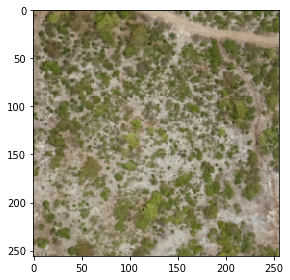

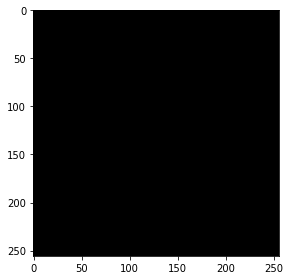

In [60]:
#sample of how the images and their masks looks like
import random
image_x = random.randint(1,120)
imshow(x_train[image_x])
plt.show()
imshow(np.squeeze(y_train[image_x]))
plt.show()

In [61]:
#creating U-Net architecture
inputs = tf.keras.layers.Input((width,height,channel))
s = tf.keras.layers.Lambda(lambda x : x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)


c5 = tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c5)


u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides = (2,2),padding = 'same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides = (2,2),padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides = (2,2),padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides = (2,2),padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1],axis = 3)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_normal',padding = 'same')(c9)

outputs = tf.keras.layers.Conv2D(1,(1,1),activation = "sigmoid")(c9)

model = tf.keras.Model(inputs = [inputs],outputs = [outputs])
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
________________________________________________________________________________

In [62]:
clbk = [tf.keras.callbacks.ModelCheckpoint("model_256x256.h5",verbose= 1,save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience =2,monitor = "val_loss"),
        tf.keras.callbacks.TensorBoard(log_dir = "logs")]

results = model.fit(x_train,y_train,epochs=20,
                   verbose = 1,validation_split=0.2,use_multiprocessing=True,
                   callbacks=clbk)


Train on 18885 samples, validate on 4722 samples
Epoch 1/20
18880/18885 [============================>.] - ETA: 1s - loss: 0.1963 - acc: 0.9177 
Epoch 00001: val_loss improved from inf to 0.15372, saving model to model_256x256.h5
18885/18885 [==============================] - 6967s 369ms/sample - loss: 0.1963 - acc: 0.9178 - val_loss: 0.1537 - val_acc: 0.9301
Epoch 2/20
18880/18885 [============================>.] - ETA: 1s - loss: 0.1442 - acc: 0.9367 
Epoch 00002: val_loss improved from 0.15372 to 0.12812, saving model to model_256x256.h5
18885/18885 [==============================] - 6658s 353ms/sample - loss: 0.1442 - acc: 0.9367 - val_loss: 0.1281 - val_acc: 0.9449
Epoch 3/20
18880/18885 [============================>.] - ETA: 1s - loss: 0.1244 - acc: 0.9471 
Epoch 00003: val_loss improved from 0.12812 to 0.11200, saving model to model_256x256.h5
18885/18885 [==============================] - 6958s 368ms/sample - loss: 0.1244 - acc: 0.9471 - val_loss: 0.1120 - val_acc: 0.9527
Epoc

KeyboardInterrupt: 